<img src='https://www.moex.com/assets-redesign-2021/images/logo-ru.svg' width='350' align='left'></img>  

# <a id='0'>Table of contents (っ・ _・)っ</a>  
- <a href='#1'>Introduction</a> 
- <a href='#2'>Preparing</a> 
    - <a href='#201'>Import libraries</a>   
    - <a href='#202'>Functions</a> 
    - <a href='#203'>Constants</a>     
- <a href='#3'>Парсинг</a> 
    - <a href='#301'>Информация об открытых позициях по производным финансовым инструментам</a>  
    - <a href='#302'>Курс доллара США на валютной бирже - USD000UTSTOM</a>  
    - <a href='#303'>Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM</a> 
    - <a href='#304'>Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER)</a>
    - <a href='#305'>Публичное акционерное общество "Газпром", акция обыкновенная (GAZP)</a> 
    - <a href='#306'>Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR)</a>     
    - <a href='#307'>Публичное акционерное общество "Магнит", акция обыкновенная (MGNT)</a>  
    - <a href='#308'>Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT)</a>  
    - <a href='#309'>Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN)</a> 
    - <a href='#310'>Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH)</a>  
    - <a href='#311'>Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN)</a>  
- <a href='#4'>Графики</a> 
    - <a href='#401'>Курс доллара США на валютной бирже - USD000UTSTOM</a>  
    - <a href='#402'>Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM</a>     
    - <a href='#403'>Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER)</a>     
    - <a href='#404'>Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR)</a> 
    - <a href='#405'>Публичное акционерное общество "Газпром", акция обыкновенная (GAZP)</a>     
    - <a href='#406'>Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH)</a>     
    - <a href='#407'>Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN)</a>     
    - <a href='#408'>Публичное акционерное общество "Магнит", акция обыкновенная (MGNT)</a>         
    - <a href='#409'>Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT)</a>      
    - <a href='#410'>Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN)</a>    
- <a href='#5'>Создание датасета</a> 
    - <a href='#502'>Объединение таблиц</a> 
    - <a href='#503'>Пропуски в данных</a> 
    - <a href='#504'>Корреляционная зависимость</a>    
- <a href='#6'>Выбор модели и обучение</a> 
    - <a href='#601'>Первичный выбор модели</a> 
    - <a href='#602'>Обучение модели</a> 
    - <a href='#603'>Корреляционная зависимость</a>  
- <a href='#7'>Прогнозирование временных рядов</a> 
    - <a href='#701'>Подготовка данных</a>     

# <a id='1'>Introduction</a>  

# <a id='2'>Preparing</a>  

## <a id='201'>Import libraries</a>  
- <a href='#0'>Table of contents</a> 

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:82.5% !important}</style>'))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import glob

import math
import numpy as np
import pandas as pd

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve, KFold, train_test_split

from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import time
from datetime import date
from datetime import datetime
from dateutil.rrule import rrule, DAILY
# !pip install python-dateutil

import requests

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

## <a id='202'>Functions</a>  
- <a href='#0'>Table of contents</a> 

In [5]:
# Функция создания директории
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f'Directory «{directory}» created.')
    else:
        print(f'Directory «{directory}» already exists.')

In [6]:
# Функция удаления директории
def del_empty(directory):
    files = glob.glob(directory + '/*.csv')
    for f in files:
        if os.stat(f).st_size <= 500:
            os.remove(f)
            print(f'Empty file «{f}» has been deleted.')

In [7]:
# Function to calculate the root mean squared percentage error
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

# Function to early stop with root mean squared percentage error
def feval_rmspe(y_pred, lgb_train):
    y_true = lgb_train.get_label()
    return 'RMSPE', rmspe(y_true, y_pred), False

## <a id='203'>Constants</a>  
- <a href='#0'>Table of contents</a> 

In [8]:
current_date = datetime.now().date()

In [9]:
current_date

datetime.date(2021, 12, 27)

In [10]:
# Диапазон дат для парсинга файлов
moment_start = date(2021, 12, 15)
moment_end = current_date
# moment_end = date(2021, 12, 10)

# <a id='3'>Parsing</a>  

## <a id='301'>Информация об открытых позициях по производным финансовым инструментам</a>  
- <a href='#0'>Table of contents</a> 

In [11]:
# Создание директории - «derivatives-open-positions»
derivatives = 'derivatives-open-positions'
create_directory(derivatives)

Directory «derivatives-open-positions» already exists.


In [12]:
# Перебор ссылок по дате и сохранение файлов с информацией об открытых позициях по производным финансовым инструментам
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = str(to_date) + '.csv'
    with requests.get('https://www.moex.com/ru/derivatives/open-positions-csv.aspx?d={}&t=1'.format(to_date)) as response:
        with open('{}/{}'.format(derivatives, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [13]:
# https://www.moex.com/ru/derivatives/open-positions-csv.aspx?d=20210902&t=1 - вид полной ссылки
# t=1 - разделители запятые, t=2 - разделители точка с запятой

In [14]:
# Удаление пустых файлов
del_empty(derivatives)

Empty file «derivatives-open-positions\20211218.csv» has been deleted.
Empty file «derivatives-open-positions\20211219.csv» has been deleted.
Empty file «derivatives-open-positions\20211225.csv» has been deleted.
Empty file «derivatives-open-positions\20211226.csv» has been deleted.
Empty file «derivatives-open-positions\20211227.csv» has been deleted.


### Извлечение данных по фьючерсным контрактам

In [15]:
# Список файлов и директорий в папке
derivatives_files = os.listdir(derivatives)
# Указание пути к директории «'derivatives-open-positions/»
DERIVATIVES_FILES_PATH = derivatives + '/'

In [16]:
derivatives_si = pd.DataFrame()     # Фьючерсный контракт на курс доллар США - российский рубль  
derivatives_eu = pd.DataFrame()     # Фьючерсный контракт на курс евро-российский рубль  
derivatives_brent = pd.DataFrame()  # Фьючерсный контракт на нефть Brent  
derivatives_gold = pd.DataFrame()   # Фьючерсный контракт на аффинированное золото в слитках  
derivatives_silv = pd.DataFrame()   # Фьючерсный контракт на аффинированное серебро в слитках  
derivatives_ng = pd.DataFrame()     # Фьючерсный контракт на природный газ  
derivatives_sbrf = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО Сбербанк  
derivatives_vtbr = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)  
derivatives_gazr = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО "Газпром"  
derivatives_gmkn = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   
derivatives_aflt = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО "Аэрофлот"  
derivatives_mgnt = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО «Магнит»  
derivatives_lkoh = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"  
derivatives_rosn = pd.DataFrame()   # Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"  
derivatives_rts = pd.DataFrame()    # Фьючерсный контракт на Индекс РТС  
derivatives_mix = pd.DataFrame()    # Фьючерсный контракт на Индекс МосБиржи  
derivatives_spyf = pd.DataFrame()   # Фьючерсный контракт на инвестиционные паи SPDR S&P 500 ETF Trust  

for file in derivatives_files:
    derivatives_tmp = pd.read_csv(DERIVATIVES_FILES_PATH + file)
    # Преобразование из объекта в дату
    derivatives_tmp['moment'] = derivatives_tmp['moment'].astype('datetime64[ns]')
    # Удаление пустых или малозначимых столбцов
    derivatives_tmp.drop('contract_type', axis=1, inplace=True)
    derivatives_tmp.drop('change_prev_week_short_perc', axis=1, inplace=True)
    derivatives_tmp.drop('change_prev_week_long_perc', axis=1, inplace=True)
    derivatives_tmp.drop('Unnamed: 13', axis=1, inplace=True)
    # Изменение последовательности столбцов
    derivatives_tmp = derivatives_tmp[['moment', 'isin', 'name', 'iz_fiz', 'long_position', 'short_position', 'change_prev_week_long_abs', 'change_prev_week_short_abs', 'clients_in_long', 'clients_in_short']]
    
    ##### Валюта #####
    # Фьючерсный контракт на курс доллар США - российский рубль
    si_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на курс доллар США - российский рубль']
    # Отбор физических и юридических лиц, по признаку
    si_ind = si_tmp[si_tmp['iz_fiz'] == 1]
    si_ent = si_tmp[si_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    si_tmp = pd.merge(si_ind, si_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_si_ind', '_si_ent'))
    # Удаление пустых или малозначимых столбцов
    si_tmp.drop('iz_fiz_si_ind', axis=1, inplace=True)
    si_tmp.drop('iz_fiz_si_ent', axis=1, inplace=True)
    si_tmp.drop('change_prev_week_long_abs_si_ind', axis=1, inplace=True)
    si_tmp.drop('change_prev_week_short_abs_si_ind', axis=1, inplace=True)
    si_tmp.drop('change_prev_week_long_abs_si_ent', axis=1, inplace=True)
    si_tmp.drop('change_prev_week_short_abs_si_ent', axis=1, inplace=True)
    derivatives_si = derivatives_si.append(si_tmp, ignore_index = True)
    
    # Фьючерсный контракт на курс евро-российский рубль
    eu_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на курс евро - российский рубль']
    # Отбор физических и юридических лиц, по признаку
    eu_ind = eu_tmp[eu_tmp['iz_fiz'] == 1]
    eu_ent = eu_tmp[eu_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    eu_tmp = pd.merge(eu_ind, eu_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_eu_ind', '_eu_ent'))
    # Удаление пустых или малозначимых столбцов
    eu_tmp.drop('iz_fiz_eu_ind', axis=1, inplace=True)
    eu_tmp.drop('iz_fiz_eu_ent', axis=1, inplace=True)
    eu_tmp.drop('change_prev_week_long_abs_eu_ind', axis=1, inplace=True)
    eu_tmp.drop('change_prev_week_short_abs_eu_ind', axis=1, inplace=True)
    eu_tmp.drop('change_prev_week_long_abs_eu_ent', axis=1, inplace=True)
    eu_tmp.drop('change_prev_week_short_abs_eu_ent', axis=1, inplace=True)
    derivatives_eu = derivatives_eu.append(eu_tmp, ignore_index = True)
    
    
    ##### Товарные контракты #####
    # Фьючерсный контракт на нефть Brent
    brent_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на нефть BRENT']
    # Отбор физических и юридических лиц, по признаку
    brent_ind = brent_tmp[brent_tmp['iz_fiz'] == 1]
    brent_ent = brent_tmp[brent_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    brent_tmp = pd.merge(brent_ind, brent_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_brent_ind', '_brent_ent'))
    # Удаление пустых или малозначимых столбцов
    brent_tmp.drop('iz_fiz_brent_ind', axis=1, inplace=True)
    brent_tmp.drop('iz_fiz_brent_ent', axis=1, inplace=True)
    brent_tmp.drop('change_prev_week_long_abs_brent_ind', axis=1, inplace=True)
    brent_tmp.drop('change_prev_week_short_abs_brent_ind', axis=1, inplace=True)
    brent_tmp.drop('change_prev_week_long_abs_brent_ent', axis=1, inplace=True)
    brent_tmp.drop('change_prev_week_short_abs_brent_ent', axis=1, inplace=True)
    derivatives_brent = derivatives_brent.append(brent_tmp, ignore_index = True)
    
    # Фьючерсный контракт на аффинированное золото в слитках
    gold_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на аффинированное золото в слитках']
    # Отбор физических и юридических лиц, по признаку
    gold_ind = gold_tmp[gold_tmp['iz_fiz'] == 1]
    gold_ent = gold_tmp[gold_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    gold_tmp = pd.merge(gold_ind, gold_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_gold_ind', '_gold_ent'))
    # Удаление пустых или малозначимых столбцов
    gold_tmp.drop('iz_fiz_gold_ind', axis=1, inplace=True)
    gold_tmp.drop('iz_fiz_gold_ent', axis=1, inplace=True)
    gold_tmp.drop('change_prev_week_long_abs_gold_ind', axis=1, inplace=True)
    gold_tmp.drop('change_prev_week_short_abs_gold_ind', axis=1, inplace=True)
    gold_tmp.drop('change_prev_week_long_abs_gold_ent', axis=1, inplace=True)
    gold_tmp.drop('change_prev_week_short_abs_gold_ent', axis=1, inplace=True)
    derivatives_gold = derivatives_gold.append(gold_tmp, ignore_index = True)
    
    # Фьючерсный контракт на аффинированное серебро в слитках
    silv_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на аффинированное серебро в слитках']
    # Отбор физических и юридических лиц, по признаку
    silv_ind = silv_tmp[silv_tmp['iz_fiz'] == 1]
    silv_ent = silv_tmp[silv_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    silv_tmp = pd.merge(silv_ind, silv_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_silv_ind', '_silv_ent'))
    # Удаление пустых или малозначимых столбцов
    silv_tmp.drop('iz_fiz_silv_ind', axis=1, inplace=True)
    silv_tmp.drop('iz_fiz_silv_ent', axis=1, inplace=True)
    silv_tmp.drop('change_prev_week_long_abs_silv_ind', axis=1, inplace=True)
    silv_tmp.drop('change_prev_week_short_abs_silv_ind', axis=1, inplace=True)
    silv_tmp.drop('change_prev_week_long_abs_silv_ent', axis=1, inplace=True)
    silv_tmp.drop('change_prev_week_short_abs_silv_ent', axis=1, inplace=True)
    derivatives_silv = derivatives_silv.append(silv_tmp, ignore_index = True)
    
    # Фьючерсный контракт на природный газ
    ng_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на природный газ']
    # Отбор физических и юридических лиц, по признаку
    ng_ind = ng_tmp[ng_tmp['iz_fiz'] == 1]
    ng_ent = ng_tmp[ng_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    ng_tmp = pd.merge(ng_ind, ng_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_ng_ind', '_ng_ent'))
    # Удаление пустых или малозначимых столбцов
    ng_tmp.drop('iz_fiz_ng_ind', axis=1, inplace=True)
    ng_tmp.drop('iz_fiz_ng_ent', axis=1, inplace=True)
    ng_tmp.drop('change_prev_week_long_abs_ng_ind', axis=1, inplace=True)
    ng_tmp.drop('change_prev_week_short_abs_ng_ind', axis=1, inplace=True)
    ng_tmp.drop('change_prev_week_long_abs_ng_ent', axis=1, inplace=True)
    ng_tmp.drop('change_prev_week_short_abs_ng_ent', axis=1, inplace=True)
    derivatives_ng = derivatives_ng.append(ng_tmp, ignore_index = True)
    
    
    ##### Акции ##### 
    # Фьючерсный контракт на обыкновенные акции ПАО Сбербанк SBRF
    sbrf_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО Сбербанк']
    # Отбор физических и юридических лиц, по признаку
    sbrf_ind = sbrf_tmp[sbrf_tmp['iz_fiz'] == 1]
    sbrf_ent = sbrf_tmp[sbrf_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    sbrf_tmp = pd.merge(sbrf_ind, sbrf_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_sbrf_ind', '_sbrf_ent'))
    # Удаление пустых или малозначимых столбцов
    sbrf_tmp.drop('iz_fiz_sbrf_ind', axis=1, inplace=True)
    sbrf_tmp.drop('iz_fiz_sbrf_ent', axis=1, inplace=True)
    sbrf_tmp.drop('change_prev_week_long_abs_sbrf_ind', axis=1, inplace=True)
    sbrf_tmp.drop('change_prev_week_short_abs_sbrf_ind', axis=1, inplace=True)
    sbrf_tmp.drop('change_prev_week_long_abs_sbrf_ent', axis=1, inplace=True)
    sbrf_tmp.drop('change_prev_week_short_abs_sbrf_ent', axis=1, inplace=True)
    derivatives_sbrf = derivatives_sbrf.append(sbrf_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)
    vtbr_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)']
    # Отбор физических и юридических лиц, по признаку
    vtbr_ind = vtbr_tmp[vtbr_tmp['iz_fiz'] == 1]
    vtbr_ent = vtbr_tmp[vtbr_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    vtbr_tmp = pd.merge(vtbr_ind, vtbr_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_vtbr_ind', '_vtbr_ent'))
    # Удаление пустых или малозначимых столбцов
    vtbr_tmp.drop('iz_fiz_vtbr_ind', axis=1, inplace=True)
    vtbr_tmp.drop('iz_fiz_vtbr_ent', axis=1, inplace=True)
    vtbr_tmp.drop('change_prev_week_long_abs_vtbr_ind', axis=1, inplace=True)
    vtbr_tmp.drop('change_prev_week_short_abs_vtbr_ind', axis=1, inplace=True)
    vtbr_tmp.drop('change_prev_week_long_abs_vtbr_ent', axis=1, inplace=True)
    vtbr_tmp.drop('change_prev_week_short_abs_vtbr_ent', axis=1, inplace=True)
    derivatives_vtbr = derivatives_vtbr.append(vtbr_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО "Газпром"
    gazr_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО "Газпром"']
    # Отбор физических и юридических лиц, по признаку
    gazr_ind = gazr_tmp[gazr_tmp['iz_fiz'] == 1]
    gazr_ent = gazr_tmp[gazr_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    gazr_tmp = pd.merge(gazr_ind, gazr_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_gazr_ind', '_gazr_ent'))
    # Удаление пустых или малозначимых столбцов
    gazr_tmp.drop('iz_fiz_gazr_ind', axis=1, inplace=True)
    gazr_tmp.drop('iz_fiz_gazr_ent', axis=1, inplace=True)
    gazr_tmp.drop('change_prev_week_long_abs_gazr_ind', axis=1, inplace=True)
    gazr_tmp.drop('change_prev_week_short_abs_gazr_ind', axis=1, inplace=True)
    gazr_tmp.drop('change_prev_week_long_abs_gazr_ent', axis=1, inplace=True)
    gazr_tmp.drop('change_prev_week_short_abs_gazr_ent', axis=1, inplace=True)
    derivatives_gazr = derivatives_gazr.append(gazr_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"
    gmkn_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"']
    # Отбор физических и юридических лиц, по признаку
    gmkn_ind = gmkn_tmp[gmkn_tmp['iz_fiz'] == 1]
    gmkn_ent = gmkn_tmp[gmkn_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    gmkn_tmp = pd.merge(gmkn_ind, gmkn_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_gmkn_ind', '_gmkn_ent'))
    # Удаление пустых или малозначимых столбцов
    gmkn_tmp.drop('iz_fiz_gmkn_ind', axis=1, inplace=True)
    gmkn_tmp.drop('iz_fiz_gmkn_ent', axis=1, inplace=True)
    gmkn_tmp.drop('change_prev_week_long_abs_gmkn_ind', axis=1, inplace=True)
    gmkn_tmp.drop('change_prev_week_short_abs_gmkn_ind', axis=1, inplace=True)
    gmkn_tmp.drop('change_prev_week_long_abs_gmkn_ent', axis=1, inplace=True)
    gmkn_tmp.drop('change_prev_week_short_abs_gmkn_ent', axis=1, inplace=True)
    derivatives_gmkn = derivatives_gmkn.append(gmkn_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО "Аэрофлот"
    aflt_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"']
    # Отбор физических и юридических лиц, по признаку
    aflt_ind = aflt_tmp[aflt_tmp['iz_fiz'] == 1]
    aflt_ent = aflt_tmp[aflt_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    aflt_tmp = pd.merge(aflt_ind, aflt_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_aflt_ind', '_aflt_ent'))
    # Удаление пустых или малозначимых столбцов
    aflt_tmp.drop('iz_fiz_aflt_ind', axis=1, inplace=True)
    aflt_tmp.drop('iz_fiz_aflt_ent', axis=1, inplace=True)
    aflt_tmp.drop('change_prev_week_long_abs_aflt_ind', axis=1, inplace=True)
    aflt_tmp.drop('change_prev_week_short_abs_aflt_ind', axis=1, inplace=True)
    aflt_tmp.drop('change_prev_week_long_abs_aflt_ent', axis=1, inplace=True)
    aflt_tmp.drop('change_prev_week_short_abs_aflt_ent', axis=1, inplace=True)
    derivatives_aflt = derivatives_aflt.append(aflt_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО «Магнит»
    mgnt_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО "Магнит"']
    # Отбор физических и юридических лиц, по признаку
    mgnt_ind = mgnt_tmp[mgnt_tmp['iz_fiz'] == 1]
    mgnt_ent = mgnt_tmp[mgnt_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    mgnt_tmp = pd.merge(mgnt_ind, mgnt_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_mgnt_ind', '_mgnt_ent'))
    # Удаление пустых или малозначимых столбцов
    mgnt_tmp.drop('iz_fiz_mgnt_ind', axis=1, inplace=True)
    mgnt_tmp.drop('iz_fiz_mgnt_ent', axis=1, inplace=True)
    mgnt_tmp.drop('change_prev_week_long_abs_mgnt_ind', axis=1, inplace=True)
    mgnt_tmp.drop('change_prev_week_short_abs_mgnt_ind', axis=1, inplace=True)
    mgnt_tmp.drop('change_prev_week_long_abs_mgnt_ent', axis=1, inplace=True)
    mgnt_tmp.drop('change_prev_week_short_abs_mgnt_ent', axis=1, inplace=True)
    derivatives_mgnt = derivatives_mgnt.append(mgnt_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"
    lkoh_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"']
    # Отбор физических и юридических лиц, по признаку
    lkoh_ind = lkoh_tmp[lkoh_tmp['iz_fiz'] == 1]
    lkoh_ent = lkoh_tmp[lkoh_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    lkoh_tmp = pd.merge(lkoh_ind, lkoh_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_lkoh_ind', '_lkoh_ent'))
    # Удаление пустых или малозначимых столбцов
    lkoh_tmp.drop('iz_fiz_lkoh_ind', axis=1, inplace=True)
    lkoh_tmp.drop('iz_fiz_lkoh_ent', axis=1, inplace=True)
    lkoh_tmp.drop('change_prev_week_long_abs_lkoh_ind', axis=1, inplace=True)
    lkoh_tmp.drop('change_prev_week_short_abs_lkoh_ind', axis=1, inplace=True)
    lkoh_tmp.drop('change_prev_week_long_abs_lkoh_ent', axis=1, inplace=True)
    lkoh_tmp.drop('change_prev_week_short_abs_lkoh_ent', axis=1, inplace=True)
    derivatives_lkoh = derivatives_lkoh.append(lkoh_tmp, ignore_index = True)
    
    # Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"
    rosn_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"']
    # Отбор физических и юридических лиц, по признаку
    rosn_ind = rosn_tmp[rosn_tmp['iz_fiz'] == 1]
    rosn_ent = rosn_tmp[rosn_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    rosn_tmp = pd.merge(rosn_ind, rosn_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_rosn_ind', '_rosn_ent'))
    # Удаление пустых или малозначимых столбцов
    rosn_tmp.drop('iz_fiz_rosn_ind', axis=1, inplace=True)
    rosn_tmp.drop('iz_fiz_rosn_ent', axis=1, inplace=True)
    rosn_tmp.drop('change_prev_week_long_abs_rosn_ind', axis=1, inplace=True)
    rosn_tmp.drop('change_prev_week_short_abs_rosn_ind', axis=1, inplace=True)
    rosn_tmp.drop('change_prev_week_long_abs_rosn_ent', axis=1, inplace=True)
    rosn_tmp.drop('change_prev_week_short_abs_rosn_ent', axis=1, inplace=True)
    derivatives_rosn = derivatives_rosn.append(rosn_tmp, ignore_index = True)
    
    
    ##### Индексы #####
    # Фьючерсный контракт на Индекс РТС
    rts_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на Индекс РТС']
    # Отбор физических и юридических лиц, по признаку
    rts_ind = rts_tmp[rts_tmp['iz_fiz'] == 1]
    rts_ent = rts_tmp[rts_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    rts_tmp = pd.merge(rts_ind, rts_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_rts_ind', '_rts_ent'))
    # Удаление пустых или малозначимых столбцов
    rts_tmp.drop('iz_fiz_rts_ind', axis=1, inplace=True)
    rts_tmp.drop('iz_fiz_rts_ent', axis=1, inplace=True)
    rts_tmp.drop('change_prev_week_long_abs_rts_ind', axis=1, inplace=True)
    rts_tmp.drop('change_prev_week_short_abs_rts_ind', axis=1, inplace=True)
    rts_tmp.drop('change_prev_week_long_abs_rts_ent', axis=1, inplace=True)
    rts_tmp.drop('change_prev_week_short_abs_rts_ent', axis=1, inplace=True)
    derivatives_rts = derivatives_rts.append(rts_tmp, ignore_index = True)
    
    # Фьючерсный контракт на Индекс МосБиржи
    mix_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на Индекс МосБиржи']
    # Отбор физических и юридических лиц, по признаку
    mix_ind = mix_tmp[mix_tmp['iz_fiz'] == 1]
    mix_ent = mix_tmp[mix_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    mix_tmp = pd.merge(mix_ind, mix_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_mix_ind', '_mix_ent'))
    # Удаление пустых или малозначимых столбцов
    mix_tmp.drop('iz_fiz_mix_ind', axis=1, inplace=True)
    mix_tmp.drop('iz_fiz_mix_ent', axis=1, inplace=True)
    mix_tmp.drop('change_prev_week_long_abs_mix_ind', axis=1, inplace=True)
    mix_tmp.drop('change_prev_week_short_abs_mix_ind', axis=1, inplace=True)
    mix_tmp.drop('change_prev_week_long_abs_mix_ent', axis=1, inplace=True)
    mix_tmp.drop('change_prev_week_short_abs_mix_ent', axis=1, inplace=True)
    derivatives_mix = derivatives_mix.append(mix_tmp, ignore_index = True)
    
    # Фьючерсный контракт на инвестиционные паи SPDR S&P 500 ETF Trust
    spyf_tmp = derivatives_tmp[derivatives_tmp['name'] == 'Фьючерсный контракт на инвестиционные паи SPDR SP500 ETF Trust']
    # Отбор физических и юридических лиц, по признаку
    spyf_ind = spyf_tmp[spyf_tmp['iz_fiz'] == 1]
    spyf_ent = spyf_tmp[spyf_tmp['iz_fiz'] != 1]
    # Объединение датафреймов
    spyf_tmp = pd.merge(spyf_ind, spyf_ent, how='outer', on=['moment', 'isin', 'name'], suffixes=('_spyf_ind', '_spyf_ent'))
    # Удаление пустых или малозначимых столбцов
    spyf_tmp.drop('iz_fiz_spyf_ind', axis=1, inplace=True)
    spyf_tmp.drop('iz_fiz_spyf_ent', axis=1, inplace=True)
    spyf_tmp.drop('change_prev_week_long_abs_spyf_ind', axis=1, inplace=True)
    spyf_tmp.drop('change_prev_week_short_abs_spyf_ind', axis=1, inplace=True)
    spyf_tmp.drop('change_prev_week_long_abs_spyf_ent', axis=1, inplace=True)
    spyf_tmp.drop('change_prev_week_short_abs_spyf_ent', axis=1, inplace=True)
    derivatives_spyf = derivatives_spyf.append(spyf_tmp, ignore_index = True)

## <a id='302'>Курс доллара США на валютной бирже - USD000UTSTOM</a>  
- <a href='#0'>Table of contents</a>  

In [17]:
# Создание директории - «contracts_si»
contracts_si = 'contract-results/contracts_si'
create_directory(contracts_si)

Directory «contract-results/contracts_si» already exists.


In [18]:
# Код инструмента
SECID = 'USD000UTSTOM'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/currency/markets/selt/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_si, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [19]:
# https://iss.moex.com/iss/history/engines/currency/markets/selt/securities/USD000UTSTOM.html?iss.meta=on&iss.only=history&limit=1&from=2021-09-14 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - USD000UTSTOM

In [20]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_si)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_si + '/'

In [21]:
contract_si = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True) 
    contract_si = contract_si.append(contract_tmp, ignore_index = True)

In [22]:
contract_si = contract_si.rename({'TRADEDATE': 'moment', 'OPEN': 'si_open', 'LOW': 'si_low', 'HIGH': 'si_high', 'CLOSE': 'si_close', 
                                  'VOLRUR': 'si_volrur', 'WAPRICE': 'si_price'}, axis='columns')

In [23]:
# BOARDID - Идентификатор режима торгов / The particular board for which security information should be sent, or BLANK for all boards.
# SHORTNAME - Краткое наименование бумаги / The short name for the security.
# SECID - Идентификатор финансового инструмента.
# NUMTRADES - Количество сделок за торговый день / Number of the trades for current trade session.
# OPEN - Цена первой сделки / Open price for the security today.
# LOW - Минимальная цена сделки / The lowest traded price for the security today.
# HIGH - Максимальная цена сделки / The highest traded price for the security today.
# CLOSE - Цена последней сделки

In [24]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_si['si_h'] = contract_si['si_high'] - contract_si['si_open']
# Глубина опускания цены (l = O - L)
contract_si['si_l'] = contract_si['si_open'] - contract_si['si_low']
# Доходность (r = C - O)
contract_si['si_r'] = contract_si['si_close'] - contract_si['si_open']
# # Амплитуда размаха цены (a = h + l)
# contract_si['si_a'] = contract_si['si_h'] + contract_si['si_l']
# # Модифицированная амплитуда размаха (v = a - abs(r)/2)
# contract_si['si_v'] = contract_si['si_a'] - abs(contract_si['si_r'])/2

# contract_si['upper_shadow_si'] = contract_si['si_high'] - np.maximum(contract_si['si_close'], contract_si['si_open'])
# contract_si['lower_shadow_si'] = np.minimum(contract_si['si_close'], contract_si['si_open']) - contract_si['si_low']

In [25]:
contract_si.drop('si_open', axis=1, inplace=True)
contract_si.drop('si_low', axis=1, inplace=True)
contract_si.drop('si_high', axis=1, inplace=True)
contract_si.drop('si_close', axis=1, inplace=True)

In [26]:
# Удаление дублирующих строк
contract_si = contract_si.drop_duplicates(subset=['moment'])

In [27]:
contract_si.head()

moment          si_volrur  si_price    si_h    si_l     si_r
0 2020-01-03  44291604207.50000  62.02980 0.44750 0.00000  0.31000
3 2020-01-06  38095579400.00000  62.05490 0.29750 0.36000 -0.28000
6 2020-01-08  52289737170.00000  61.63730 0.09500 0.82250 -0.65500
8 2020-01-09 130540335685.00000  61.23340 0.01500 0.28250 -0.10500
9 2020-01-10 120495858542.50000  61.21820 0.16000 0.35000 -0.16750

In [28]:
# Объединение таблиц на основе ключа - 'moment'
si_df = pd.merge(derivatives_si, contract_si, on='moment', how='left')

In [29]:
si_df.head()

moment isin                                                       name  \
0 2020-01-03   Si  Фьючерсный контракт на курс доллар США - российский рубль   
1 2020-01-06   Si  Фьючерсный контракт на курс доллар США - российский рубль   
2 2020-01-08   Si  Фьючерсный контракт на курс доллар США - российский рубль   
3 2020-01-09   Si  Фьючерсный контракт на курс доллар США - российский рубль   
4 2020-01-10   Si  Фьючерсный контракт на курс доллар США - российский рубль   

   long_position_si_ind  short_position_si_ind  clients_in_long_si_ind  \
0          742345.00000           124217.00000             12025.00000   
1          737782.00000           150757.00000             11697.00000   
2          732611.00000           172827.00000             11422.00000   
3          737703.00000           166433.00000             11694.00000   
4          769457.00000           204852.00000             11853.00000   

   clients_in_short_si_ind  long_position_si_ent  short_position_si_ent  \
0               2363.00000          410817.00000          1028945.00000   
1               3078.00000          409738.00000           996763.00000   
2               3621.00000          416620.00000           976404.00000   
3               3566.00000          447411.00000          1018681.00000   
4               3500.00000          455438.00000          1020043.00000   

   clients_in_long_si_ent  clients_in_short_si_ent          si_volrur  \
0               257.00000                 80.00000  44291604207.50000   
1               253.00000                 95.00000  38095579400.00000   
2               250.00000                103.00000  52289737170.00000   
3               257.00000                104.00000 130540335685.00000   
4               258.00000                107.00000 120495858542.50000   

   si_price    si_h    si_l     si_r  
0  62.02980 0.44750 0.00000  0.31000  
1  62.05490 0.29750 0.36000 -0.28000  
2  61.63730 0.09500 0.82250 -0.65500  
3  61.23340 0.01500 0.28250 -0.10500  
4  61.21820 0.16000 0.35000 -0.16750

In [30]:
si_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='303'>Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM</a>  
- <a href='#0'>Table of contents</a>  

In [31]:
# Создание директории - «contracts_eu»
contracts_eu = 'contract-results/contracts_eu'
create_directory(contracts_eu)

Directory «contract-results/contracts_eu» already exists.


In [32]:
# Код инструмента
SECID = 'EUR_RUB__TOM'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/currency/markets/selt/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_eu, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [33]:
# https://iss.moex.com/iss/history/engines/currency/markets/selt/securities/EUR_RUB__TOM.html?iss.meta=on&iss.only=history&limit=1&from=2021-09-14 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - EUR_RUB__TOM

In [34]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_eu)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_eu + '/'

In [35]:
contract_eu = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True) 
    contract_eu = contract_eu.append(contract_tmp, ignore_index = True)

In [36]:
contract_eu = contract_eu.rename({'TRADEDATE': 'moment', 'OPEN': 'eu_open', 'LOW': 'eu_low', 'HIGH': 'eu_high', 'CLOSE': 'eu_close', 
                                  'VOLRUR': 'eu_volrur', 'WAPRICE': 'eu_price'}, axis='columns')

In [37]:
# BOARDID - Идентификатор режима торгов / The particular board for which security information should be sent, or BLANK for all boards.
# SHORTNAME - Краткое наименование бумаги / The short name for the security.
# SECID - Идентификатор финансового инструмента.
# NUMTRADES - Количество сделок за торговый день / Number of the trades for current trade session.
# OPEN - Цена первой сделки / Open price for the security today.
# LOW - Минимальная цена сделки / The lowest traded price for the security today.
# HIGH - Максимальная цена сделки / The highest traded price for the security today.
# CLOSE - Цена последней сделки

In [38]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_eu['eu_h'] = contract_eu['eu_high'] - contract_eu['eu_open']
# Глубина опускания цены (l = O - L)
contract_eu['eu_l'] = contract_eu['eu_open'] - contract_eu['eu_low']
# Доходность (r = C - O)
contract_eu['eu_r'] = contract_eu['eu_close'] - contract_eu['eu_open']

In [39]:
contract_eu.drop('eu_open', axis=1, inplace=True)
contract_eu.drop('eu_low', axis=1, inplace=True)
contract_eu.drop('eu_high', axis=1, inplace=True)
contract_eu.drop('eu_close', axis=1, inplace=True)

In [40]:
# Удаление дублирующих строк
contract_eu = contract_eu.drop_duplicates(subset=['moment'])

In [41]:
contract_eu.head()

moment         eu_volrur  eu_price    eu_h    eu_l     eu_r
0 2020-01-03  8318924212.50000  69.19230 0.32000 0.09500  0.20750
3 2020-01-06  9170136152.50000  69.38710 0.26500 0.29500 -0.21250
6 2020-01-08 14873035915.00000  68.52700 0.05500 1.13750 -0.99250
8 2020-01-09 30283812542.50000  68.01390 0.09500 0.26250 -0.12500
9 2020-01-10 23335720387.50000  67.99210 0.10000 0.38750 -0.14000

In [42]:
# Объединение таблиц на основе ключа - 'moment'
eu_df = pd.merge(derivatives_eu, contract_eu, on='moment', how='left')

In [43]:
eu_df.head()

moment isin                                                 name  \
0 2020-01-03   Eu  Фьючерсный контракт на курс евро - российский рубль   
1 2020-01-06   Eu  Фьючерсный контракт на курс евро - российский рубль   
2 2020-01-08   Eu  Фьючерсный контракт на курс евро - российский рубль   
3 2020-01-09   Eu  Фьючерсный контракт на курс евро - российский рубль   
4 2020-01-10   Eu  Фьючерсный контракт на курс евро - российский рубль   

   long_position_eu_ind  short_position_eu_ind  clients_in_long_eu_ind  \
0           80559.00000             6497.00000              1518.00000   
1           79410.00000             6135.00000              1521.00000   
2           83238.00000            14820.00000              1547.00000   
3           84838.00000             9889.00000              1618.00000   
4           89561.00000            14368.00000              1622.00000   

   clients_in_short_eu_ind  long_position_eu_ent  short_position_eu_ent  \
0                206.00000           33845.00000           107907.00000   
1                198.00000           34247.00000           107522.00000   
2                414.00000           34558.00000           102976.00000   
3                390.00000           33823.00000           108772.00000   
4                448.00000           34557.00000           109750.00000   

   clients_in_long_eu_ent  clients_in_short_eu_ent         eu_volrur  \
0                65.00000                 28.00000  8318924212.50000   
1                72.00000                 22.00000  9170136152.50000   
2                63.00000                 31.00000 14873035915.00000   
3                62.00000                 30.00000 30283812542.50000   
4                63.00000                 35.00000 23335720387.50000   

   eu_price    eu_h    eu_l     eu_r  
0  69.19230 0.32000 0.09500  0.20750  
1  69.38710 0.26500 0.29500 -0.21250  
2  68.52700 0.05500 1.13750 -0.99250  
3  68.01390 0.09500 0.26250 -0.12500  
4  67.99210 0.10000 0.38750 -0.14000

In [44]:
eu_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='304'>Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER)</a>  
- <a href='#0'>Table of contents</a>  

In [45]:
# Создание директории - «contracts_sber»
contracts_sber = 'contract-results/contracts_sber'
create_directory(contracts_sber)

Directory «contract-results/contracts_sber» already exists.


In [46]:
# Код инструмента
SECID = 'SBER'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_sber, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [47]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/SBER.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (SBER)

In [48]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_sber)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_sber + '/'

In [49]:
contract_sber = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_sber = contract_sber.append(contract_tmp, ignore_index = True)

In [50]:
contract_sber = contract_sber.rename({'TRADEDATE': 'moment', 'VALUE': 'sber_value', 'OPEN': 'sber_open', 'LOW': 'sber_low', 'HIGH': 'sber_high',
                                      'CLOSE': 'sber_close', 'WAPRICE': 'sber_price', 'VOLUME': 'sber_volume'}, axis='columns')

In [51]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_sber['sber_h'] = contract_sber['sber_high'] - contract_sber['sber_open']
# Глубина опускания цены (l = O - L)
contract_sber['sber_l'] = contract_sber['sber_open'] - contract_sber['sber_low']
# Доходность (r = C - O)
contract_sber['sber_r'] = contract_sber['sber_close'] - contract_sber['sber_open']

In [52]:
contract_sber.drop('sber_open', axis=1, inplace=True)
contract_sber.drop('sber_low', axis=1, inplace=True)
contract_sber.drop('sber_high', axis=1, inplace=True)
contract_sber.drop('sber_close', axis=1, inplace=True)

In [53]:
# Удаление дублирующих строк
contract_sber = contract_sber.drop_duplicates(subset=['moment'])

In [54]:
contract_sber.head()

moment        sber_value  sber_price  sber_volume  sber_h  sber_l  \
0 2020-01-03  9165474633.30000   255.62000     35851840 2.20000 2.29000   
3 2020-01-06  5646009935.80000   252.64000     22348300 0.09000 3.35000   
6 2020-01-08 10485882097.90000   256.88000     40817240 5.58000 0.54000   
8 2020-01-09  9936032087.90000   259.23000     38329020 2.36000 2.39000   
9 2020-01-10  4864405366.30000   258.05000     18851390 1.39000 0.98000   

    sber_r  
0 -0.99000  
3 -0.85000  
6  5.58000  
8 -1.41000  
9  0.33000

In [55]:
# Объединение таблиц на основе ключа - 'moment'
sber_df = pd.merge(derivatives_sbrf, contract_sber, on='moment', how='left')

In [56]:
sber_df.head()

moment  isin                                                    name  \
0 2020-01-03  SBRF  Фьючерсный контракт на обыкновенные акции ПАО Сбербанк   
1 2020-01-06  SBRF  Фьючерсный контракт на обыкновенные акции ПАО Сбербанк   
2 2020-01-08  SBRF  Фьючерсный контракт на обыкновенные акции ПАО Сбербанк   
3 2020-01-09  SBRF  Фьючерсный контракт на обыкновенные акции ПАО Сбербанк   
4 2020-01-10  SBRF  Фьючерсный контракт на обыкновенные акции ПАО Сбербанк   

   long_position_sbrf_ind  short_position_sbrf_ind  clients_in_long_sbrf_ind  \
0             74731.00000              52359.00000                1384.00000   
1             74070.00000              51455.00000                1504.00000   
2             81320.00000              57247.00000                1452.00000   
3             65401.00000              57561.00000                1407.00000   
4             72739.00000              54933.00000                1683.00000   

   clients_in_short_sbrf_ind  long_position_sbrf_ent  short_position_sbrf_ent  \
0                 1809.00000            157349.00000             179721.00000   
1                 1823.00000            158276.00000             180891.00000   
2                 2067.00000            155969.00000             180042.00000   
3                 2121.00000            163965.00000             171805.00000   
4                 2016.00000            153632.00000             171438.00000   

   clients_in_long_sbrf_ent  clients_in_short_sbrf_ent        sber_value  \
0                  53.00000                   38.00000  9165474633.30000   
1                  50.00000                   42.00000  5646009935.80000   
2                  65.00000                   31.00000 10485882097.90000   
3                  56.00000                   33.00000  9936032087.90000   
4                  56.00000                   36.00000  4864405366.30000   

   sber_price  sber_volume  sber_h  sber_l   sber_r  
0   255.62000     35851840 2.20000 2.29000 -0.99000  
1   252.64000     22348300 0.09000 3.35000 -0.85000  
2   256.88000     40817240 5.58000 0.54000  5.58000  
3   259.23000     38329020 2.36000 2.39000 -1.41000  
4   258.05000     18851390 1.39000 0.98000  0.33000

In [57]:
sber_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='305'>Публичное акционерное общество "Газпром", акция обыкновенная (GAZP)</a>  
- <a href='#0'>Table of contents</a>  

In [58]:
# Создание директории - «contracts_gazp»
contracts_gazp = 'contract-results/contracts_gazp'
create_directory(contracts_gazp)

Directory «contract-results/contracts_gazp» already exists.


In [59]:
# Код инструмента
SECID = 'GAZP'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_gazp, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [60]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/GAZP.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (GAZP)

In [61]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_gazp)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_gazp + '/'

In [62]:
contract_gazp = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_gazp = contract_gazp.append(contract_tmp, ignore_index = True)

In [63]:
contract_gazp = contract_gazp.rename({'TRADEDATE': 'moment', 'VALUE': 'gazr_value', 'OPEN': 'gazr_open', 'LOW': 'gazr_low', 'HIGH': 'gazr_high',
                                      'CLOSE': 'gazr_close', 'WAPRICE': 'gazr_price', 'VOLUME': 'gazr_volume'}, axis='columns')

In [64]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_gazp['gazr_h'] = contract_gazp['gazr_high'] - contract_gazp['gazr_open']
# Глубина опускания цены (l = O - L)
contract_gazp['gazr_l'] = contract_gazp['gazr_open'] - contract_gazp['gazr_low']
# Доходность (r = C - O)
contract_gazp['gazr_r'] = contract_gazp['gazr_close'] - contract_gazp['gazr_open']

In [65]:
contract_gazp.drop('gazr_open', axis=1, inplace=True)
contract_gazp.drop('gazr_low', axis=1, inplace=True)
contract_gazp.drop('gazr_high', axis=1, inplace=True)
contract_gazp.drop('gazr_close', axis=1, inplace=True)

In [66]:
# Удаление дублирующих строк
contract_gazp = contract_gazp.drop_duplicates(subset=['moment'])

In [67]:
contract_gazp.head()

moment       gazr_value  gazr_price  gazr_volume  gazr_h  gazr_l  \
0 2020-01-03 8962850376.70000   259.91000     34484710 2.72000 1.41000   
3 2020-01-06 7209355959.20000   256.12000     28148270 0.00000 4.20000   
6 2020-01-08 6547261526.80000   255.64000     25611080 1.07000 1.48000   
8 2020-01-09 8444500064.70000   254.17000     33224310 0.99000 3.87000   
9 2020-01-10 7220010840.80000   252.75000     28567810 0.60000 2.80000   

    gazr_r  
0 -0.18000  
3 -2.45000  
6 -0.46000  
8 -1.62000  
9 -2.10000

In [68]:
# Объединение таблиц на основе ключа - 'moment'
gazr_df = pd.merge(derivatives_gazr, contract_gazp, on='moment', how='left')

In [69]:
gazr_df.head()

moment  isin                                                     name  \
0 2020-01-03  GAZR  Фьючерсный контракт на обыкновенные акции ПАО "Газпром"   
1 2020-01-06  GAZR  Фьючерсный контракт на обыкновенные акции ПАО "Газпром"   
2 2020-01-08  GAZR  Фьючерсный контракт на обыкновенные акции ПАО "Газпром"   
3 2020-01-09  GAZR  Фьючерсный контракт на обыкновенные акции ПАО "Газпром"   
4 2020-01-10  GAZR  Фьючерсный контракт на обыкновенные акции ПАО "Газпром"   

   long_position_gazr_ind  short_position_gazr_ind  clients_in_long_gazr_ind  \
0            190232.00000              25165.00000                1351.00000   
1            190212.00000              24928.00000                1392.00000   
2            194547.00000              24594.00000                1549.00000   
3            194609.00000              24993.00000                1374.00000   
4            205858.00000              27718.00000                1358.00000   

   clients_in_short_gazr_ind  long_position_gazr_ent  short_position_gazr_ent  \
0                  820.00000             14140.00000             179207.00000   
1                  789.00000             13297.00000             178581.00000   
2                  785.00000             13164.00000             183117.00000   
3                  837.00000             12588.00000             182204.00000   
4                  927.00000             13783.00000             191923.00000   

   clients_in_long_gazr_ent  clients_in_short_gazr_ent       gazr_value  \
0                  78.00000                   40.00000 8962850376.70000   
1                  37.00000                   40.00000 7209355959.20000   
2                  36.00000                   40.00000 6547261526.80000   
3                  32.00000                   43.00000 8444500064.70000   
4                  38.00000                   46.00000 7220010840.80000   

   gazr_price  gazr_volume  gazr_h  gazr_l   gazr_r  
0   259.91000     34484710 2.72000 1.41000 -0.18000  
1   256.12000     28148270 0.00000 4.20000 -2.45000  
2   255.64000     25611080 1.07000 1.48000 -0.46000  
3   254.17000     33224310 0.99000 3.87000 -1.62000  
4   252.75000     28567810 0.60000 2.80000 -2.10000

In [70]:
gazr_df.drop(['isin', 'name'], axis=1, inplace=True)

In [71]:
gazr_df.isnull().sum()

moment                       0
long_position_gazr_ind       0
short_position_gazr_ind      0
clients_in_long_gazr_ind     0
clients_in_short_gazr_ind    0
long_position_gazr_ent       0
short_position_gazr_ent      0
clients_in_long_gazr_ent     0
clients_in_short_gazr_ent    0
gazr_value                   0
gazr_price                   0
gazr_volume                  0
gazr_h                       0
gazr_l                       0
gazr_r                       0
dtype: int64

## <a id='306'>Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR)</a>  
- <a href='#0'>Table of contents</a>  

In [72]:
# Создание директории - «contracts_vtbr»
contracts_vtbr = 'contract-results/contracts_vtbr'
create_directory(contracts_vtbr)

Directory «contract-results/contracts_vtbr» already exists.


In [73]:
# Код инструмента
SECID = 'VTBR'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_vtbr, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [74]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/VTBR.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (VTBR)

In [75]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_vtbr)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_vtbr + '/'

In [76]:
contract_vtbr = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_vtbr = contract_vtbr.append(contract_tmp, ignore_index = True)

In [77]:
contract_vtbr = contract_vtbr.rename({'TRADEDATE': 'moment', 'VALUE': 'vtbr_value', 'OPEN': 'vtbr_open', 'LOW': 'vtbr_low', 'HIGH': 'vtbr_high',
                                      'CLOSE': 'vtbr_close', 'WAPRICE': 'vtbr_price', 'VOLUME': 'vtbr_volume'}, axis='columns')

In [78]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_vtbr['vtbr_h'] = contract_vtbr['vtbr_high'] - contract_vtbr['vtbr_open']
# Глубина опускания цены (l = O - L)
contract_vtbr['vtbr_l'] = contract_vtbr['vtbr_open'] - contract_vtbr['vtbr_low']
# Доходность (r = C - O)
contract_vtbr['vtbr_r'] = contract_vtbr['vtbr_close'] - contract_vtbr['vtbr_open']

In [79]:
contract_vtbr.drop('vtbr_open', axis=1, inplace=True)
contract_vtbr.drop('vtbr_low', axis=1, inplace=True)
contract_vtbr.drop('vtbr_high', axis=1, inplace=True)
contract_vtbr.drop('vtbr_close', axis=1, inplace=True)

In [80]:
# Удаление дублирующих строк
contract_vtbr = contract_vtbr.drop_duplicates(subset=['moment'])

In [81]:
contract_vtbr.head()

moment       vtbr_value  vtbr_price  vtbr_volume  vtbr_h  vtbr_l  vtbr_r
0 2020-01-03  549559279.90000     0.04614   -975351888 0.00020 0.00015 0.00010
3 2020-01-06  368895793.95000     0.04601   -572354592 0.00009 0.00018 0.00000
6 2020-01-08 1347597297.10000     0.04676  -1244501072 0.00079 0.00001 0.00031
8 2020-01-09 1387380128.50000     0.04701   -552081072 0.00047 0.00025 0.00025
9 2020-01-10 1422514401.85000     0.04754   -138731072 0.00074 0.00014 0.00045

In [82]:
# Объединение таблиц на основе ключа - 'moment'
vtbr_df = pd.merge(derivatives_vtbr, contract_vtbr, on='moment', how='left')

In [83]:
vtbr_df.head()

moment  isin                                                      name  \
0 2020-01-03  VTBR  Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)   
1 2020-01-06  VTBR  Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)   
2 2020-01-08  VTBR  Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)   
3 2020-01-09  VTBR  Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)   
4 2020-01-10  VTBR  Фьючерсный контракт на обыкновенные акции Банк ВТБ (ПАО)   

   long_position_vtbr_ind  short_position_vtbr_ind  clients_in_long_vtbr_ind  \
0            104960.00000               8993.00000                 864.00000   
1            106022.00000               9252.00000                 877.00000   
2            105225.00000               8779.00000                 860.00000   
3            109961.00000               9488.00000                 926.00000   
4            114362.00000              16849.00000                 932.00000   

   clients_in_short_vtbr_ind  long_position_vtbr_ent  short_position_vtbr_ent  \
0                  330.00000              6490.00000             102457.00000   
1                  327.00000              6836.00000             103606.00000   
2                  356.00000              6521.00000             102967.00000   
3                  348.00000              7070.00000             107543.00000   
4                  402.00000              9758.00000             107271.00000   

   clients_in_long_vtbr_ent  clients_in_short_vtbr_ent       vtbr_value  \
0                  26.00000                   15.00000  549559279.90000   
1                  27.00000                   15.00000  368895793.95000   
2                  25.00000                   16.00000 1347597297.10000   
3                  23.00000                   17.00000 1387380128.50000   
4                  27.00000                   17.00000 1422514401.85000   

   vtbr_price  vtbr_volume  vtbr_h  vtbr_l  vtbr_r  
0     0.04614   -975351888 0.00020 0.00015 0.00010  
1     0.04601   -572354592 0.00009 0.00018 0.00000  
2     0.04676  -1244501072 0.00079 0.00001 0.00031  
3     0.04701   -552081072 0.00047 0.00025 0.00025  
4     0.04754   -138731072 0.00074 0.00014 0.00045

In [84]:
vtbr_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='307'>Публичное акционерное общество "Магнит", акция обыкновенная (MGNT)</a>  
- <a href='#0'>Table of contents</a>  

In [85]:
# Создание директории - «contracts_mgnt»
contracts_mgnt = 'contract-results/contracts_mgnt'
create_directory(contracts_mgnt)

Directory «contract-results/contracts_mgnt» already exists.


In [86]:
# Код инструмента
SECID = 'MGNT'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_mgnt, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [87]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/MGNT.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (MGNT)

In [88]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_mgnt)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_mgnt + '/'

In [89]:
contract_mgnt = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)    
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_mgnt = contract_mgnt.append(contract_tmp, ignore_index = True)

In [90]:
contract_mgnt = contract_mgnt.rename({'TRADEDATE': 'moment', 'VALUE': 'mgnt_value', 'OPEN': 'mgnt_open', 'LOW': 'mgnt_low', 'HIGH': 'mgnt_high',
                                      'CLOSE': 'mgnt_close', 'WAPRICE': 'mgnt_price', 'VOLUME': 'mgnt_volume'}, axis='columns')

In [91]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_mgnt['mgnt_h'] = contract_mgnt['mgnt_high'] - contract_mgnt['mgnt_open']
# Глубина опускания цены (l = O - L)
contract_mgnt['mgnt_l'] = contract_mgnt['mgnt_open'] - contract_mgnt['mgnt_low']
# Доходность (r = C - O)
contract_mgnt['mgnt_r'] = contract_mgnt['mgnt_close'] - contract_mgnt['mgnt_open']

In [92]:
contract_mgnt.drop('mgnt_open', axis=1, inplace=True)
contract_mgnt.drop('mgnt_low', axis=1, inplace=True)
contract_mgnt.drop('mgnt_high', axis=1, inplace=True)
contract_mgnt.drop('mgnt_close', axis=1, inplace=True)

In [93]:
# Удаление дублирующих строк
contract_mgnt = contract_mgnt.drop_duplicates(subset=['moment'])

In [94]:
contract_mgnt.head()

moment       mgnt_value  mgnt_price  mgnt_volume   mgnt_h   mgnt_l  \
0 2020-01-03 1008393449.50000  3444.50000       292736 18.50000 10.50000   
3 2020-01-06  998219466.50000  3422.50000       291656  5.50000 43.00000   
6 2020-01-08 1328983190.00000  3417.00000       388935 20.50000 30.50000   
8 2020-01-09 1651011404.50000  3338.00000       494609 56.50000 11.50000   
9 2020-01-10 1258236344.50000  3337.50000       377004 24.00000 43.00000   

     mgnt_r  
0   4.00000  
3 -34.00000  
6  15.50000  
8  36.00000  
9 -35.50000

In [95]:
# Объединение таблиц на основе ключа - 'moment'
mgnt_df = pd.merge(derivatives_mgnt, contract_mgnt, on='moment', how='left')

In [96]:
mgnt_df.head()

moment  isin                                                    name  \
0 2020-01-03  MGNT  Фьючерсный контракт на обыкновенные акции ПАО "Магнит"   
1 2020-01-06  MGNT  Фьючерсный контракт на обыкновенные акции ПАО "Магнит"   
2 2020-01-08  MGNT  Фьючерсный контракт на обыкновенные акции ПАО "Магнит"   
3 2020-01-09  MGNT  Фьючерсный контракт на обыкновенные акции ПАО "Магнит"   
4 2020-01-10  MGNT  Фьючерсный контракт на обыкновенные акции ПАО "Магнит"   

   long_position_mgnt_ind  short_position_mgnt_ind  clients_in_long_mgnt_ind  \
0            116833.00000               8524.00000                 648.00000   
1            116313.00000               9030.00000                 634.00000   
2            111404.00000               9643.00000                 617.00000   
3            101998.00000               7496.00000                 593.00000   
4            102390.00000               7186.00000                 655.00000   

   clients_in_short_mgnt_ind  long_position_mgnt_ent  short_position_mgnt_ent  \
0                  124.00000              4798.00000             113107.00000   
1                  137.00000              4874.00000             112157.00000   
2                  141.00000              5026.00000             106787.00000   
3                  155.00000              5725.00000             100227.00000   
4                  138.00000              6206.00000             101410.00000   

   clients_in_long_mgnt_ent  clients_in_short_mgnt_ent       mgnt_value  \
0                  17.00000                    8.00000 1008393449.50000   
1                  14.00000                   11.00000  998219466.50000   
2                  14.00000                    7.00000 1328983190.00000   
3                  15.00000                   11.00000 1651011404.50000   
4                  17.00000                   13.00000 1258236344.50000   

   mgnt_price  mgnt_volume   mgnt_h   mgnt_l    mgnt_r  
0  3444.50000       292736 18.50000 10.50000   4.00000  
1  3422.50000       291656  5.50000 43.00000 -34.00000  
2  3417.00000       388935 20.50000 30.50000  15.50000  
3  3338.00000       494609 56.50000 11.50000  36.00000  
4  3337.50000       377004 24.00000 43.00000 -35.50000

In [97]:
mgnt_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='308'>Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT)</a>  
- <a href='#0'>Table of contents</a>  

In [98]:
# Создание директории - «contracts_aflt»
contracts_aflt = 'contract-results/contracts_aflt'
create_directory(contracts_aflt)

Directory «contract-results/contracts_aflt» already exists.


In [99]:
# Код инструмента
SECID = 'AFLT'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_aflt, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [100]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/AFLT.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (AFLT)

In [101]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_aflt)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_aflt + '/'

In [102]:
contract_aflt = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_aflt = contract_aflt.append(contract_tmp, ignore_index = True)

In [103]:
contract_aflt = contract_aflt.rename({'TRADEDATE': 'moment', 'VALUE': 'aflt_value', 'OPEN': 'aflt_open', 'LOW': 'aflt_low', 'HIGH': 'aflt_high',
                                      'CLOSE': 'aflt_close', 'WAPRICE': 'aflt_price', 'VOLUME': 'aflt_volume'}, axis='columns')

In [104]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_aflt['aflt_h'] = contract_aflt['aflt_high'] - contract_aflt['aflt_open']
# Глубина опускания цены (l = O - L)
contract_aflt['aflt_l'] = contract_aflt['aflt_open'] - contract_aflt['aflt_low']
# Доходность (r = C - O)
contract_aflt['aflt_r'] = contract_aflt['aflt_close'] - contract_aflt['aflt_open']

In [105]:
contract_aflt.drop('aflt_open', axis=1, inplace=True)
contract_aflt.drop('aflt_low', axis=1, inplace=True)
contract_aflt.drop('aflt_high', axis=1, inplace=True)
contract_aflt.drop('aflt_close', axis=1, inplace=True)

In [106]:
# Удаление дублирующих строк
contract_aflt = contract_aflt.drop_duplicates(subset=['moment'])

In [107]:
contract_aflt.head()

moment      aflt_value  aflt_price  aflt_volume  aflt_h  aflt_l   aflt_r
0 2020-01-03 259126829.20000   103.54000      2502890 0.58000 0.20000  0.02000
3 2020-01-06 197087484.00000   103.46000      1905060 0.58000 0.22000  0.30000
6 2020-01-08 313601831.80000   103.12000      3041540 0.66000 0.60000 -0.14000
8 2020-01-09 693912175.60000   104.44000      6643990 1.98000 0.06000  1.30000
9 2020-01-10 608427159.20000   105.12000      5788320 1.06000 0.60000  0.22000

In [108]:
# Объединение таблиц на основе ключа - 'moment'
aflt_df = pd.merge(derivatives_aflt, contract_aflt, on='moment', how='left')

In [109]:
aflt_df.head()

moment  isin                                                       name  \
0 2020-01-03  AFLT  Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"   
1 2020-01-06  AFLT  Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"   
2 2020-01-08  AFLT  Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"   
3 2020-01-09  AFLT  Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"   
4 2020-01-10  AFLT  Фьючерсный контракт на  обыкновенные акции ПАО "Аэрофлот"   

   long_position_aflt_ind  short_position_aflt_ind  clients_in_long_aflt_ind  \
0              5184.00000                514.00000                 166.00000   
1              5249.00000                549.00000                 172.00000   
2              5154.00000                635.00000                 172.00000   
3              5434.00000                514.00000                 191.00000   
4              5490.00000                521.00000                 198.00000   

   clients_in_short_aflt_ind  long_position_aflt_ent  short_position_aflt_ent  \
0                   33.00000               179.00000               4849.00000   
1                   36.00000               170.00000               4870.00000   
2                   39.00000               169.00000               4688.00000   
3                   38.00000               292.00000               5212.00000   
4                   39.00000               161.00000               5130.00000   

   clients_in_long_aflt_ent  clients_in_short_aflt_ent      aflt_value  \
0                   6.00000                   10.00000 259126829.20000   
1                   5.00000                   11.00000 197087484.00000   
2                   5.00000                   11.00000 313601831.80000   
3                   5.00000                   12.00000 693912175.60000   
4                   3.00000                   14.00000 608427159.20000   

   aflt_price  aflt_volume  aflt_h  aflt_l   aflt_r  
0   103.54000      2502890 0.58000 0.20000  0.02000  
1   103.46000      1905060 0.58000 0.22000  0.30000  
2   103.12000      3041540 0.66000 0.60000 -0.14000  
3   104.44000      6643990 1.98000 0.06000  1.30000  
4   105.12000      5788320 1.06000 0.60000  0.22000

In [110]:
aflt_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='309'>Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN)</a>  
- <a href='#0'>Table of contents</a>  

In [111]:
# Создание директории - «contracts_gmkn»
contracts_gmkn = 'contract-results/contracts_gmkn'
create_directory(contracts_gmkn)

Directory «contract-results/contracts_gmkn» already exists.


In [112]:
# Код инструмента
SECID = 'GMKN'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_gmkn, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [113]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/GMKN.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (GMKN)

In [114]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_gmkn)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_gmkn + '/'

In [115]:
contract_gmkn = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    contract_tmp['VALUE'] = contract_tmp['VALUE'].astype(int)
    contract_tmp['WAPRICE'] = contract_tmp['WAPRICE'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_gmkn = contract_gmkn.append(contract_tmp, ignore_index = True)

In [116]:
contract_gmkn = contract_gmkn.rename({'TRADEDATE': 'moment', 'VALUE': 'gmkn_value', 'OPEN': 'gmkn_open', 'LOW': 'gmkn_low', 'HIGH': 'gmkn_high',
                                      'CLOSE': 'gmkn_close', 'WAPRICE': 'gmkn_price', 'VOLUME': 'gmkn_volume'}, axis='columns')

In [117]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_gmkn['gmkn_h'] = contract_gmkn['gmkn_high'] - contract_gmkn['gmkn_open']
# Глубина опускания цены (l = O - L)
contract_gmkn['gmkn_l'] = contract_gmkn['gmkn_open'] - contract_gmkn['gmkn_low']
# Доходность (r = C - O)
contract_gmkn['gmkn_r'] = contract_gmkn['gmkn_close'] - contract_gmkn['gmkn_open']
contract_gmkn['gmkn_h'] = contract_gmkn['gmkn_h'].astype(float)
contract_gmkn['gmkn_l'] = contract_gmkn['gmkn_l'].astype(float)
contract_gmkn['gmkn_r'] = contract_gmkn['gmkn_r'].astype(float)

In [118]:
contract_gmkn.drop('gmkn_open', axis=1, inplace=True)
contract_gmkn.drop('gmkn_low', axis=1, inplace=True)
contract_gmkn.drop('gmkn_high', axis=1, inplace=True)
contract_gmkn.drop('gmkn_close', axis=1, inplace=True)

In [119]:
# Удаление дублирующих строк
contract_gmkn = contract_gmkn.drop_duplicates(subset=['moment'])

In [120]:
contract_gmkn.head()

moment  gmkn_value  gmkn_price  gmkn_volume    gmkn_h    gmkn_l  \
0 2020-01-03 -1752247096       19404       131051 232.00000 100.00000   
3 2020-01-06  1889145148       19514        96811 158.00000  90.00000   
6 2020-01-08 -1546160144       19696       139570 266.00000 116.00000   
8 2020-01-09  -855064284       19826       173503  46.00000 218.00000   
9 2020-01-10  2079573020       19854       104750  76.00000 162.00000   

     gmkn_r  
0 208.00000  
3 126.00000  
6 266.00000  
8 -22.00000  
9  48.00000

In [121]:
# Объединение таблиц на основе ключа - 'moment'
gmkn_df = pd.merge(derivatives_gmkn, contract_gmkn, on='moment', how='left')

In [122]:
gmkn_df.head()

moment  isin  \
0 2020-01-03  GMKR   
1 2020-01-06  GMKR   
2 2020-01-08  GMKR   
3 2020-01-09  GMKR   
4 2020-01-10  GMKR   

                                                                     name  \
0  Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   
1  Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   
2  Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   
3  Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   
4  Фьючерсный контракт на обыкновенные акции ПАО "ГМК "Норильский никель"   

   long_position_gmkn_ind  short_position_gmkn_ind  clients_in_long_gmkn_ind  \
0               730.00000               2705.00000                 106.00000   
1               720.00000               2658.00000                 119.00000   
2               959.00000               2644.00000                 129.00000   
3               999.00000               2641.00000                 136.00000   
4               966.00000               2651.00000                 132.00000   

   clients_in_short_gmkn_ind  long_position_gmkn_ent  short_position_gmkn_ent  \
0                  321.00000              3228.00000               1253.00000   
1                  300.00000              3221.00000               1283.00000   
2                  295.00000              3195.00000               1510.00000   
3                  301.00000              3279.00000               1637.00000   
4                  303.00000              3234.00000               1549.00000   

   clients_in_long_gmkn_ent  clients_in_short_gmkn_ent  gmkn_value  \
0                  15.00000                   13.00000 -1752247096   
1                  15.00000                   16.00000  1889145148   
2                  20.00000                   21.00000 -1546160144   
3                  20.00000                   18.00000  -855064284   
4                  18.00000                   19.00000  2079573020   

   gmkn_price  gmkn_volume    gmkn_h    gmkn_l    gmkn_r  
0       19404       131051 232.00000 100.00000 208.00000  
1       19514        96811 158.00000  90.00000 126.00000  
2       19696       139570 266.00000 116.00000 266.00000  
3       19826       173503  46.00000 218.00000 -22.00000  
4       19854       104750  76.00000 162.00000  48.00000

In [123]:
gmkn_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='310'>Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH)</a>  
- <a href='#0'>Table of contents</a>  

In [124]:
# Создание директории - «contracts_lkoh»
contracts_lkoh = 'contract-results/contracts_lkoh'
create_directory(contracts_lkoh)

Directory «contract-results/contracts_lkoh» already exists.


In [125]:
# Код инструмента
SECID = 'LKOH'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_lkoh, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [126]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/LKOH.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (LKOH)

In [127]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_lkoh)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_lkoh + '/'

In [128]:
contract_lkoh = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_lkoh = contract_lkoh.append(contract_tmp, ignore_index = True)

In [129]:
contract_lkoh = contract_lkoh.rename({'TRADEDATE': 'moment', 'VALUE': 'lkoh_value', 'OPEN': 'lkoh_open', 'LOW': 'lkoh_low', 'HIGH': 'lkoh_high',
                                      'CLOSE': 'lkoh_close', 'WAPRICE': 'lkoh_price', 'VOLUME': 'lkoh_volume'}, axis='columns')

In [130]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_lkoh['lkoh_h'] = contract_lkoh['lkoh_high'] - contract_lkoh['lkoh_open']
# Глубина опускания цены (l = O - L)
contract_lkoh['lkoh_l'] = contract_lkoh['lkoh_open'] - contract_lkoh['lkoh_low']
# Доходность (r = C - O)
contract_lkoh['lkoh_r'] = contract_lkoh['lkoh_close'] - contract_lkoh['lkoh_open']

In [131]:
contract_lkoh.drop('lkoh_open', axis=1, inplace=True)
contract_lkoh.drop('lkoh_low', axis=1, inplace=True)
contract_lkoh.drop('lkoh_high', axis=1, inplace=True)
contract_lkoh.drop('lkoh_close', axis=1, inplace=True)

In [132]:
# Удаление дублирующих строк
contract_lkoh = contract_lkoh.drop_duplicates(subset=['moment'])

In [133]:
contract_lkoh.head()

moment       lkoh_value  lkoh_price  lkoh_volume    lkoh_h   lkoh_l  \
0 2020-01-03 4978405148.00000  6255.50000       795869  90.50000 18.50000   
3 2020-01-06 4776622835.50000  6330.50000       754518  82.00000 15.50000   
6 2020-01-08 6324533280.50000  6478.00000       976346 113.00000 49.50000   
8 2020-01-09 5725088014.50000  6462.00000       885962  73.50000 56.50000   
9 2020-01-10 3226923568.00000  6465.00000       499118  74.50000 35.50000   

     lkoh_r  
0  90.50000  
3  82.00000  
6  96.50000  
8 -20.00000  
9  59.50000

In [134]:
# Объединение таблиц на основе ключа - 'moment'
lkoh_df = pd.merge(derivatives_lkoh, contract_lkoh, on='moment', how='left')

In [135]:
lkoh_df.head()

moment  isin  \
0 2020-01-03  LKOH   
1 2020-01-06  LKOH   
2 2020-01-08  LKOH   
3 2020-01-09  LKOH   
4 2020-01-10  LKOH   

                                                         name  \
0  Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"   
1  Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"   
2  Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"   
3  Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"   
4  Фьючерсный контракт на обыкновенные акции ПАО "НК "ЛУКОЙЛ"   

   long_position_lkoh_ind  short_position_lkoh_ind  clients_in_long_lkoh_ind  \
0             10937.00000               5916.00000                 529.00000   
1             10078.00000               6083.00000                 526.00000   
2             10613.00000               6536.00000                 557.00000   
3              8134.00000               5858.00000                 540.00000   
4              8553.00000               6261.00000                 537.00000   

   clients_in_short_lkoh_ind  long_position_lkoh_ent  short_position_lkoh_ent  \
0                  350.00000              7591.00000              12612.00000   
1                  382.00000              8011.00000              12006.00000   
2                  437.00000              7871.00000              11948.00000   
3                  381.00000              9838.00000              12114.00000   
4                  428.00000             10012.00000              12304.00000   

   clients_in_long_lkoh_ent  clients_in_short_lkoh_ent       lkoh_value  \
0                  26.00000                   16.00000 4978405148.00000   
1                  64.00000                   16.00000 4776622835.50000   
2                  63.00000                   17.00000 6324533280.50000   
3                  63.00000                   13.00000 5725088014.50000   
4                  62.00000                   18.00000 3226923568.00000   

   lkoh_price  lkoh_volume    lkoh_h   lkoh_l    lkoh_r  
0  6255.50000       795869  90.50000 18.50000  90.50000  
1  6330.50000       754518  82.00000 15.50000  82.00000  
2  6478.00000       976346 113.00000 49.50000  96.50000  
3  6462.00000       885962  73.50000 56.50000 -20.00000  
4  6465.00000       499118  74.50000 35.50000  59.50000

In [136]:
lkoh_df.drop(['isin', 'name'], axis=1, inplace=True)

## <a id='311'>Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN)</a>  
- <a href='#0'>Table of contents</a>  

In [137]:
# Создание директории - «contracts_rosn»
contracts_rosn = 'contract-results/contracts_rosn'
create_directory(contracts_rosn)

Directory «contract-results/contracts_rosn» already exists.


In [138]:
# Код инструмента
SECID = 'ROSN'

# Перебор ссылок по дате и сохранение истории финансового инструмента в файл
for dt in rrule(DAILY, dtstart=moment_start, until=moment_end):
    to_date = dt.strftime('%Y%m%d')
    filename = SECID + '-' + str(to_date) + '.csv'
    with requests.get('https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{}.csv?iss.meta=on&iss.only=history&limit=1&from={}'.format(SECID, to_date)) as response:
        with open('{}/{}'.format(contracts_rosn, filename), 'wb') as f:
            for info in response.iter_content():
                f.write(info)

In [139]:
# https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/ROSN.html?iss.meta=on&iss.only=history&limit=1&from=2021-12-9 - вид полной ссылки

### Извлечение данных с информацией истории финансового инструмента - акция обыкновенная (ROSN)

In [140]:
# Список файлов и директорий в папке
contracts_files = os.listdir(contracts_rosn)
# Указание пути к директории «contract-results/»
CONTRACTS_FILES_PATH = contracts_rosn + '/'

In [141]:
contract_rosn = pd.DataFrame()

for file in contracts_files:
    contract_tmp = pd.read_csv(CONTRACTS_FILES_PATH + file, sep=';', header=1)
    # Преобразование из объекта в дату
    contract_tmp['TRADEDATE'] = contract_tmp['TRADEDATE'].astype('datetime64[ns]')
    # Преобразование из объекта в число
    contract_tmp['VOLUME'] = contract_tmp['VOLUME'].astype(int)
    # Удаление пустых или малозначимых столбцов
    contract_tmp.drop('BOARDID', axis=1, inplace=True) 
    contract_tmp.drop('SHORTNAME', axis=1, inplace=True) 
    contract_tmp.drop('SECID', axis=1, inplace=True) 
    contract_tmp.drop('NUMTRADES', axis=1, inplace=True)
    contract_tmp.drop('LEGALCLOSEPRICE', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE2', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDQUOTE', axis=1, inplace=True) 
    contract_tmp.drop('MP2VALTRD', axis=1, inplace=True) 
    contract_tmp.drop('MARKETPRICE3TRADESVALUE', axis=1, inplace=True) 
    contract_tmp.drop('ADMITTEDVALUE', axis=1, inplace=True) 
    contract_tmp.drop('WAVAL', axis=1, inplace=True) 
    contract_tmp.drop('TRADINGSESSION', axis=1, inplace=True) 
    contract_rosn = contract_rosn.append(contract_tmp, ignore_index = True)

In [142]:
contract_rosn = contract_rosn.rename({'TRADEDATE': 'moment', 'VALUE': 'rosn_value', 'OPEN': 'rosn_open', 'LOW': 'rosn_low', 'HIGH': 'rosn_high',
                                      'CLOSE': 'rosn_close', 'WAPRICE': 'rosn_price', 'VOLUME': 'rosn_volume'}, axis='columns')

In [143]:
# Базис лага:
# Высота подъёма цены (h = H - O)
contract_rosn['rosn_h'] = contract_rosn['rosn_high'] - contract_rosn['rosn_open']
# Глубина опускания цены (l = O - L)
contract_rosn['rosn_l'] = contract_rosn['rosn_open'] - contract_rosn['rosn_low']
# Доходность (r = C - O)
contract_rosn['rosn_r'] = contract_rosn['rosn_close'] - contract_rosn['rosn_open']

In [144]:
contract_rosn.drop('rosn_open', axis=1, inplace=True)
contract_rosn.drop('rosn_low', axis=1, inplace=True)
contract_rosn.drop('rosn_high', axis=1, inplace=True)
contract_rosn.drop('rosn_close', axis=1, inplace=True)

In [145]:
# Удаление дублирующих строк
contract_rosn = contract_rosn.drop_duplicates(subset=['moment'])

In [146]:
contract_rosn.head()

moment       rosn_value  rosn_price  rosn_volume   rosn_h  rosn_l  \
0 2020-01-03 1997778195.50000   456.45000      4376800  4.90000 0.40000   
3 2020-01-06 3115846463.50000   456.25000      6828930  1.40000 5.60000   
6 2020-01-08 4214559913.00000   455.55000      9251220  6.70000 4.55000   
8 2020-01-09 2276596930.00000   457.00000      4982540  8.55000 1.70000   
9 2020-01-10 3142722465.00000   469.45000      6695940 15.75000 3.05000   

    rosn_r  
0  3.15000  
3 -3.40000  
6 -4.00000  
8  7.80000  
9 13.60000

In [147]:
# Объединение таблиц на основе ключа - 'moment'
rosn_df = pd.merge(derivatives_rosn, contract_rosn, on='moment', how='left')

In [148]:
rosn_df.tail()

moment  isin  \
496 2021-12-20  ROSN   
497 2021-12-21  ROSN   
498 2021-12-22  ROSN   
499 2021-12-23  ROSN   
500 2021-12-24  ROSN   

                                                             name  \
496  Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"   
497  Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"   
498  Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"   
499  Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"   
500  Фьючерсный контракт на обыкновенные акции ПАО "НК "Роснефть"   

     long_position_rosn_ind  short_position_rosn_ind  \
496              3362.00000               6238.00000   
497              3937.00000               6280.00000   
498              4717.00000               6200.00000   
499              4174.00000               6270.00000   
500              4429.00000               6132.00000   

     clients_in_long_rosn_ind  clients_in_short_rosn_ind  \
496                 391.00000                  217.00000   
497                 451.00000                  198.00000   
498                 541.00000                  193.00000   
499                 510.00000                  204.00000   
500                 538.00000                  191.00000   

     long_position_rosn_ent  short_position_rosn_ent  \
496              3994.00000               1118.00000   
497              3489.00000               1146.00000   
498              3190.00000               1707.00000   
499              3636.00000               1540.00000   
500              3662.00000               1959.00000   

     clients_in_long_rosn_ent  clients_in_short_rosn_ent       rosn_value  \
496                  16.00000                    8.00000 2129111705.95000   
497                  14.00000                    8.00000 1911608366.15000   
498                  16.00000                   12.00000 3099429794.15000   
499                  14.00000                   11.00000 2094298165.80000   
500                  12.00000                   11.00000 1328192580.95000   

     rosn_price  rosn_volume  rosn_h   rosn_l   rosn_r  
496   561.95000      3788720 1.30000 12.25000 -0.15000  
497   572.25000      3340565 5.40000  3.20000  4.10000  
498   578.65000      5356645 7.25000  4.40000  4.75000  
499   575.95000      3636344 0.05000 11.80000 -3.85000  
500   570.70000      2327283 0.85000 14.75000 -6.85000

In [149]:
rosn_df.drop(['isin', 'name'], axis=1, inplace=True)

# <a id='4'>Графики</a>  
- <a href='#0'>Table of contents</a>  

In [150]:
# Создание директории - «graphs»
graphs = 'graphs'
create_directory(graphs)

Directory «graphs» already exists.


## <a id='401'>Курс доллара США на валютной бирже - USD000UTSTOM</a>  
- <a href='#0'>Table of contents</a>  

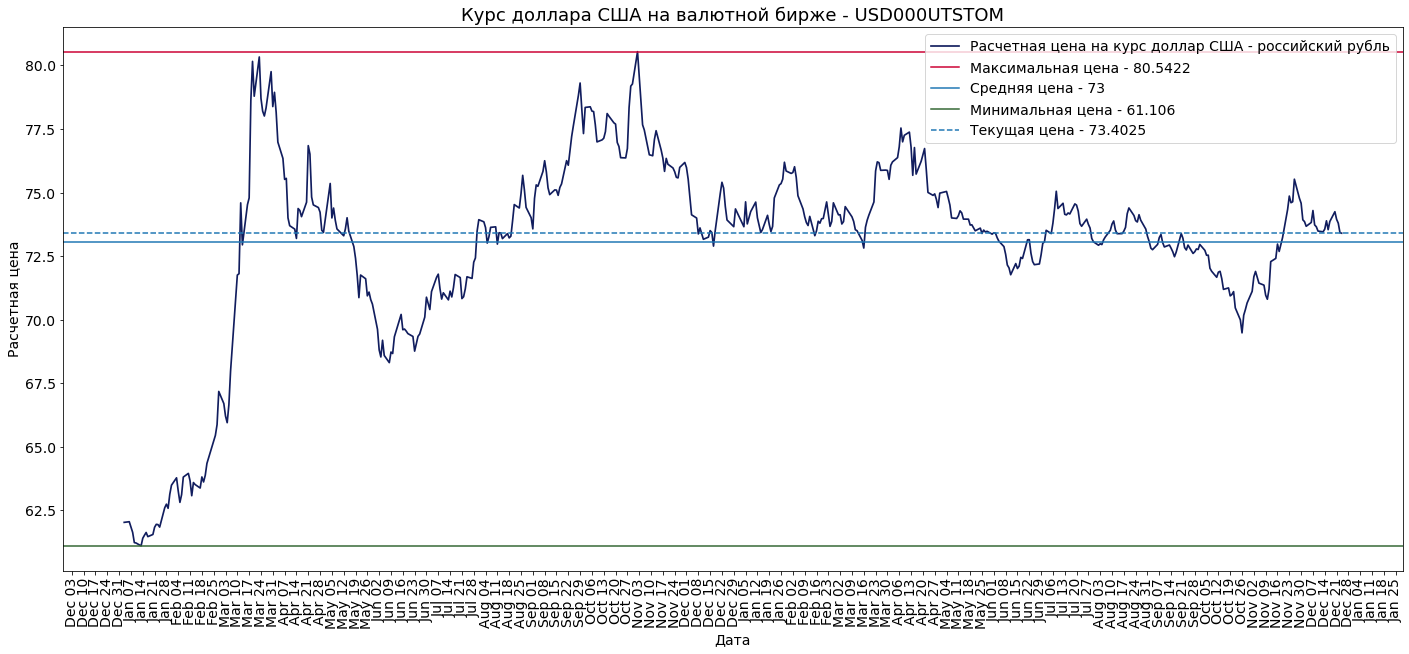

In [151]:
fig, ax = plt.subplots(figsize=(24, 10))
ax.plot(si_df['moment'], si_df['si_price'], label='Расчетная цена на курс доллар США - российский рубль', color='#111d5e', linewidth=1.7)
plt.axhline(y=np.nanmax(si_df['si_price']), label='Максимальная цена - '+str(np.nanmax(si_df['si_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(si_df['si_price']), label='Средняя цена - '+str(round(np.mean(si_df['si_price']))), linestyle='-')
plt.axhline(y=np.nanmin(si_df['si_price']), label='Минимальная цена - '+str(np.nanmin(si_df['si_price'])), linestyle='-', color='#336633')
plt.axhline(y=si_df['si_price'].iat[-1], label='Текущая цена - '+str(si_df['si_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Курс доллара США на валютной бирже - USD000UTSTOM', fontsize=18)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

fig.savefig('./graphs/Si.png')

In [152]:
long_position_si_ind = round(si_df['long_position_si_ind'].iat[-1])
long_position_si_ent = round(si_df['long_position_si_ent'].iat[-1])

long_position_si = pd.DataFrame({'Количество договоров (контрактов)': [long_position_si_ind, long_position_si_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [153]:
short_position_si_ind = round(si_df['short_position_si_ind'].iat[-1])
short_position_si_ent = round(si_df['short_position_si_ent'].iat[-1])

short_position_si = pd.DataFrame({'Количество договоров (контрактов)': [short_position_si_ind, short_position_si_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

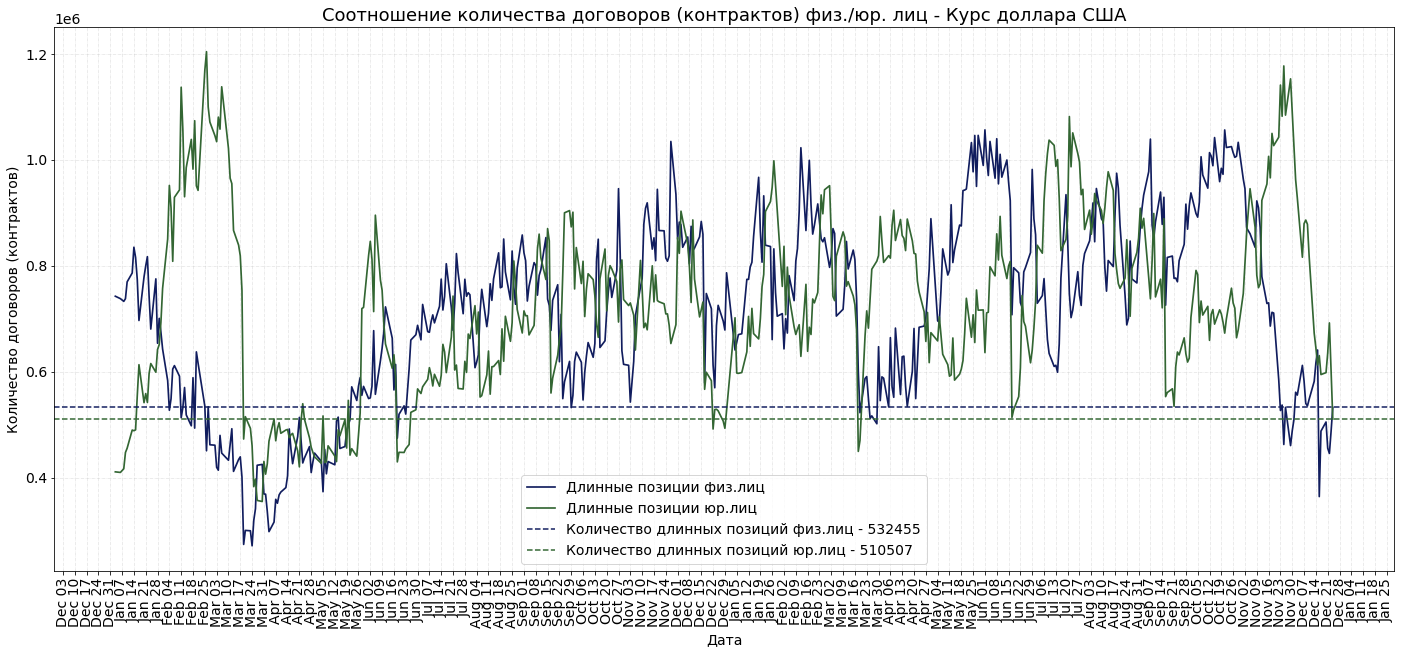

In [154]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(si_df['moment'], si_df['long_position_si_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(si_df['moment'], si_df['long_position_si_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=si_df['long_position_si_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(si_df['long_position_si_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=si_df['long_position_si_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(si_df['long_position_si_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс доллара США', fontsize=18)
plt.legend()
plt.show()

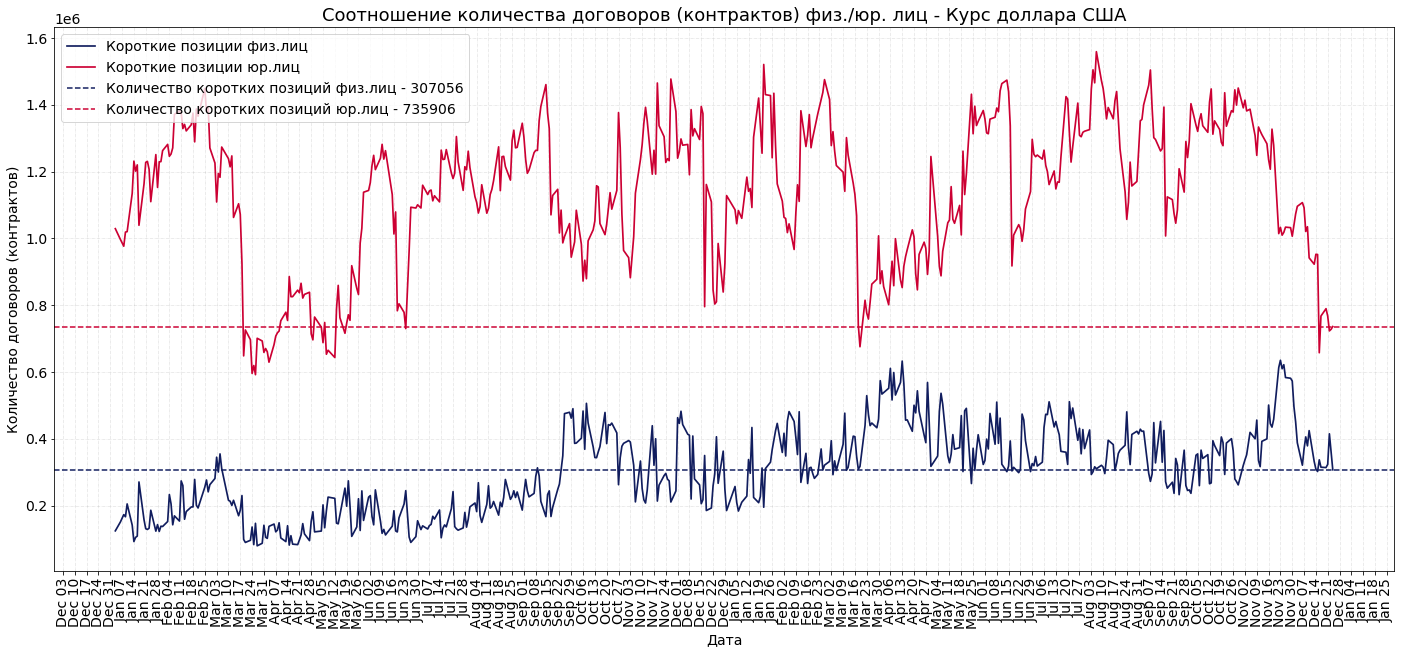

In [155]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(si_df['moment'], si_df['short_position_si_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(si_df['moment'], si_df['short_position_si_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=si_df['short_position_si_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(si_df['short_position_si_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=si_df['short_position_si_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(si_df['short_position_si_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс доллара США', fontsize=18)
plt.legend()
plt.show()

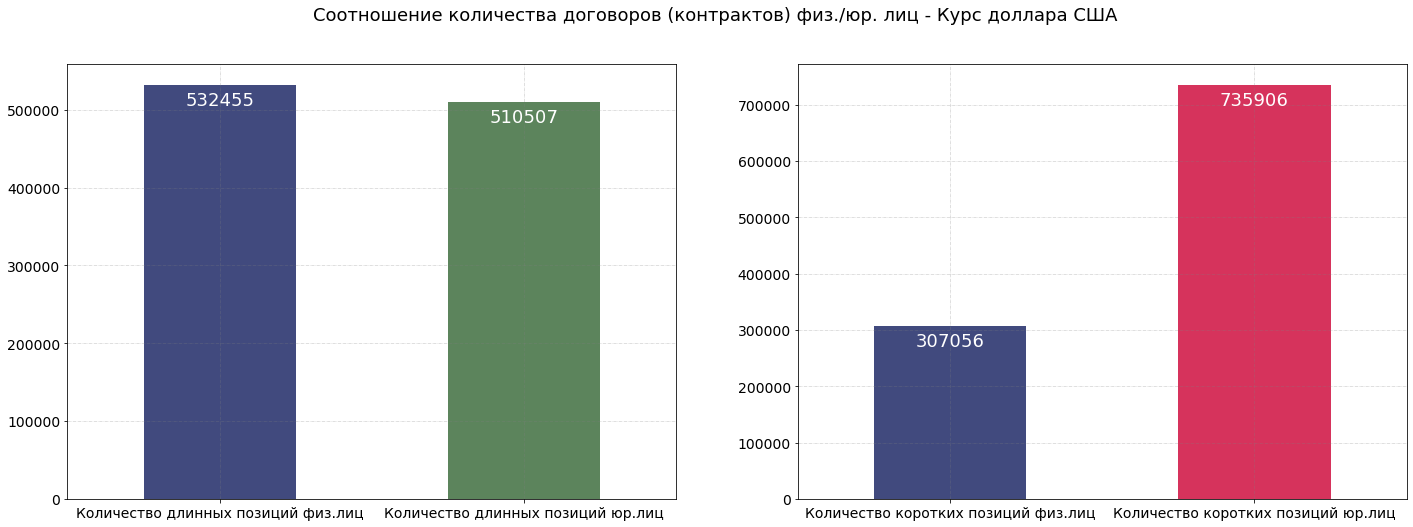

In [156]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_si['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_si['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс доллара США', fontsize=18)
plt.show()

## <a id='402'>Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM</a>  
- <a href='#0'>Table of contents</a>  

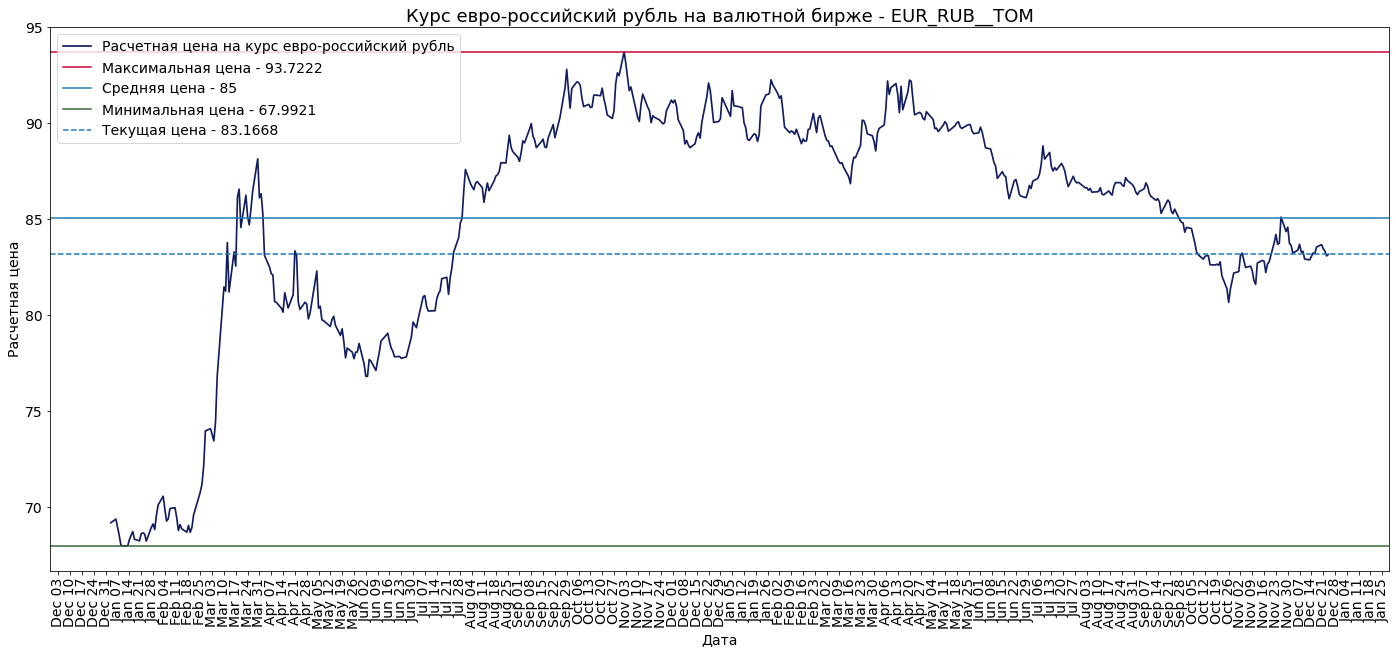

In [157]:
fig, ax = plt.subplots(figsize=(24, 10))
ax.plot(eu_df['moment'], eu_df['eu_price'], label='Расчетная цена на курс евро-российский рубль', color='#111d5e', linewidth=1.7)
plt.axhline(y=np.nanmax(eu_df['eu_price']), label='Максимальная цена - '+str(np.nanmax(eu_df['eu_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(eu_df['eu_price']), label='Средняя цена - '+str(round(np.mean(eu_df['eu_price']))), linestyle='-')
plt.axhline(y=np.nanmin(eu_df['eu_price']), label='Минимальная цена - '+str(np.nanmin(eu_df['eu_price'])), linestyle='-', color='#336633')
plt.axhline(y=eu_df['eu_price'].iat[-1], label='Текущая цена - '+str(eu_df['eu_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM', fontsize=18)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

fig.savefig('./graphs/Eu.png')

In [158]:
long_position_eu_ind = round(eu_df['long_position_eu_ind'].iat[-1])
long_position_eu_ent = round(eu_df['long_position_eu_ent'].iat[-1])

long_position_eu = pd.DataFrame({'Количество договоров (контрактов)': [long_position_eu_ind, long_position_eu_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [159]:
short_position_eu_ind = round(eu_df['short_position_eu_ind'].iat[-1])
short_position_eu_ent = round(eu_df['short_position_eu_ent'].iat[-1])

short_position_eu = pd.DataFrame({'Количество договоров (контрактов)': [short_position_eu_ind, short_position_eu_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

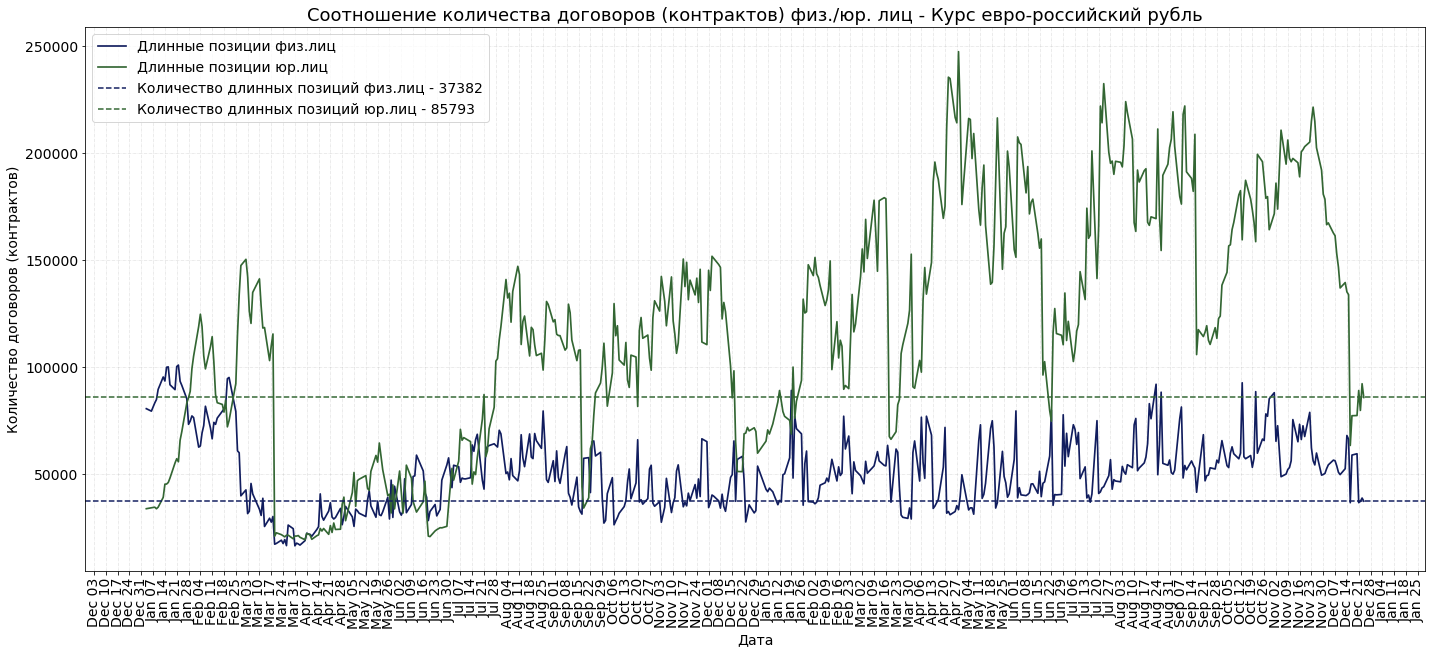

In [160]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(eu_df['moment'], eu_df['long_position_eu_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(eu_df['moment'], eu_df['long_position_eu_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=eu_df['long_position_eu_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(eu_df['long_position_eu_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=eu_df['long_position_eu_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(eu_df['long_position_eu_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс евро-российский рубль', fontsize=18)
plt.legend()
plt.show()

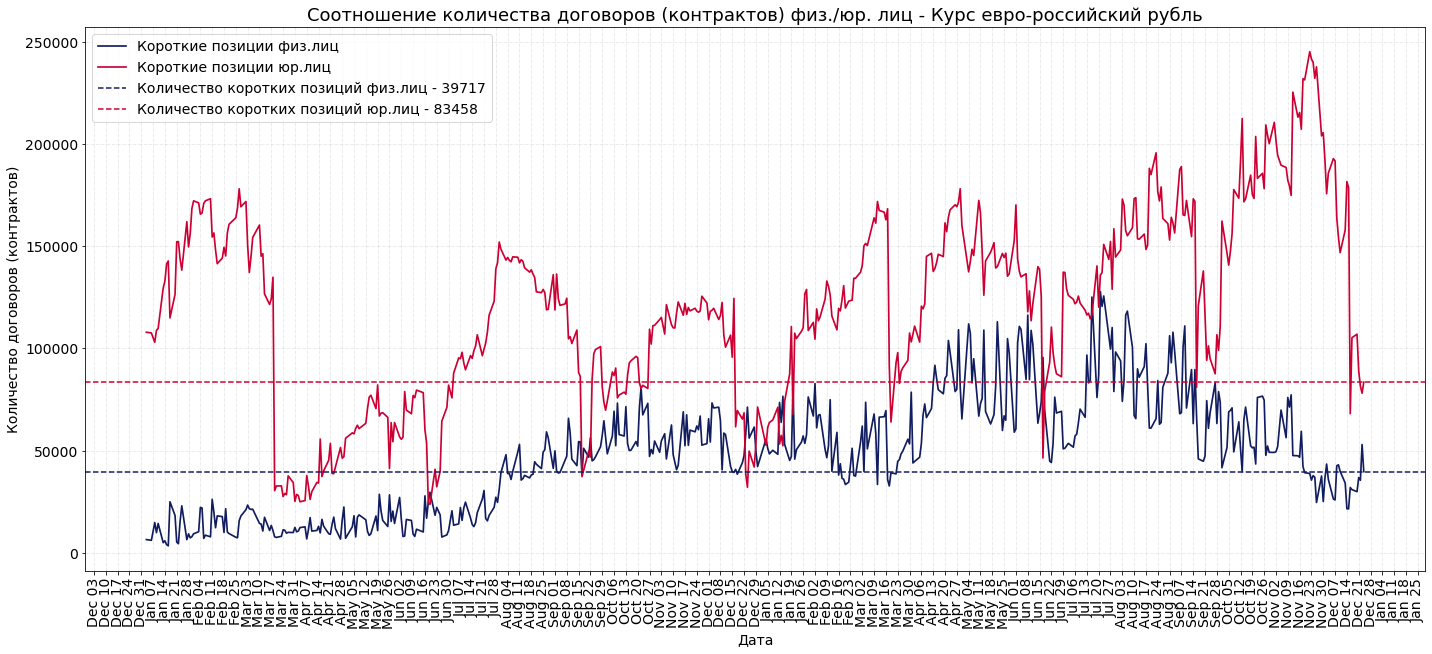

In [161]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(eu_df['moment'], eu_df['short_position_eu_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(eu_df['moment'], eu_df['short_position_eu_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=eu_df['short_position_eu_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(eu_df['short_position_eu_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=eu_df['short_position_eu_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(eu_df['short_position_eu_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс евро-российский рубль', fontsize=18)
plt.legend()
plt.show()

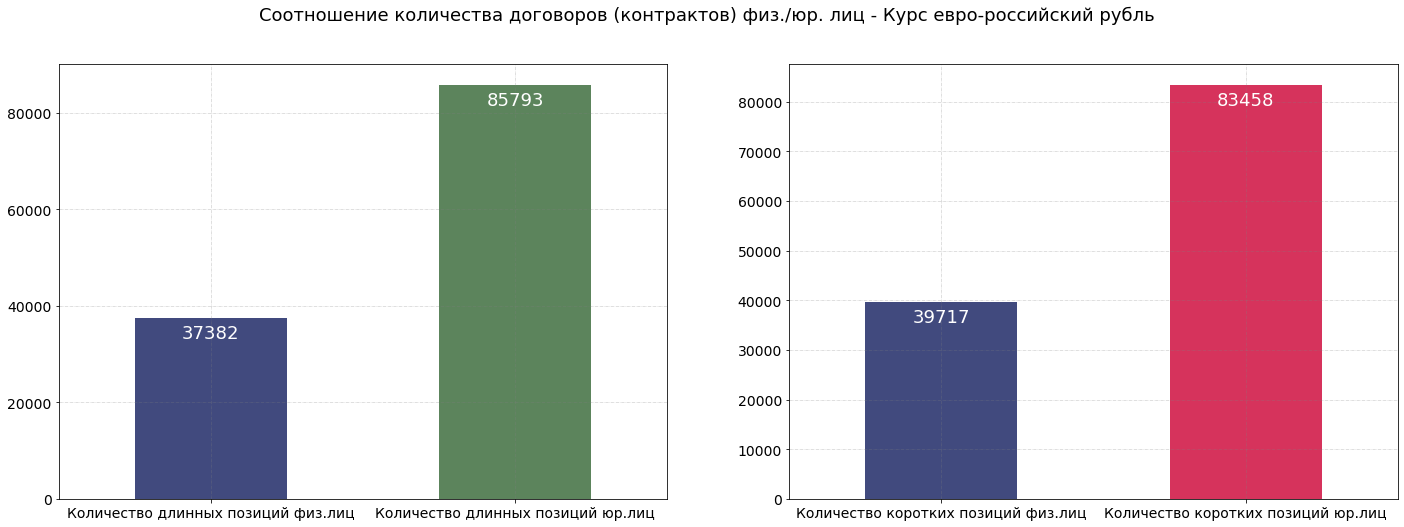

In [162]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_eu['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_eu['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - Курс евро-российский рубль', fontsize=18)
plt.show()

## <a id='403'>Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER)</a>  
- <a href='#0'>Table of contents</a>  

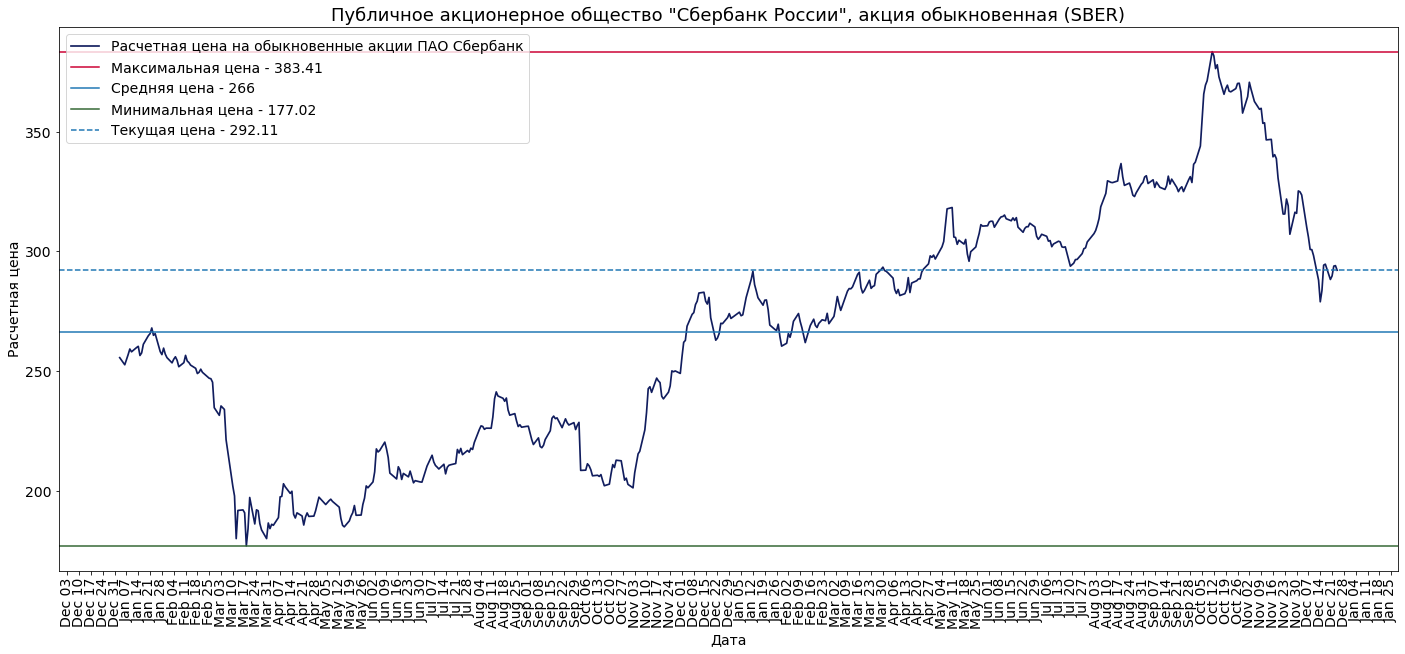

In [163]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(sber_df['moment'], sber_df['sber_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО Сбербанк', linewidth=1.7)
plt.axhline(y=np.nanmax(sber_df['sber_price']), label='Максимальная цена - '+str(np.nanmax(sber_df['sber_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(sber_df['sber_price']), label='Средняя цена - '+str(round(np.mean(sber_df['sber_price']))), linestyle='-')
plt.axhline(y=np.nanmin(sber_df['sber_price']), label='Минимальная цена - '+str(np.nanmin(sber_df['sber_price'])), linestyle='-', color='#336633')
plt.axhline(y=sber_df['sber_price'].iat[-1], label='Текущая цена - '+str(sber_df['sber_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER)', fontsize=18)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

fig.savefig('./graphs/SBRF.png')

In [164]:
long_position_sbrf_ind = round(sber_df['long_position_sbrf_ind'].iat[-1])
long_position_sbrf_ent = round(sber_df['long_position_sbrf_ent'].iat[-1])

long_position_sbrf = pd.DataFrame({'Количество договоров (контрактов)': [long_position_sbrf_ind, long_position_sbrf_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [165]:
short_position_sbrf_ind = round(sber_df['short_position_sbrf_ind'].iat[-1])
short_position_sbrf_ent = round(sber_df['short_position_sbrf_ent'].iat[-1])

short_position_sbrf = pd.DataFrame({'Количество договоров (контрактов)': [short_position_sbrf_ind, short_position_sbrf_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

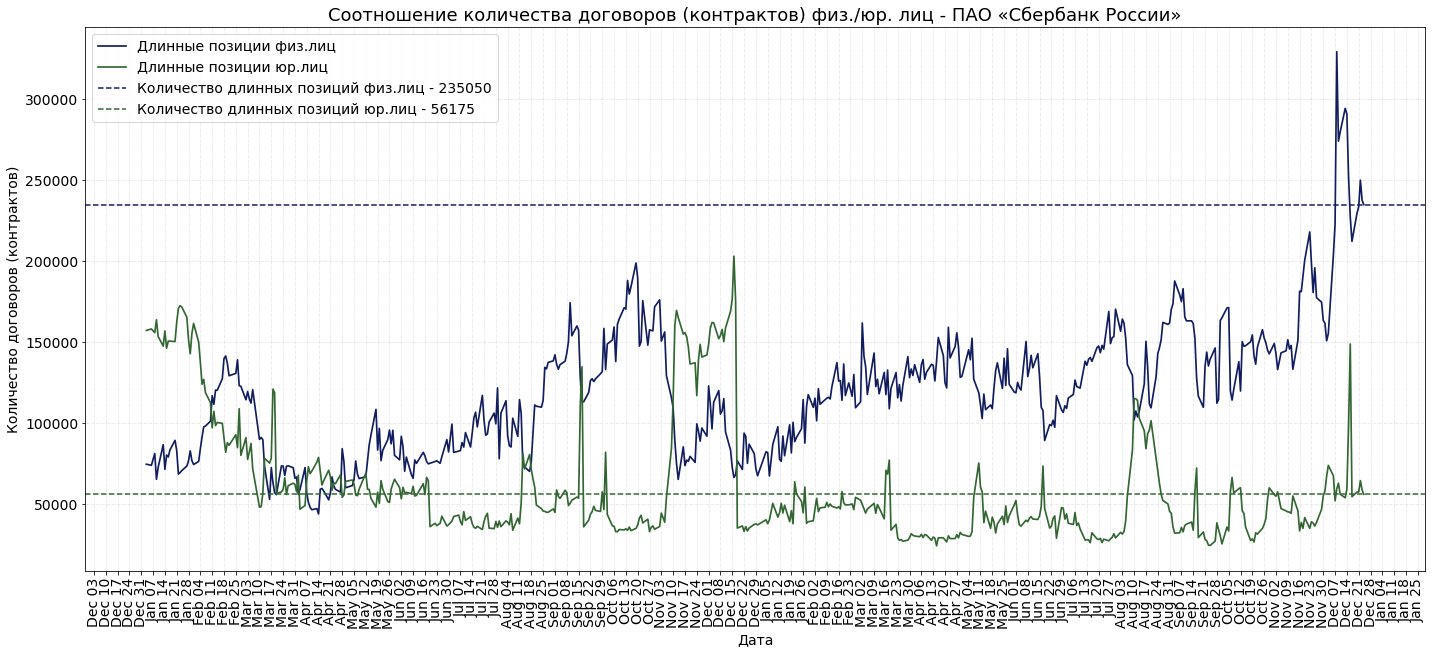

In [166]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(sber_df['moment'], sber_df['long_position_sbrf_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(sber_df['moment'], sber_df['long_position_sbrf_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=sber_df['long_position_sbrf_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(sber_df['long_position_sbrf_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=sber_df['long_position_sbrf_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(sber_df['long_position_sbrf_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Сбербанк России»', fontsize=18)
plt.legend()
plt.show()

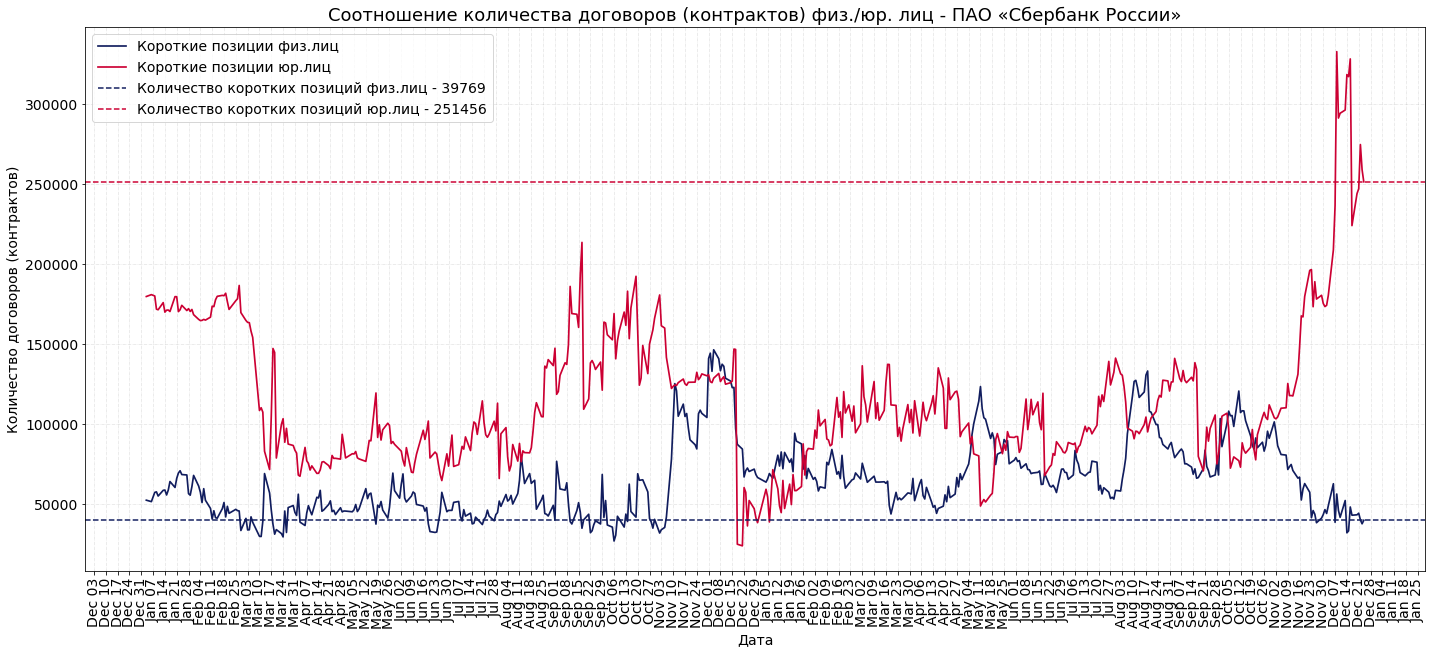

In [167]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(sber_df['moment'], sber_df['short_position_sbrf_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(sber_df['moment'], sber_df['short_position_sbrf_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=sber_df['short_position_sbrf_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(sber_df['short_position_sbrf_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=sber_df['short_position_sbrf_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(sber_df['short_position_sbrf_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Сбербанк России»', fontsize=18)
plt.legend()
plt.show()

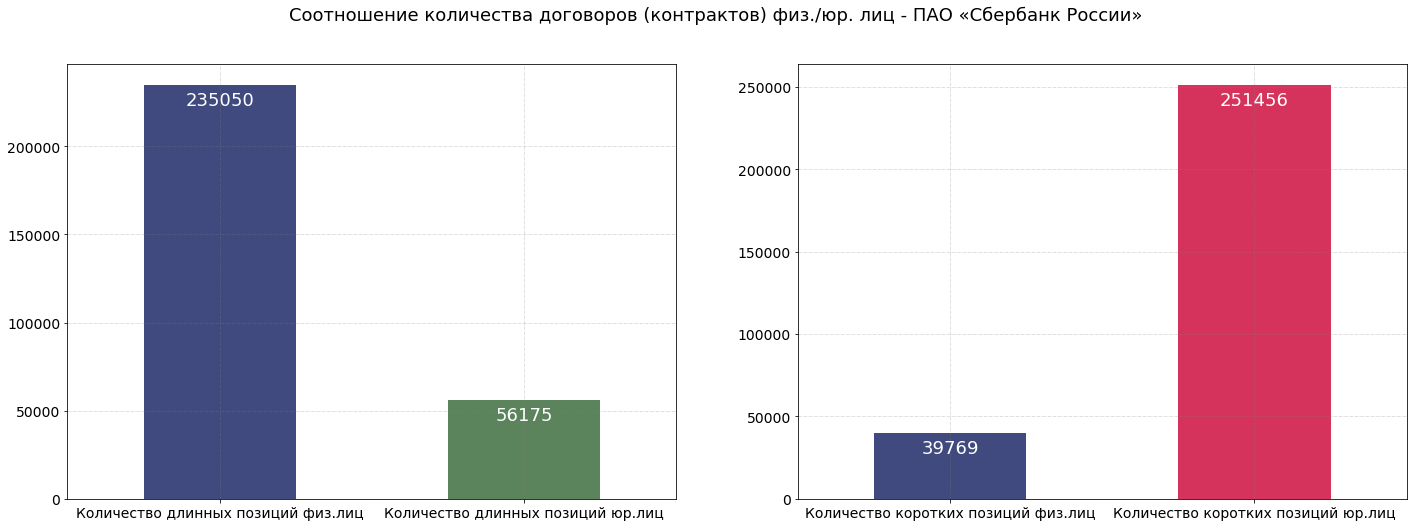

In [168]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_sbrf['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_sbrf['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Сбербанк России»', fontsize=18)
plt.show()

## <a id='404'>Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR)</a>  
- <a href='#0'>Table of contents</a>  

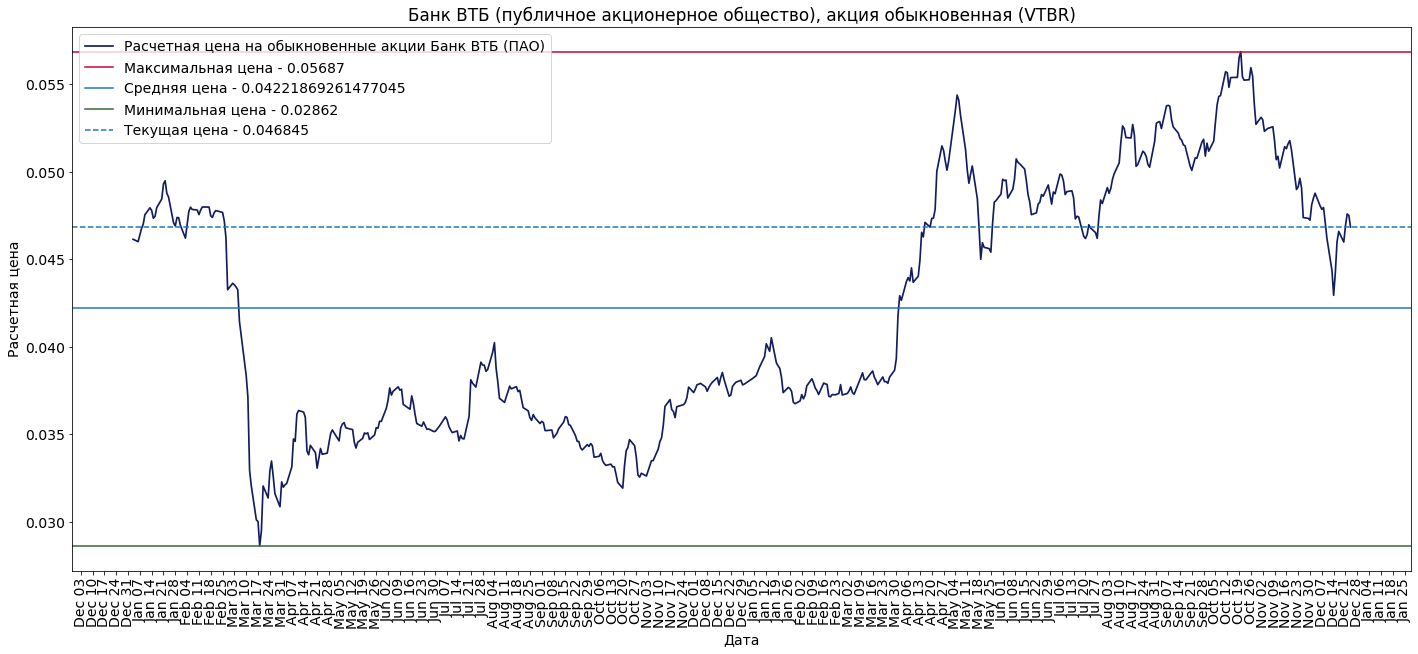

In [169]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(vtbr_df['moment'], vtbr_df['vtbr_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции Банк ВТБ (ПАО)', linewidth=1.7)
plt.axhline(y=np.nanmax(vtbr_df['vtbr_price']), label='Максимальная цена - '+str(np.nanmax(vtbr_df['vtbr_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(vtbr_df['vtbr_price']), label='Средняя цена - '+str(np.mean(vtbr_df['vtbr_price'])), linestyle='-')
plt.axhline(y=np.nanmin(vtbr_df['vtbr_price']), label='Минимальная цена - '+str(np.nanmin(vtbr_df['vtbr_price'])), linestyle='-', color='#336633')
plt.axhline(y=vtbr_df['vtbr_price'].iat[-1], label='Текущая цена - '+str(vtbr_df['vtbr_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

fig.savefig('./graphs/VTBR.png')

In [170]:
long_position_vtbr_ind = round(vtbr_df['long_position_vtbr_ind'].iat[-1])
long_position_vtbr_ent = round(vtbr_df['long_position_vtbr_ent'].iat[-1])

long_position_vtbr = pd.DataFrame({'Количество договоров (контрактов)': [long_position_vtbr_ind, long_position_vtbr_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [171]:
short_position_vtbr_ind = round(vtbr_df['short_position_vtbr_ind'].iat[-1])
short_position_vtbr_ent = round(vtbr_df['short_position_vtbr_ent'].iat[-1])

short_position_vtbr = pd.DataFrame({'Количество договоров (контрактов)': [short_position_vtbr_ind, short_position_vtbr_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

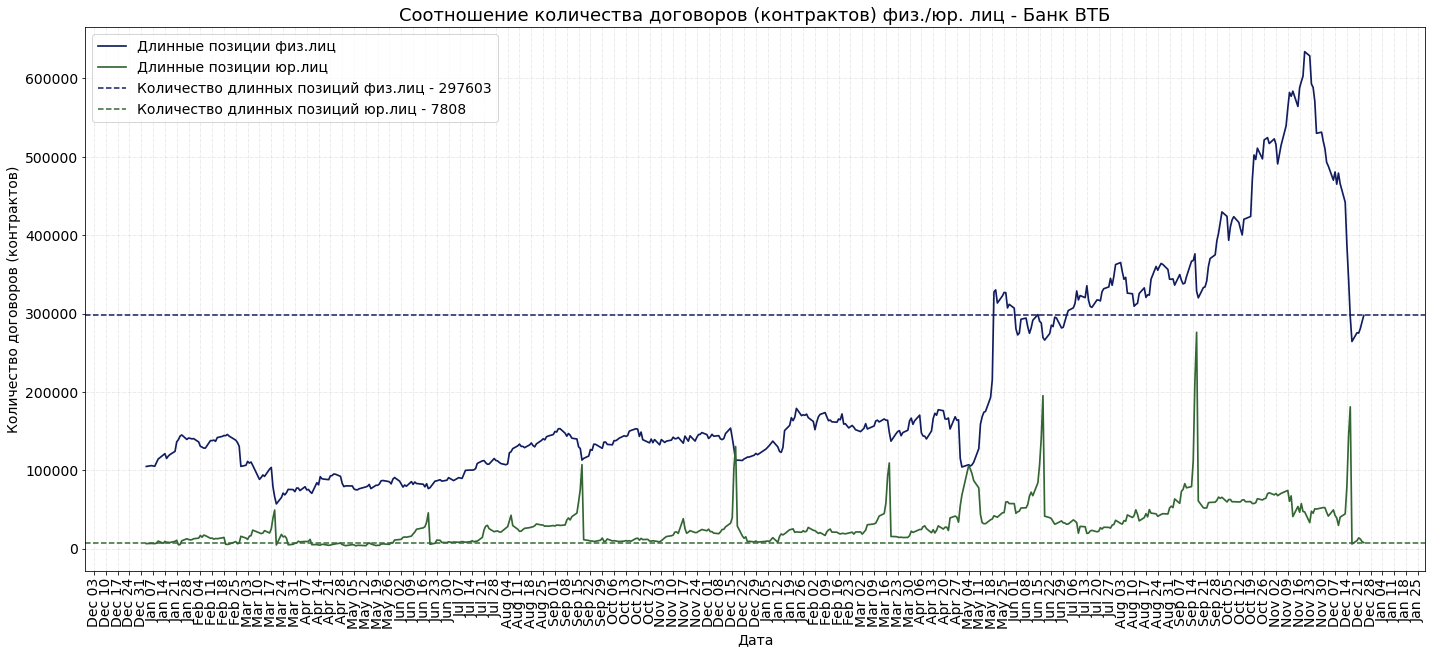

In [172]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(vtbr_df['moment'], vtbr_df['long_position_vtbr_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(vtbr_df['moment'], vtbr_df['long_position_vtbr_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=vtbr_df['long_position_vtbr_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(vtbr_df['long_position_vtbr_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=vtbr_df['long_position_vtbr_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(vtbr_df['long_position_vtbr_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Банк ВТБ', fontsize=18)
plt.legend()
plt.show()

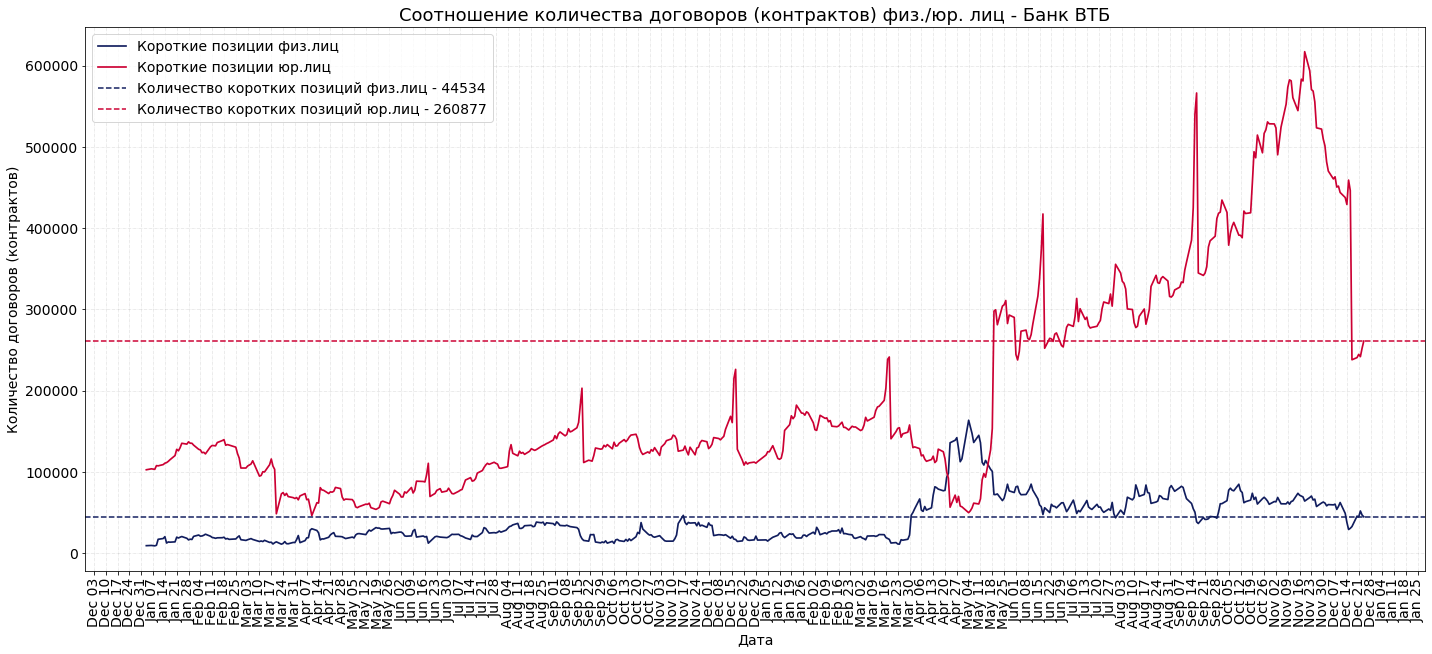

In [173]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(vtbr_df['moment'], vtbr_df['short_position_vtbr_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(vtbr_df['moment'], vtbr_df['short_position_vtbr_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=vtbr_df['short_position_vtbr_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(vtbr_df['short_position_vtbr_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=vtbr_df['short_position_vtbr_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(vtbr_df['short_position_vtbr_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - Банк ВТБ', fontsize=18)
plt.legend()
plt.show()

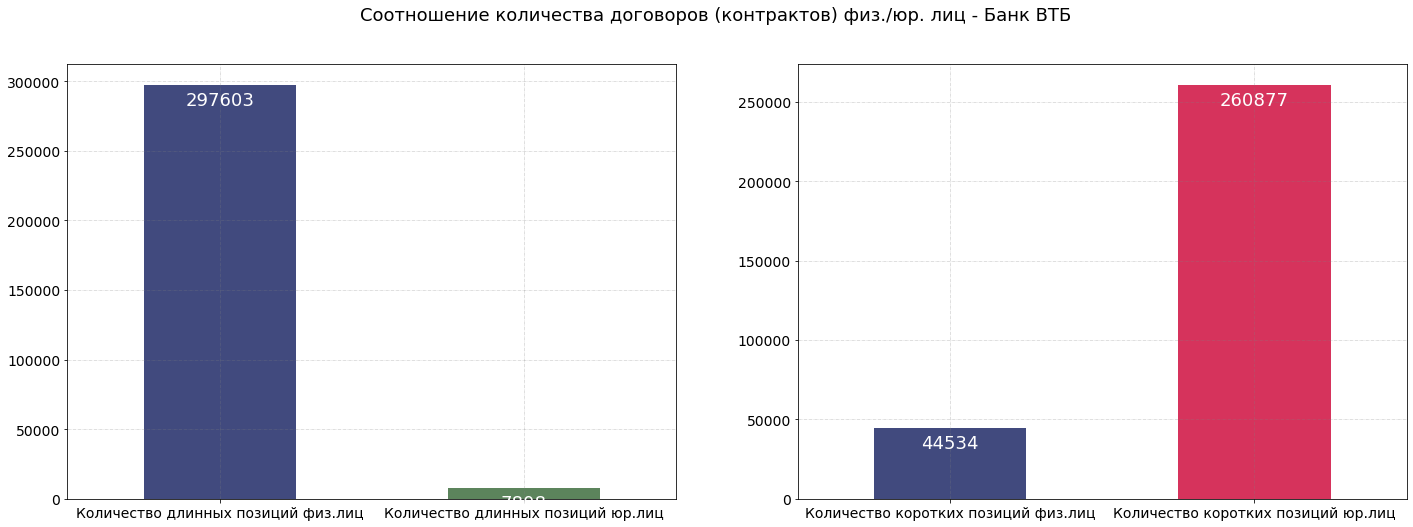

In [174]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_vtbr['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_vtbr['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - Банк ВТБ', fontsize=18)
plt.show()

## <a id='405'>Публичное акционерное общество "Газпром", акция обыкновенная (GAZP)</a>  
- <a href='#0'>Table of contents</a>  

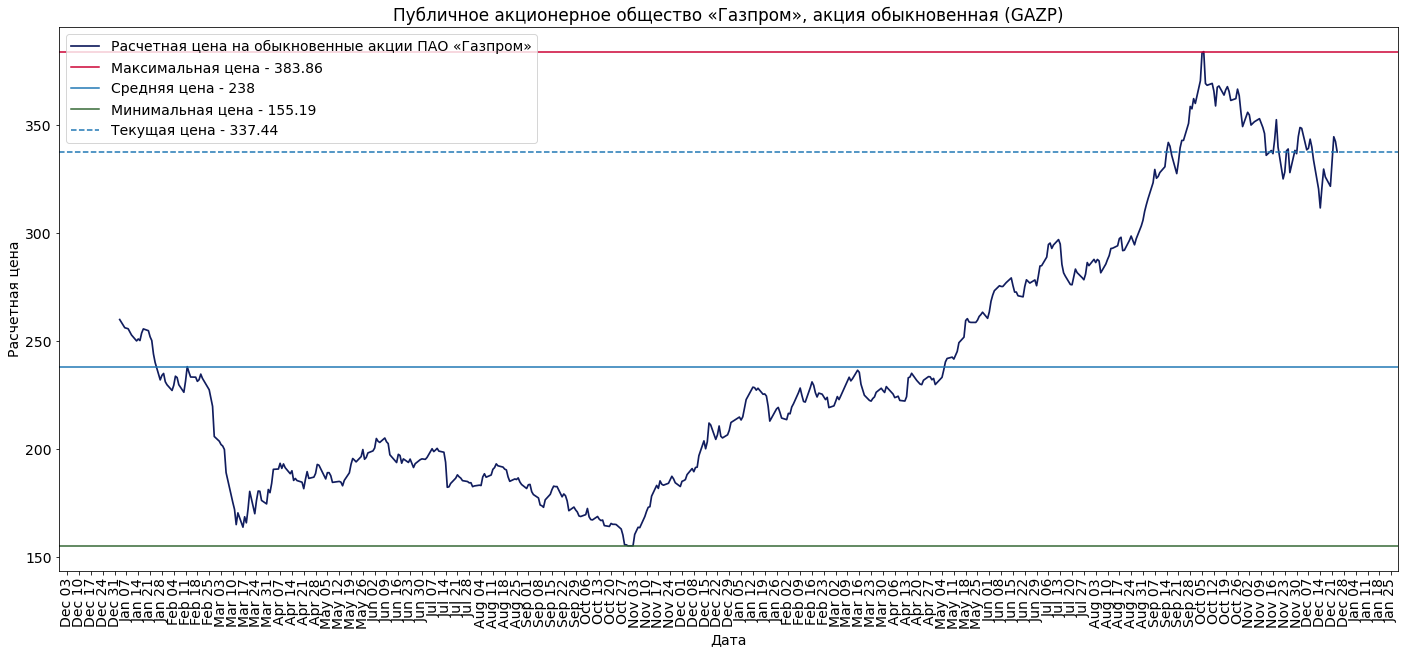

In [175]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gazr_df['moment'], gazr_df['gazr_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «Газпром»', linewidth=1.7)
plt.axhline(y=np.nanmax(gazr_df['gazr_price']), label='Максимальная цена - '+str(np.nanmax(gazr_df['gazr_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(gazr_df['gazr_price']), label='Средняя цена - '+str(round(np.mean(gazr_df['gazr_price']))), linestyle='-')
plt.axhline(y=np.nanmin(gazr_df['gazr_price']), label='Минимальная цена - '+str(np.nanmin(gazr_df['gazr_price'])), linestyle='-', color='#336633')
plt.axhline(y=gazr_df['gazr_price'].iat[-1], label='Текущая цена - '+str(gazr_df['gazr_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество «Газпром», акция обыкновенная (GAZP)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

fig.savefig('./graphs/GAZP.png')

In [176]:
long_position_gazr_ind = round(gazr_df['long_position_gazr_ind'].iat[-1])
long_position_gazr_ent = round(gazr_df['long_position_gazr_ent'].iat[-1])

long_position_gazr = pd.DataFrame({'Количество договоров (контрактов)': [long_position_gazr_ind, long_position_gazr_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [177]:
short_position_gazr_ind = round(gazr_df['short_position_gazr_ind'].iat[-1])
short_position_gazr_ent = round(gazr_df['short_position_gazr_ent'].iat[-1])

short_position_gazr = pd.DataFrame({'Количество договоров (контрактов)': [short_position_gazr_ind, short_position_gazr_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

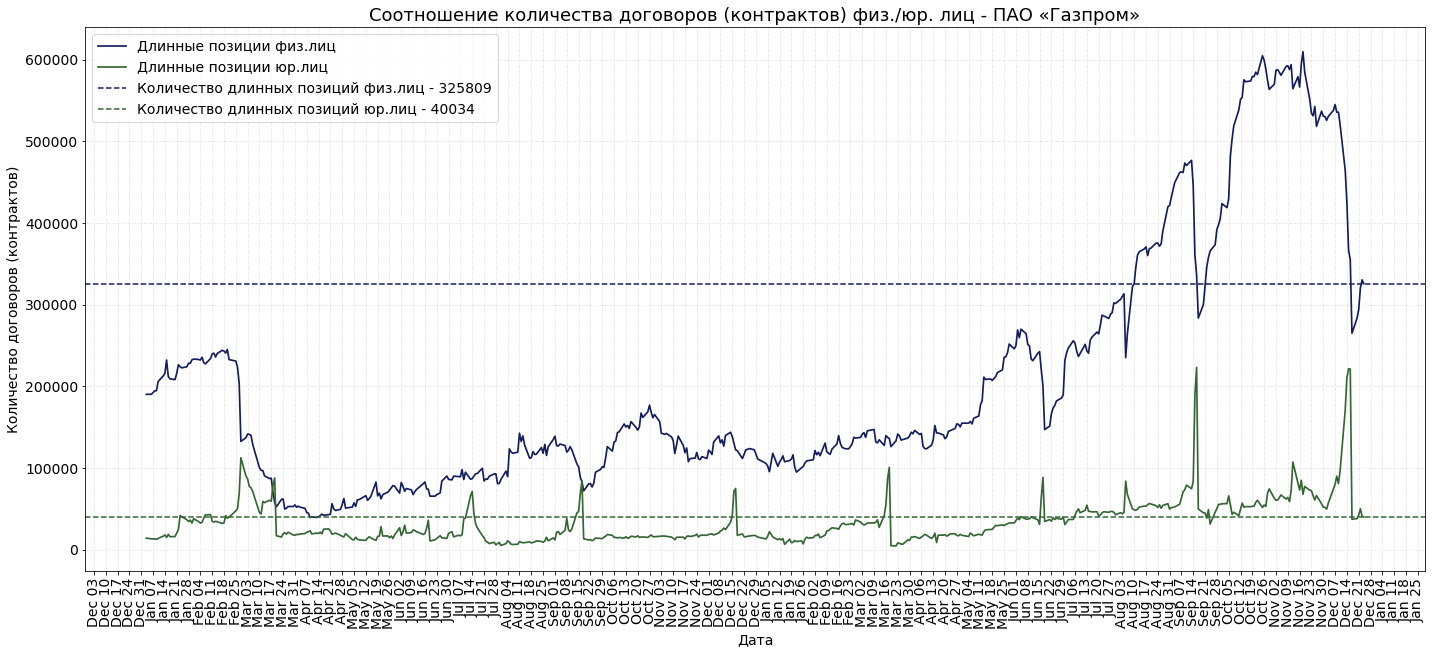

In [178]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gazr_df['moment'], gazr_df['long_position_gazr_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(gazr_df['moment'], gazr_df['long_position_gazr_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=gazr_df['long_position_gazr_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(gazr_df['long_position_gazr_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=gazr_df['long_position_gazr_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(gazr_df['long_position_gazr_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Газпром»', fontsize=18)
plt.legend()
plt.show()

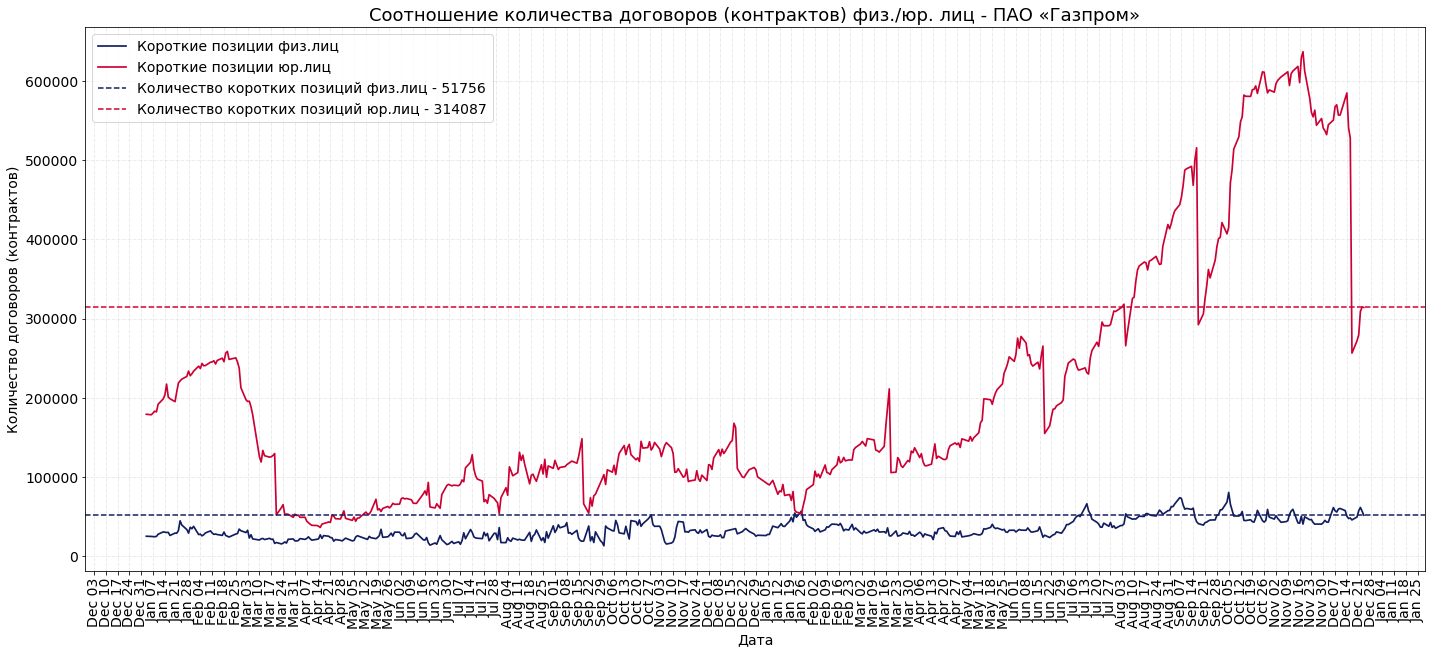

In [179]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gazr_df['moment'], gazr_df['short_position_gazr_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(gazr_df['moment'], gazr_df['short_position_gazr_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=gazr_df['short_position_gazr_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(gazr_df['short_position_gazr_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=gazr_df['short_position_gazr_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(gazr_df['short_position_gazr_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Газпром»', fontsize=18)
plt.legend()
plt.show()

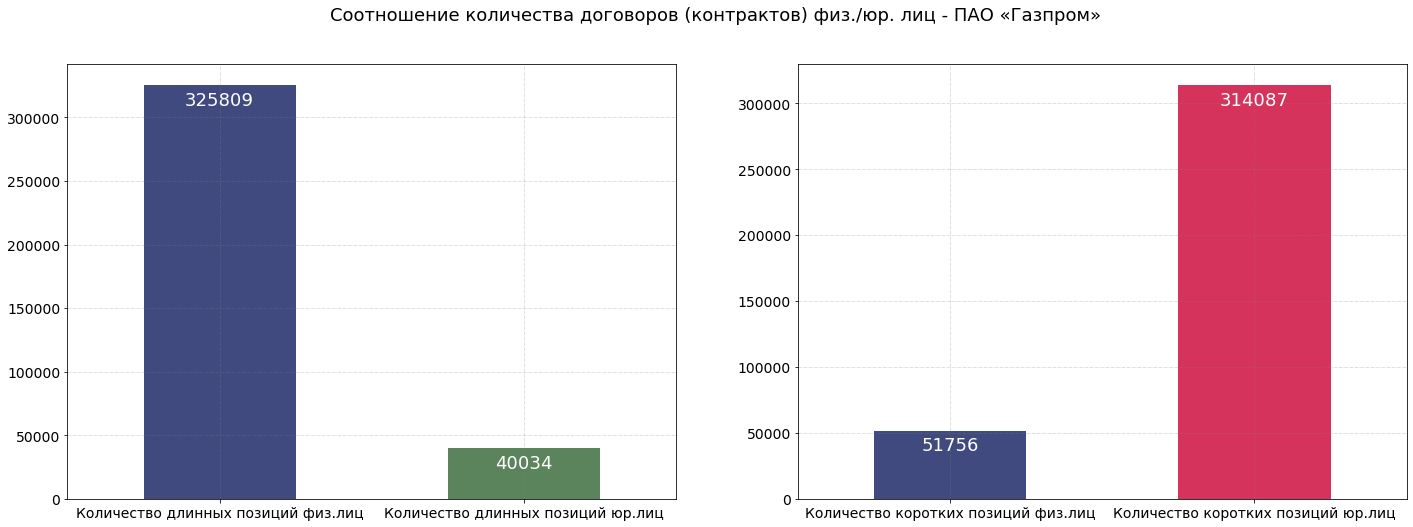

In [180]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_gazr['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_gazr['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Газпром»', fontsize=18)
plt.show()

## <a id='406'>Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH)</a>  
- <a href='#0'>Table of contents</a>  

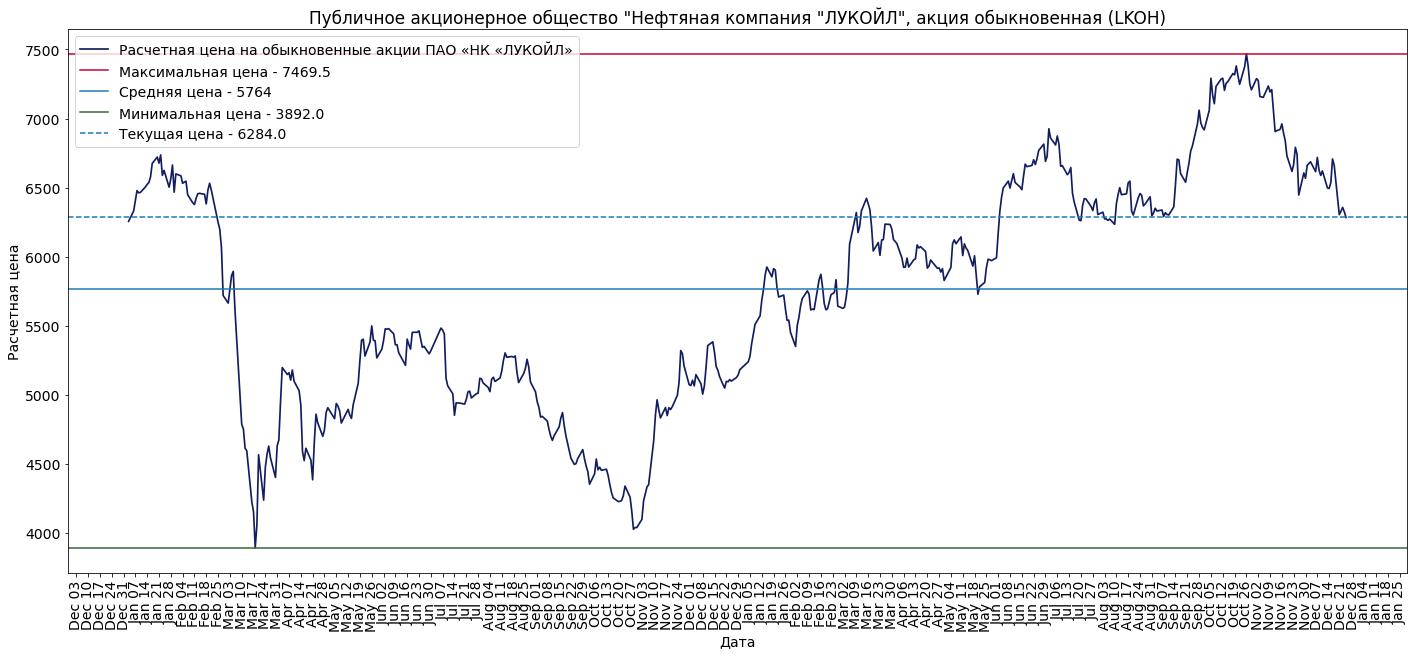

In [181]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(lkoh_df['moment'], lkoh_df['lkoh_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «НК «ЛУКОЙЛ»', linewidth=1.7)
plt.axhline(y=np.nanmax(lkoh_df['lkoh_price']), label='Максимальная цена - '+str(np.nanmax(lkoh_df['lkoh_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(lkoh_df['lkoh_price']), label='Средняя цена - '+str(round(np.mean(lkoh_df['lkoh_price']))), linestyle='-')
plt.axhline(y=np.nanmin(lkoh_df['lkoh_price']), label='Минимальная цена - '+str(np.nanmin(lkoh_df['lkoh_price'])), linestyle='-', color='#336633')
plt.axhline(y=lkoh_df['lkoh_price'].iat[-1], label='Текущая цена - '+str(lkoh_df['lkoh_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

fig.savefig('./graphs/LKOH.png')

In [182]:
long_position_lkoh_ind = round(lkoh_df['long_position_lkoh_ind'].iat[-1])
long_position_lkoh_ent = round(lkoh_df['long_position_lkoh_ent'].iat[-1])

long_position_lkoh = pd.DataFrame({'Количество договоров (контрактов)': [long_position_lkoh_ind, long_position_lkoh_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [183]:
short_position_lkoh_ind = round(lkoh_df['short_position_lkoh_ind'].iat[-1])
short_position_lkoh_ent = round(lkoh_df['short_position_lkoh_ent'].iat[-1])

short_position_lkoh = pd.DataFrame({'Количество договоров (контрактов)': [short_position_lkoh_ind, short_position_lkoh_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

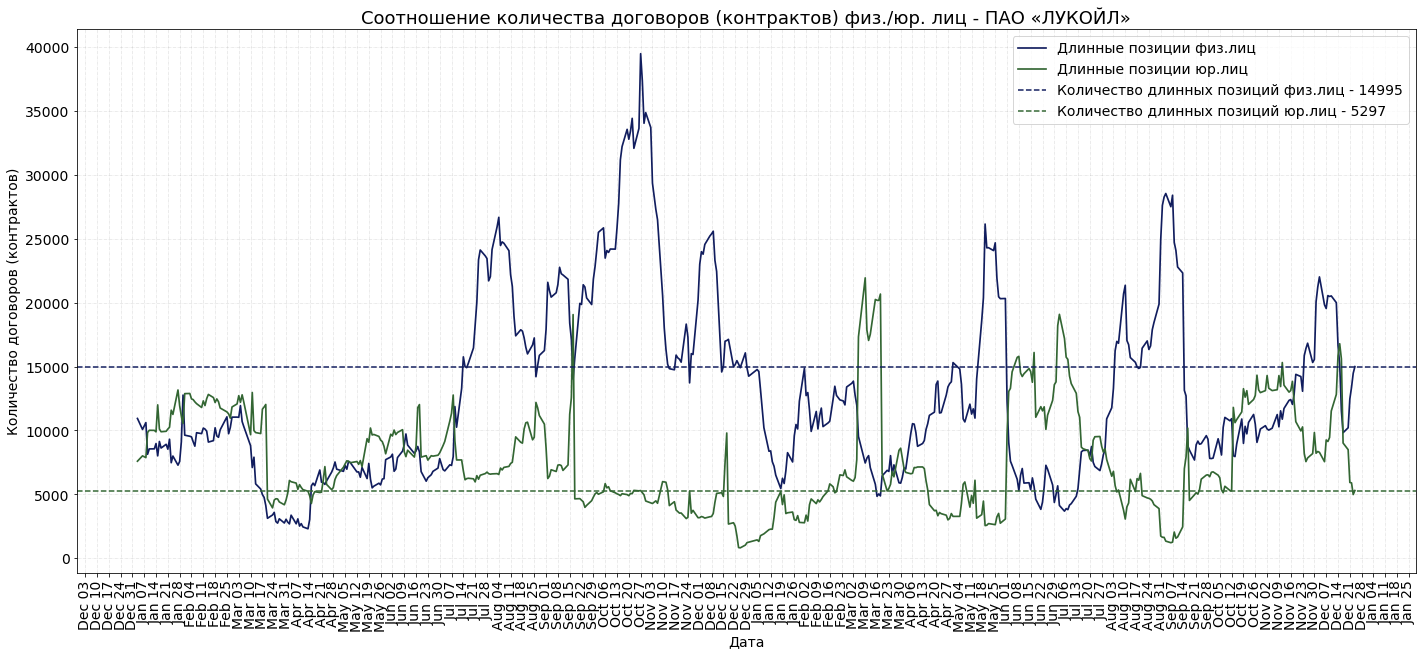

In [184]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(lkoh_df['moment'], lkoh_df['long_position_lkoh_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(lkoh_df['moment'], lkoh_df['long_position_lkoh_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=lkoh_df['long_position_lkoh_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(lkoh_df['long_position_lkoh_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=lkoh_df['long_position_lkoh_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(lkoh_df['long_position_lkoh_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ЛУКОЙЛ»', fontsize=18)
plt.legend()
plt.show()

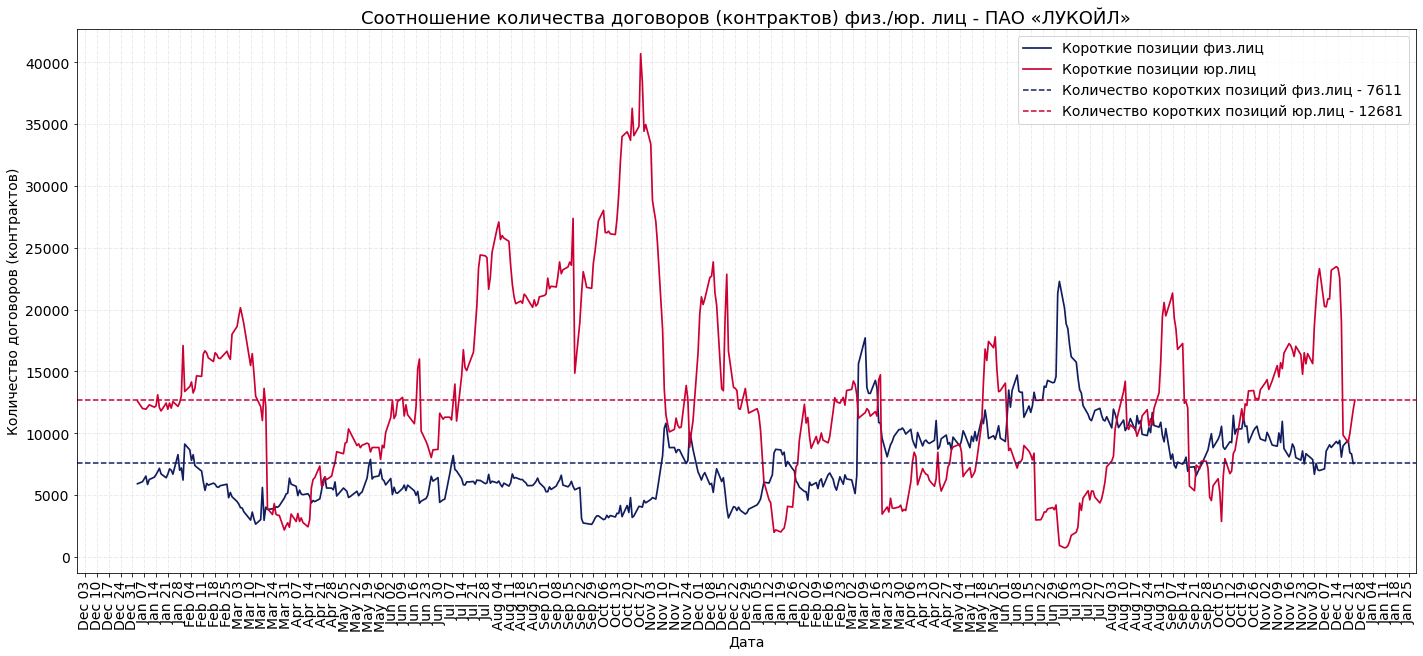

In [185]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(lkoh_df['moment'], lkoh_df['short_position_lkoh_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(lkoh_df['moment'], lkoh_df['short_position_lkoh_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=lkoh_df['short_position_lkoh_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(lkoh_df['short_position_lkoh_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=lkoh_df['short_position_lkoh_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(lkoh_df['short_position_lkoh_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ЛУКОЙЛ»', fontsize=18)
plt.legend()
plt.show()

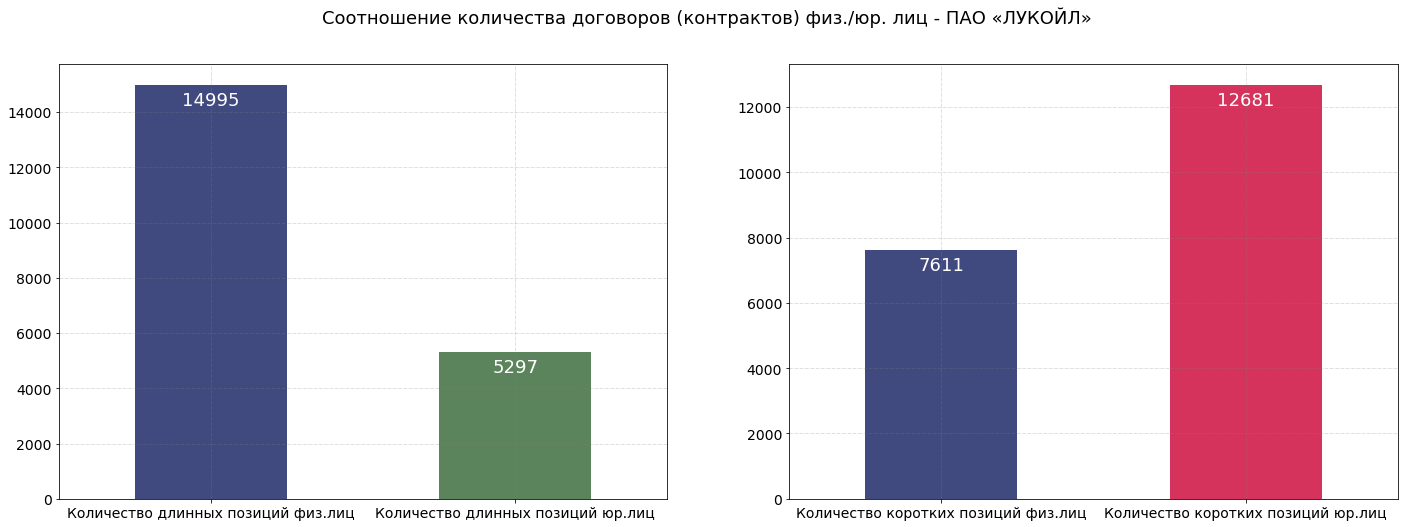

In [186]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_lkoh['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_lkoh['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ЛУКОЙЛ»', fontsize=18)
plt.show()

## <a id='407'>Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN)</a>  
- <a href='#0'>Table of contents</a>  

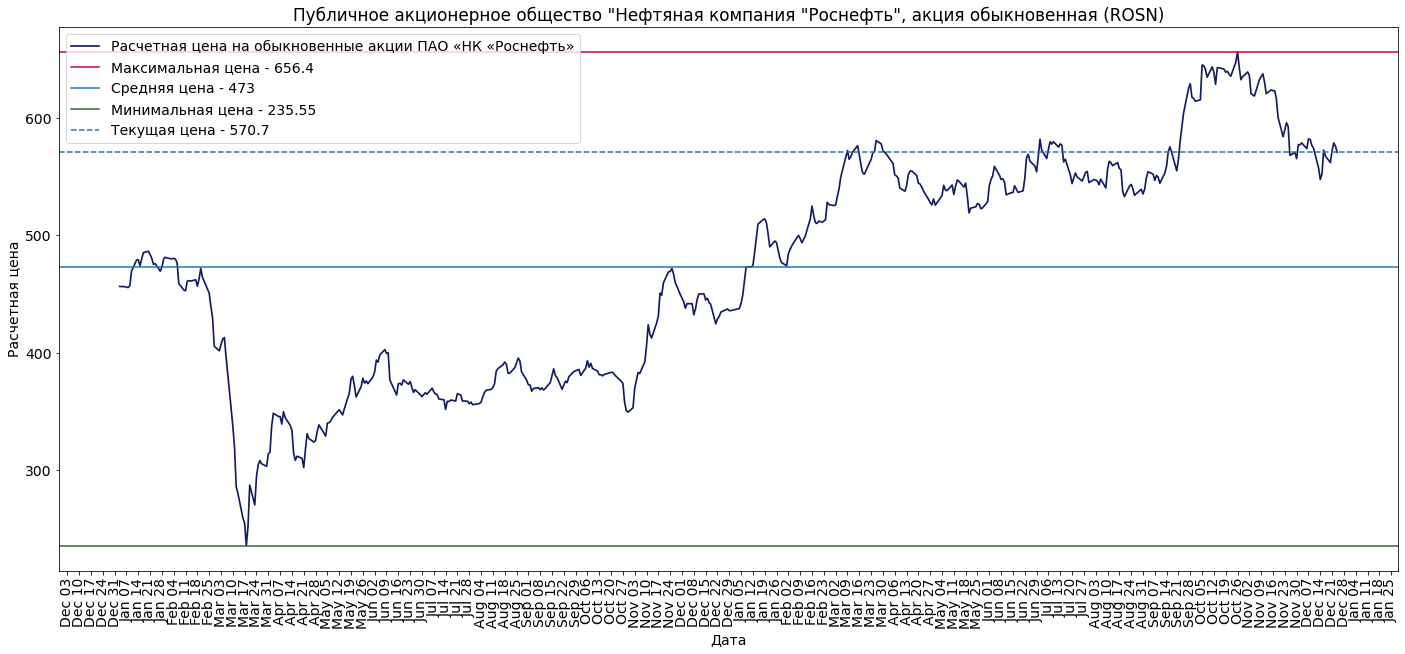

In [187]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(rosn_df['moment'], rosn_df['rosn_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «НК «Роснефть»', linewidth=1.7)
plt.axhline(y=np.nanmax(rosn_df['rosn_price']), label='Максимальная цена - '+str(np.nanmax(rosn_df['rosn_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(rosn_df['rosn_price']), label='Средняя цена - '+str(round(np.mean(rosn_df['rosn_price']))), linestyle='-')
plt.axhline(y=np.nanmin(rosn_df['rosn_price']), label='Минимальная цена - '+str(np.nanmin(rosn_df['rosn_price'])), linestyle='-', color='#336633')
plt.axhline(y=rosn_df['rosn_price'].iat[-1], label='Текущая цена - '+str(rosn_df['rosn_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

fig.savefig('./graphs/ROSN.png')

In [188]:
long_position_rosn_ind = round(rosn_df['long_position_rosn_ind'].iat[-1])
long_position_rosn_ent = round(rosn_df['long_position_rosn_ent'].iat[-1])

long_position_rosn = pd.DataFrame({'Количество договоров (контрактов)': [long_position_rosn_ind, long_position_rosn_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [189]:
short_position_rosn_ind = round(rosn_df['short_position_rosn_ind'].iat[-1])
short_position_rosn_ent = round(rosn_df['short_position_rosn_ent'].iat[-1])

short_position_rosn = pd.DataFrame({'Количество договоров (контрактов)': [short_position_rosn_ind, short_position_rosn_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

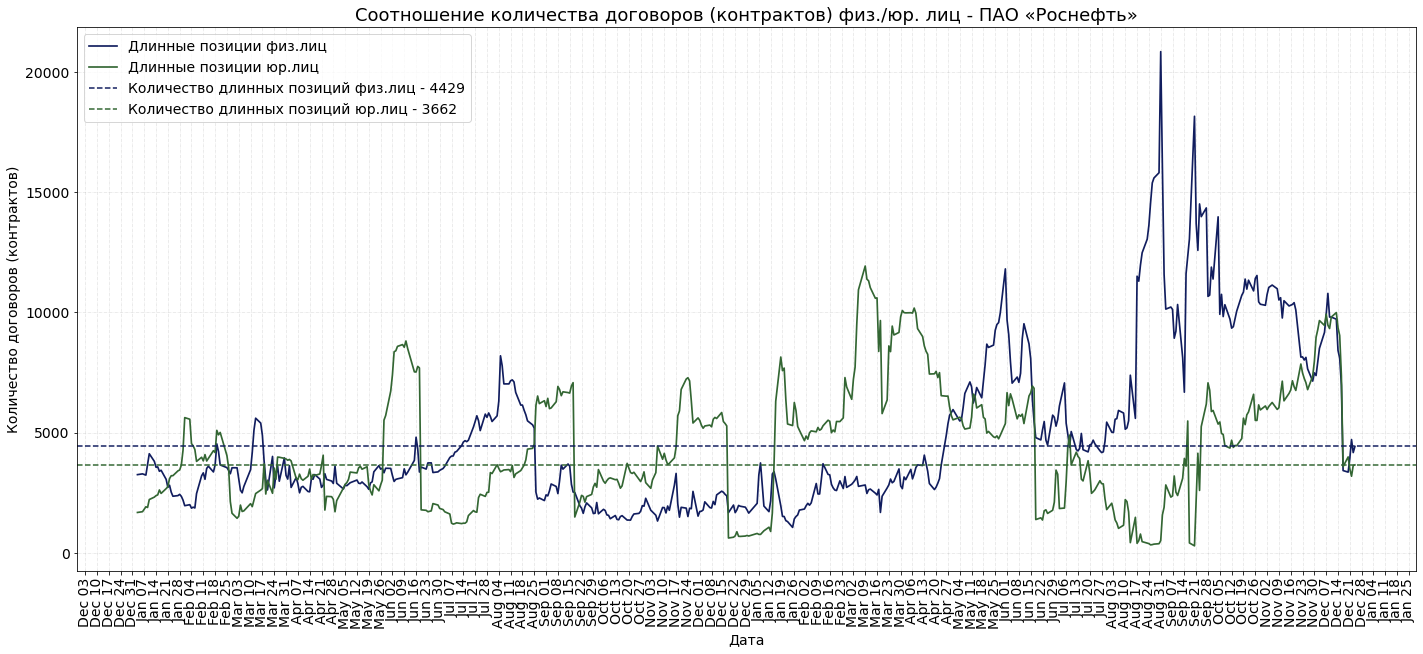

In [190]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(rosn_df['moment'], rosn_df['long_position_rosn_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(rosn_df['moment'], rosn_df['long_position_rosn_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=rosn_df['long_position_rosn_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(rosn_df['long_position_rosn_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=rosn_df['long_position_rosn_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(rosn_df['long_position_rosn_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Роснефть»', fontsize=18)
plt.legend()
plt.show()

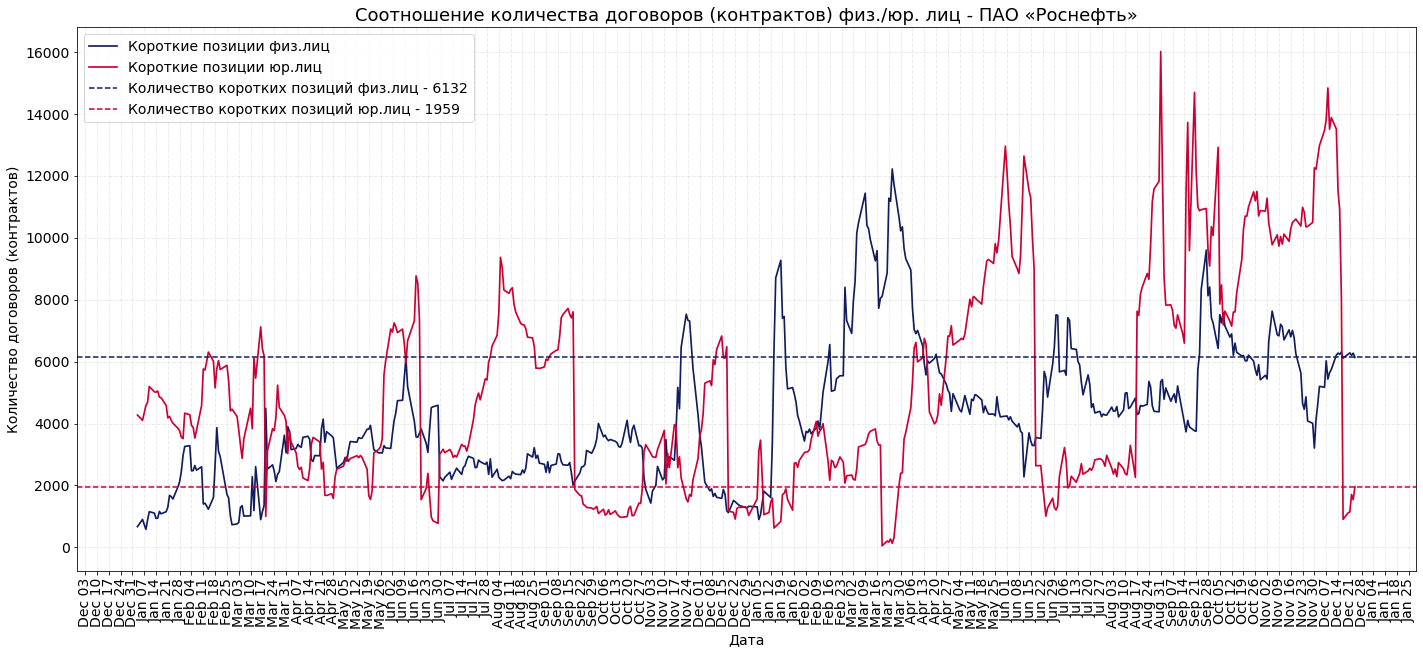

In [191]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(rosn_df['moment'], rosn_df['short_position_rosn_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(rosn_df['moment'], rosn_df['short_position_rosn_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=rosn_df['short_position_rosn_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(rosn_df['short_position_rosn_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=rosn_df['short_position_rosn_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(rosn_df['short_position_rosn_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Роснефть»', fontsize=18)
plt.legend()
plt.show()

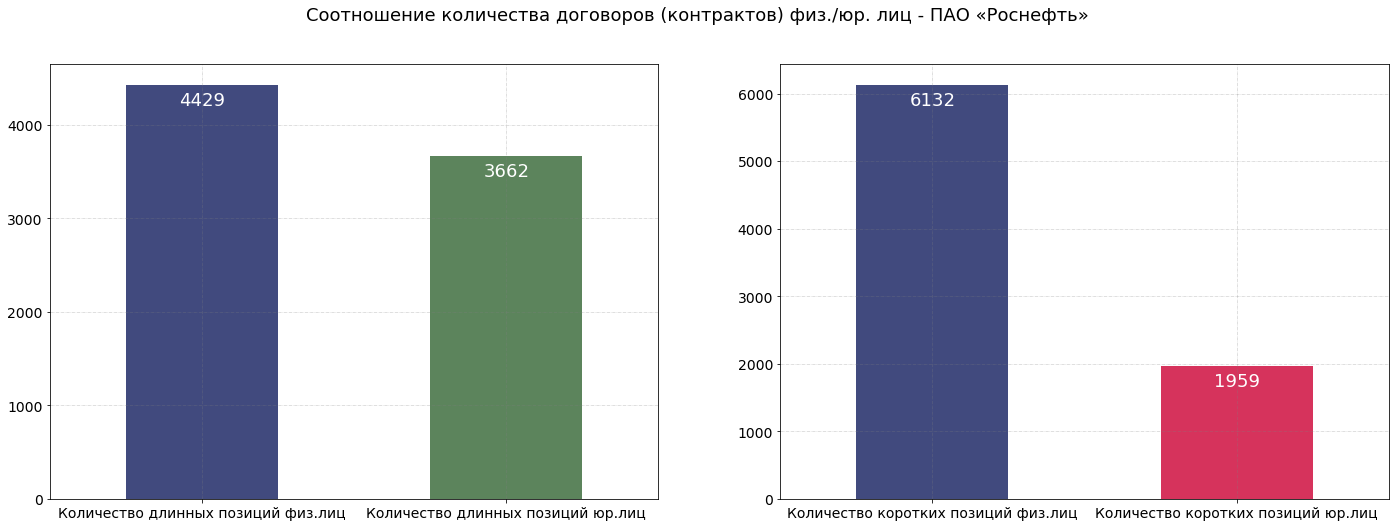

In [192]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_rosn['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_rosn['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Роснефть»', fontsize=18)
plt.show()

## <a id='408'>Публичное акционерное общество "Магнит", акция обыкновенная (MGNT)</a>  
- <a href='#0'>Table of contents</a>  

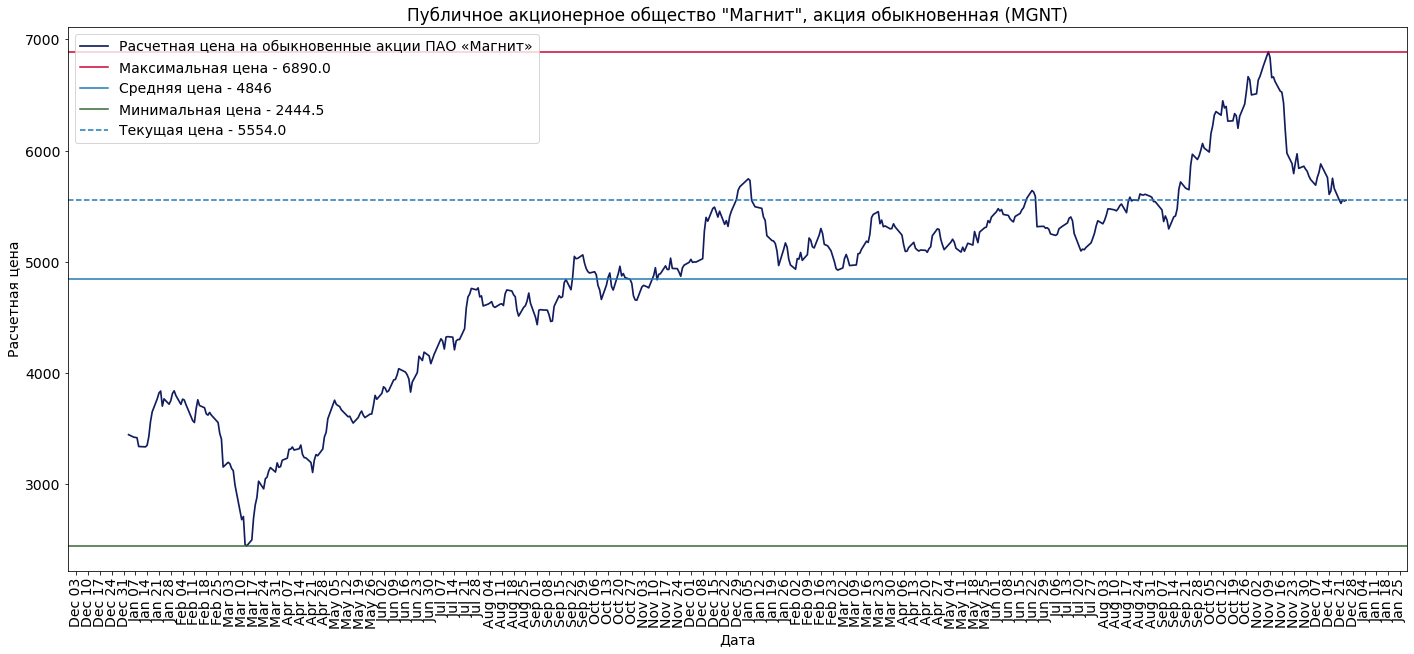

In [193]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(mgnt_df['moment'], mgnt_df['mgnt_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «Магнит»', linewidth=1.7)
plt.axhline(y=np.nanmax(mgnt_df['mgnt_price']), label='Максимальная цена - '+str(np.nanmax(mgnt_df['mgnt_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(mgnt_df['mgnt_price']), label='Средняя цена - '+str(round(np.mean(mgnt_df['mgnt_price']))), linestyle='-')
plt.axhline(y=np.nanmin(mgnt_df['mgnt_price']), label='Минимальная цена - '+str(np.nanmin(mgnt_df['mgnt_price'])), linestyle='-', color='#336633')
plt.axhline(y=mgnt_df['mgnt_price'].iat[-1], label='Текущая цена - '+str(mgnt_df['mgnt_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Магнит", акция обыкновенная (MGNT)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

fig.savefig('./graphs/MGNT.png')

In [194]:
long_position_mgnt_ind = round(mgnt_df['long_position_mgnt_ind'].iat[-1])
long_position_mgnt_ent = round(mgnt_df['long_position_mgnt_ent'].iat[-1])

long_position_mgnt = pd.DataFrame({'Количество договоров (контрактов)': [long_position_mgnt_ind, long_position_mgnt_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [195]:
short_position_mgnt_ind = round(mgnt_df['short_position_mgnt_ind'].iat[-1])
short_position_mgnt_ent = round(mgnt_df['short_position_mgnt_ent'].iat[-1])

short_position_mgnt = pd.DataFrame({'Количество договоров (контрактов)': [short_position_mgnt_ind, short_position_mgnt_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

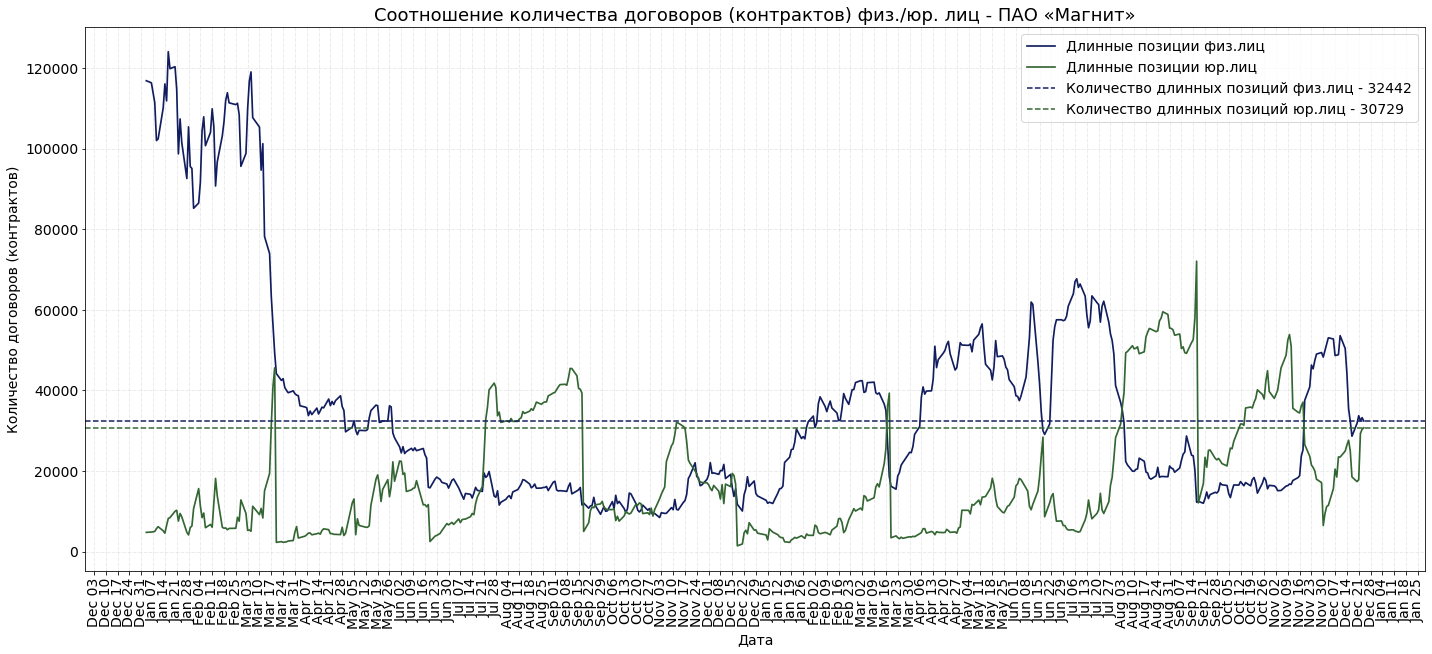

In [196]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(vtbr_df['moment'], mgnt_df['long_position_mgnt_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(vtbr_df['moment'], mgnt_df['long_position_mgnt_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=mgnt_df['long_position_mgnt_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(mgnt_df['long_position_mgnt_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=mgnt_df['long_position_mgnt_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(mgnt_df['long_position_mgnt_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Магнит»', fontsize=18)
plt.legend()
plt.show()

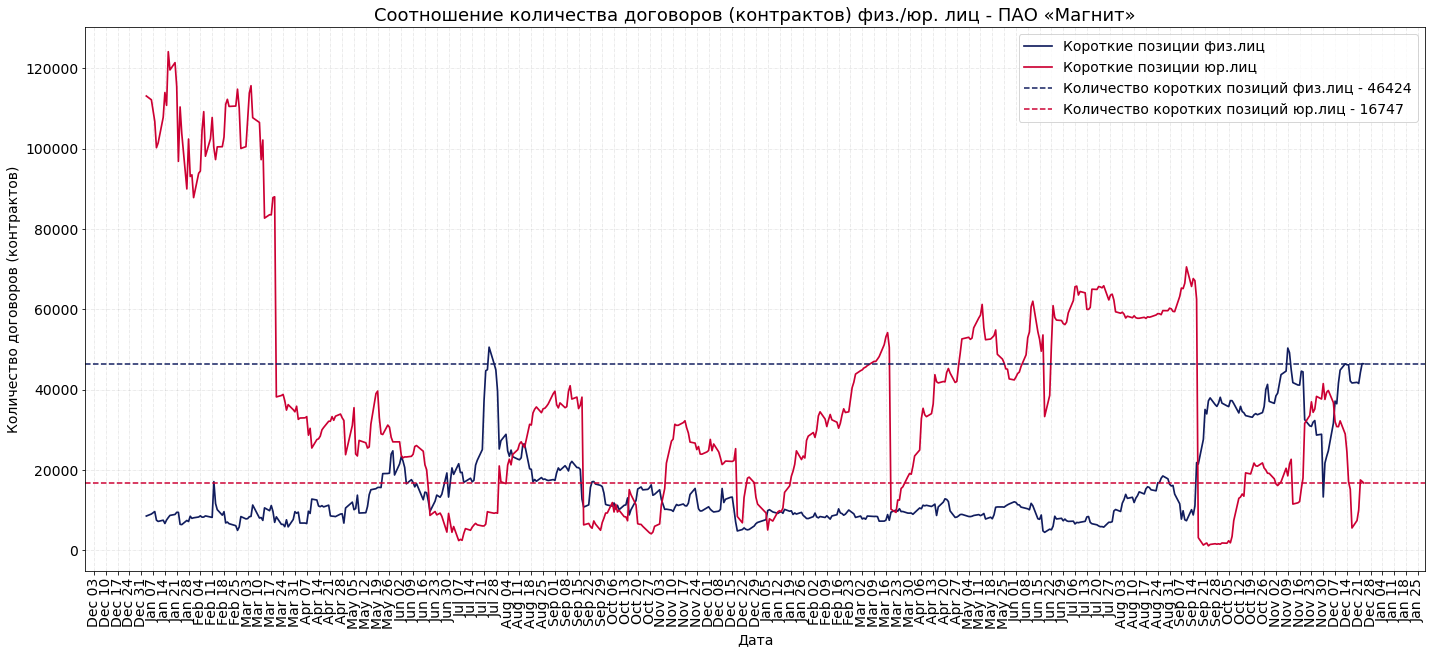

In [197]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(vtbr_df['moment'], mgnt_df['short_position_mgnt_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(vtbr_df['moment'], mgnt_df['short_position_mgnt_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=mgnt_df['short_position_mgnt_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(mgnt_df['short_position_mgnt_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=mgnt_df['short_position_mgnt_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(mgnt_df['short_position_mgnt_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Магнит»', fontsize=18)
plt.legend()
plt.show()

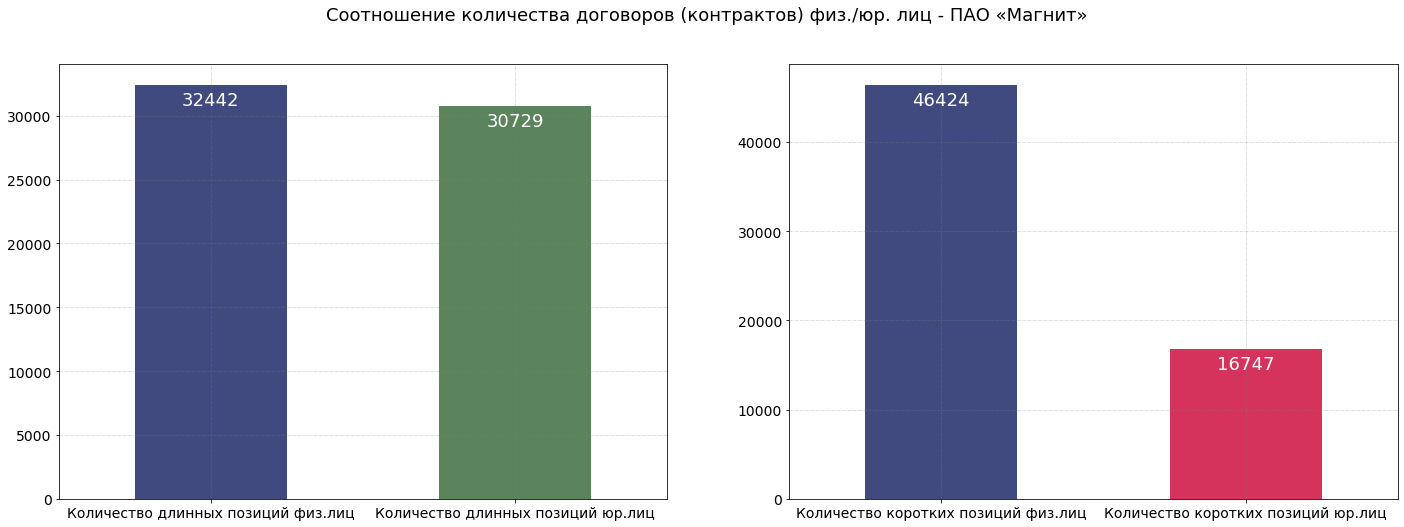

In [198]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_mgnt['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_mgnt['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Магнит»', fontsize=18)
plt.show()

## <a id='409'>Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT)</a>  
- <a href='#0'>Table of contents</a>  

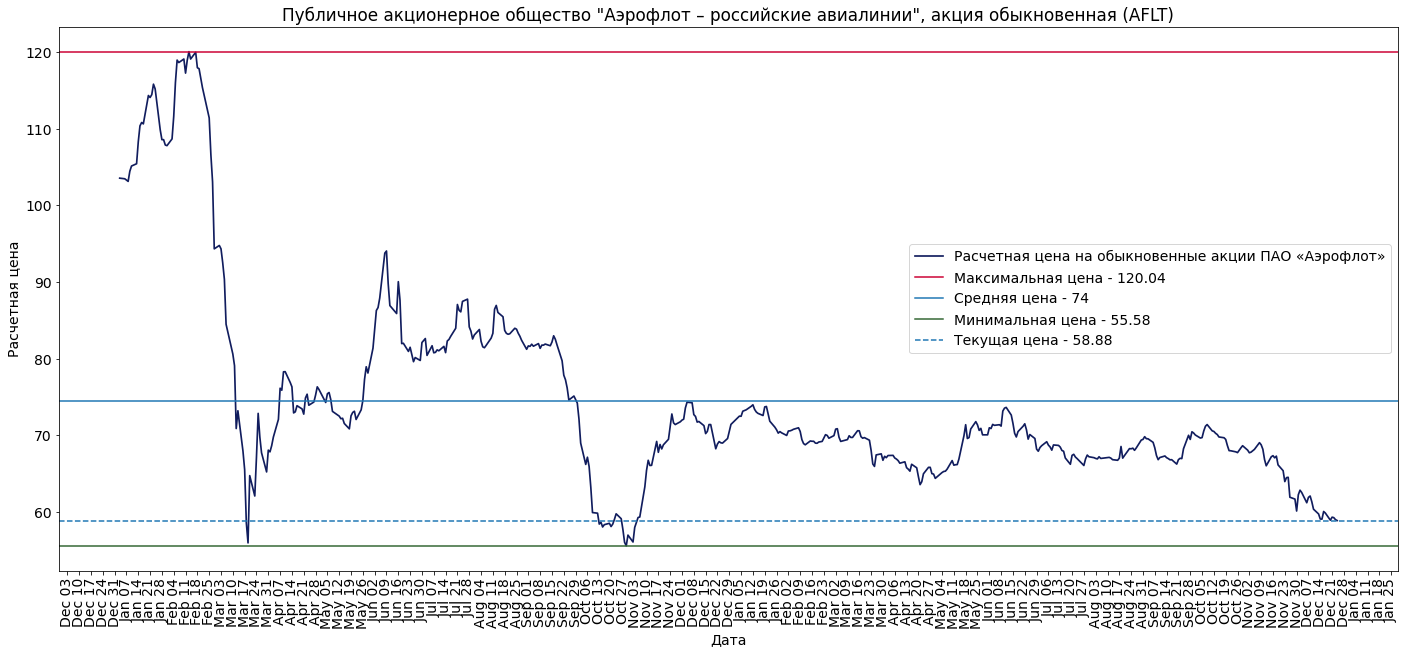

In [199]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(aflt_df['moment'], aflt_df['aflt_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «Аэрофлот»', linewidth=1.7)
plt.axhline(y=np.nanmax(aflt_df['aflt_price']), label='Максимальная цена - '+str(np.nanmax(aflt_df['aflt_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(aflt_df['aflt_price']), label='Средняя цена - '+str(round(np.mean(aflt_df['aflt_price']))), linestyle='-')
plt.axhline(y=np.nanmin(aflt_df['aflt_price']), label='Минимальная цена - '+str(np.nanmin(aflt_df['aflt_price'])), linestyle='-', color='#336633')
plt.axhline(y=aflt_df['aflt_price'].iat[-1], label='Текущая цена - '+str(aflt_df['aflt_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

fig.savefig('./graphs/AFLT.png')

In [200]:
long_position_aflt_ind = round(aflt_df['long_position_aflt_ind'].iat[-1])
long_position_aflt_ent = round(aflt_df['long_position_aflt_ent'].iat[-1])

long_position_aflt = pd.DataFrame({'Количество договоров (контрактов)': [long_position_aflt_ind, long_position_aflt_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [201]:
short_position_aflt_ind = round(aflt_df['short_position_aflt_ind'].iat[-1])
short_position_aflt_ent = round(aflt_df['short_position_aflt_ent'].iat[-1])

short_position_aflt = pd.DataFrame({'Количество договоров (контрактов)': [short_position_aflt_ind, short_position_aflt_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

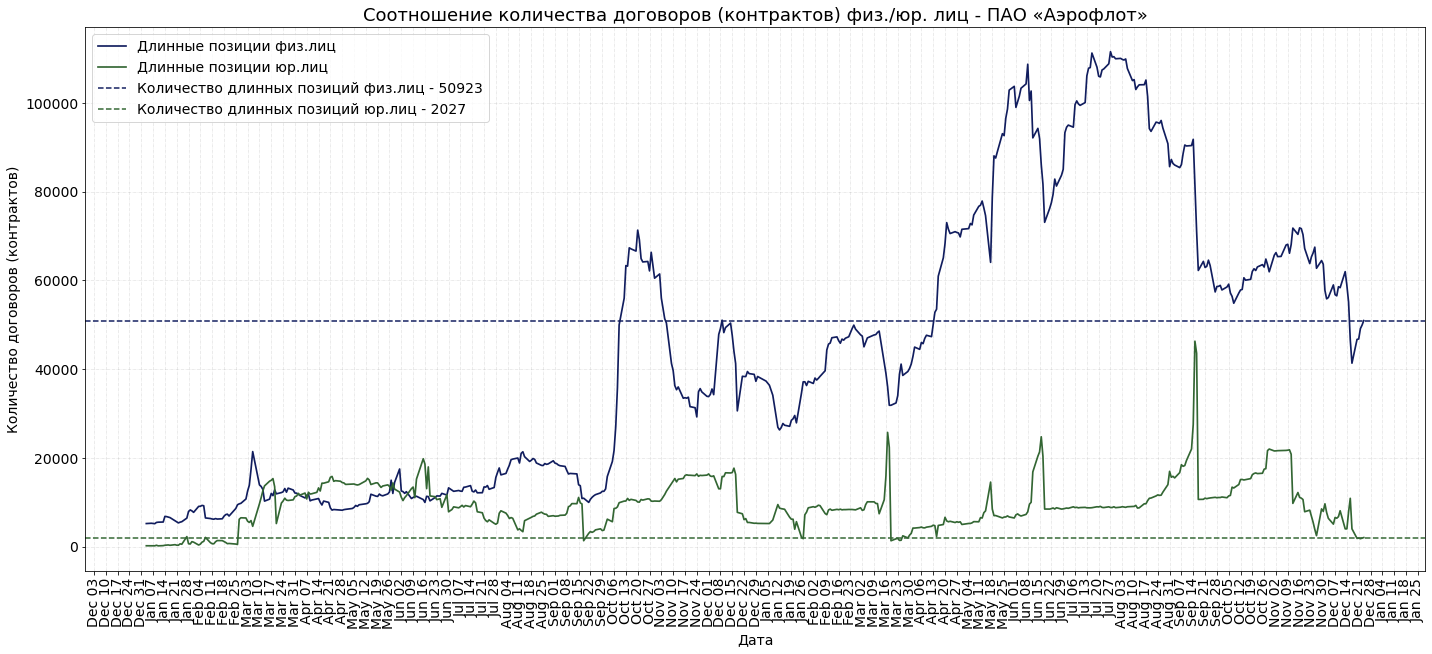

In [202]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(aflt_df['moment'], aflt_df['long_position_aflt_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(aflt_df['moment'], aflt_df['long_position_aflt_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=aflt_df['long_position_aflt_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(aflt_df['long_position_aflt_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=aflt_df['long_position_aflt_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(aflt_df['long_position_aflt_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Аэрофлот»', fontsize=18)
plt.legend()
plt.show()

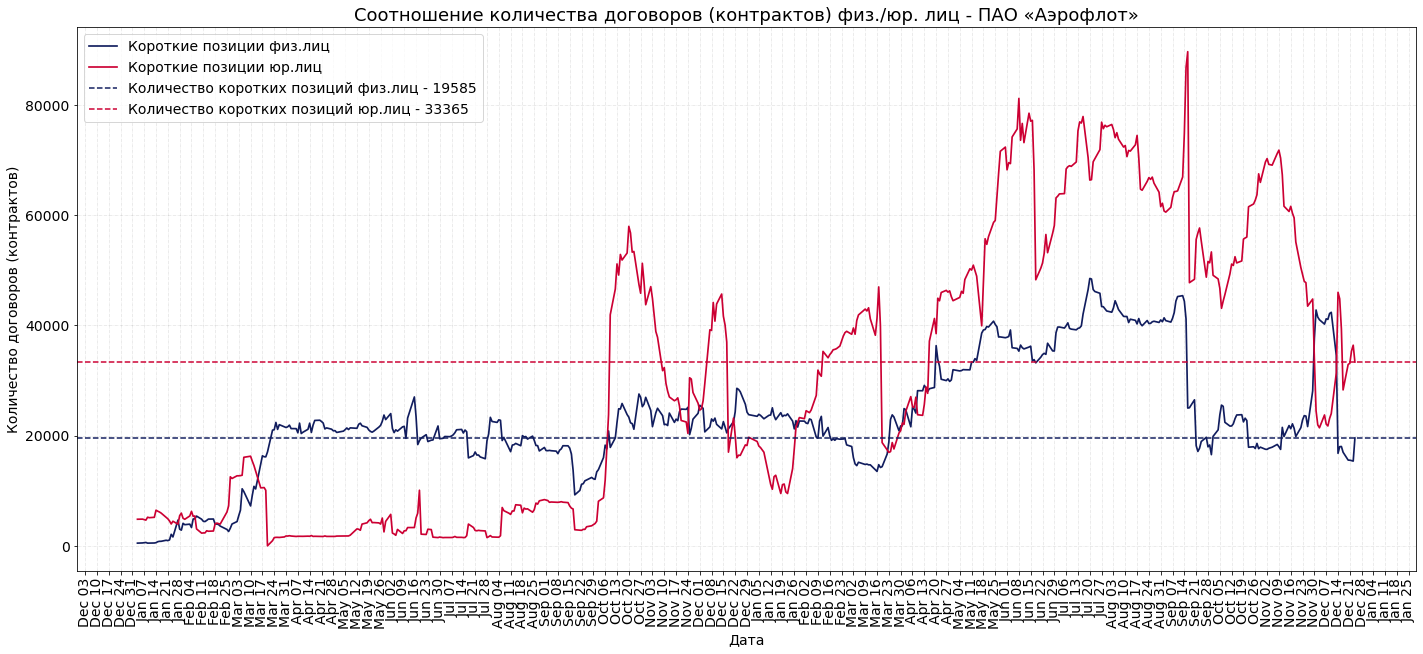

In [203]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(aflt_df['moment'], aflt_df['short_position_aflt_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(aflt_df['moment'], aflt_df['short_position_aflt_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=aflt_df['short_position_aflt_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(aflt_df['short_position_aflt_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=aflt_df['short_position_aflt_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(aflt_df['short_position_aflt_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Аэрофлот»', fontsize=18)
plt.legend()
plt.show()

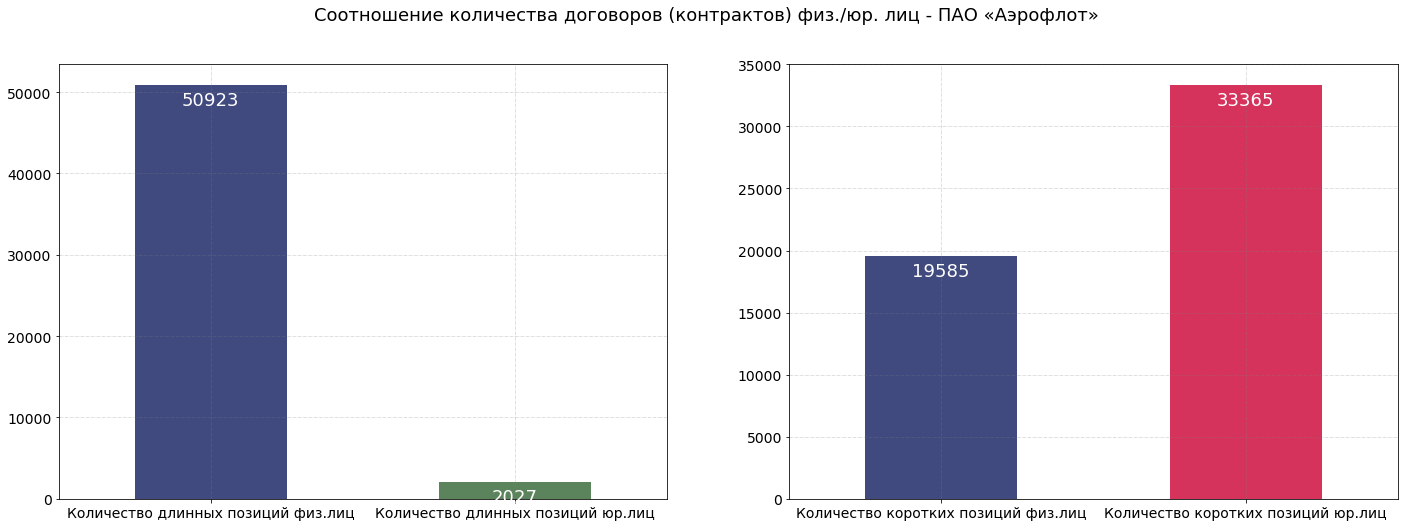

In [204]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_aflt['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_aflt['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «Аэрофлот»', fontsize=18)
plt.show()

## <a id='410'>Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN)</a>  
- <a href='#0'>Table of contents</a>  

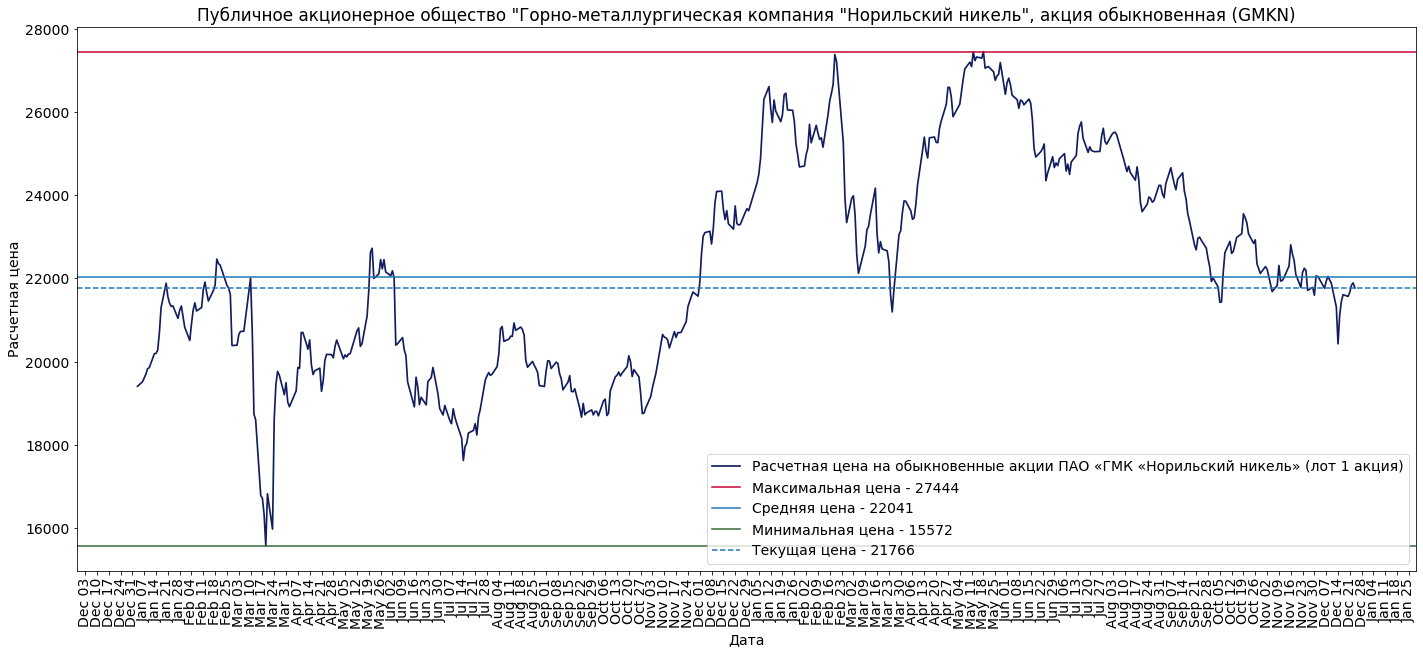

In [205]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gmkn_df['moment'], gmkn_df['gmkn_price'], color='#111d5e', label='Расчетная цена на обыкновенные акции ПАО «ГМК «Норильский никель» (лот 1 акция)', linewidth=1.7)
plt.axhline(y=np.nanmax(gmkn_df['gmkn_price']), label='Максимальная цена - '+str(np.nanmax(gmkn_df['gmkn_price'])), linestyle='-', color='#CC0033')
plt.axhline(y=np.mean(gmkn_df['gmkn_price']), label='Средняя цена - '+str(round(np.mean(gmkn_df['gmkn_price']))), linestyle='-')
plt.axhline(y=np.nanmin(gmkn_df['gmkn_price']), label='Минимальная цена - '+str(np.nanmin(gmkn_df['gmkn_price'])), linestyle='-', color='#336633')
plt.axhline(y=gmkn_df['gmkn_price'].iat[-1], label='Текущая цена - '+str(gmkn_df['gmkn_price'].iat[-1]), linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN)')
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

fig.savefig('./graphs/GMKN.png')

In [206]:
long_position_gmkn_ind = round(gmkn_df['long_position_gmkn_ind'].iat[-1])
long_position_gmkn_ent = round(gmkn_df['long_position_gmkn_ent'].iat[-1])

long_position_gmkn = pd.DataFrame({'Количество договоров (контрактов)': [long_position_gmkn_ind, long_position_gmkn_ent]},
                                 index=['Количество длинных позиций физ.лиц', 'Количество длинных позиций юр.лиц'])

In [207]:
short_position_gmkn_ind = round(gmkn_df['short_position_gmkn_ind'].iat[-1])
short_position_gmkn_ent = round(gmkn_df['short_position_gmkn_ent'].iat[-1])

short_position_gmkn = pd.DataFrame({'Количество договоров (контрактов)': [short_position_gmkn_ind, short_position_gmkn_ent]},
                                 index=['Количество коротких позиций физ.лиц', 'Количество коротких позиций юр.лиц'])

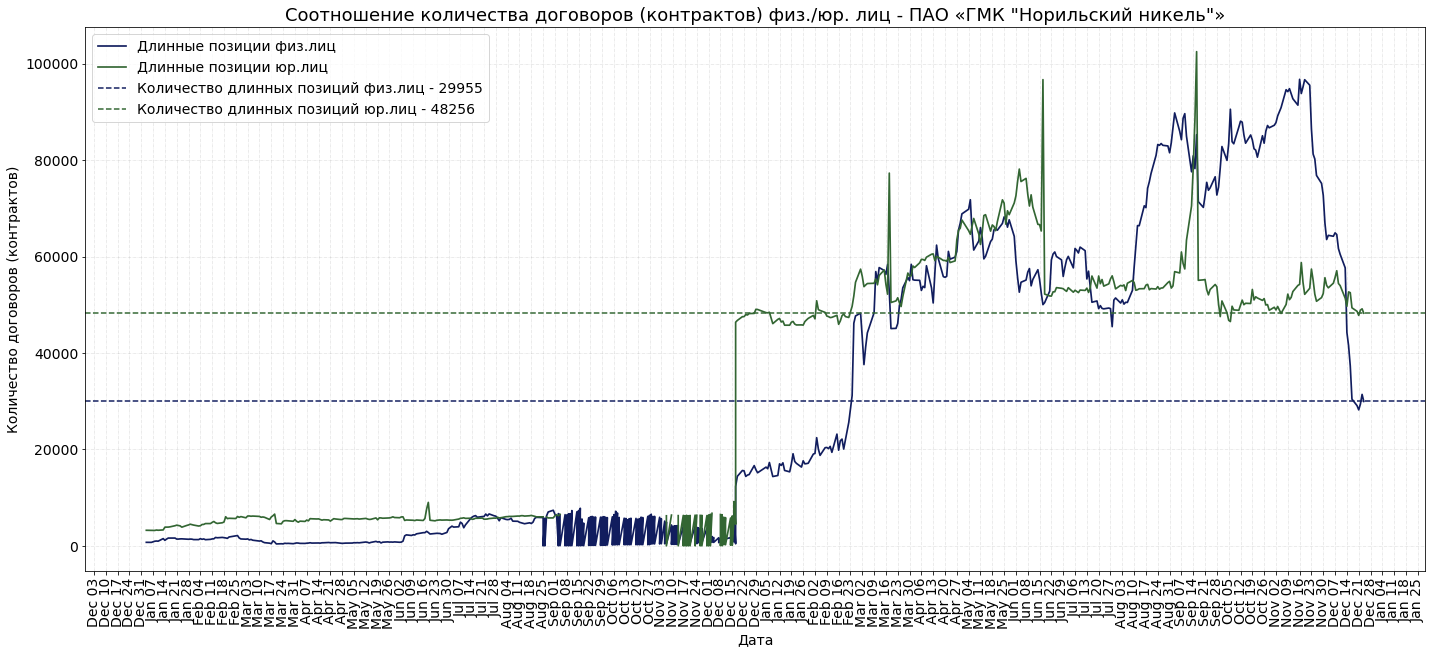

In [208]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gmkn_df['moment'], gmkn_df['long_position_gmkn_ind'], color='#111d5e', label='Длинные позиции физ.лиц', linewidth=1.7)
plt.plot(gmkn_df['moment'], gmkn_df['long_position_gmkn_ent'], color='#336633', label='Длинные позиции юр.лиц', linewidth=1.7)
plt.axhline(y=gmkn_df['long_position_gmkn_ind'].iat[-1], label='Количество длинных позиций физ.лиц - '+str(round(gmkn_df['long_position_gmkn_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=gmkn_df['long_position_gmkn_ent'].iat[-1], label='Количество длинных позиций юр.лиц - '+str(round(gmkn_df['long_position_gmkn_ent'].iat[-1])), linestyle='--', color='#336633')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ГМК "Норильский никель"»', fontsize=18)
plt.legend()
plt.show()

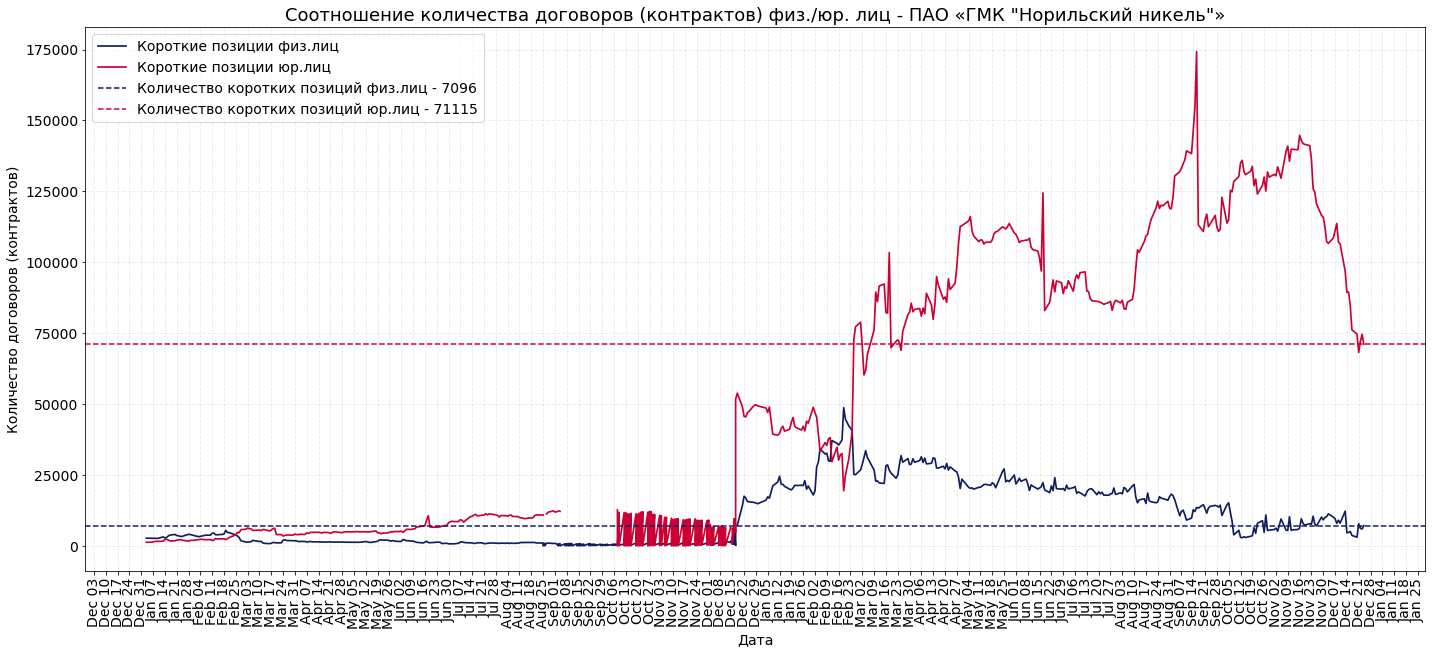

In [209]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(gmkn_df['moment'], gmkn_df['short_position_gmkn_ind'], color='#111d5e', label='Короткие позиции физ.лиц', linewidth=1.7)
plt.plot(gmkn_df['moment'], gmkn_df['short_position_gmkn_ent'], color='#CC0033', label='Короткие позиции юр.лиц', linewidth=1.7)
plt.axhline(y=gmkn_df['short_position_gmkn_ind'].iat[-1], label='Количество коротких позиций физ.лиц - '+str(round(gmkn_df['short_position_gmkn_ind'].iat[-1])), linestyle='--', color='#111d5e')
plt.axhline(y=gmkn_df['short_position_gmkn_ent'].iat[-1], label='Количество коротких позиций юр.лиц - '+str(round(gmkn_df['short_position_gmkn_ent'].iat[-1])), linestyle='--', color='#CC0033')
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.3) 
plt.xlabel('Дата')
plt.ylabel('Количество договоров (контрактов)')
# plt.xticks([])
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=90) 
plt.title('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ГМК "Норильский никель"»', fontsize=18)
plt.legend()
plt.show()

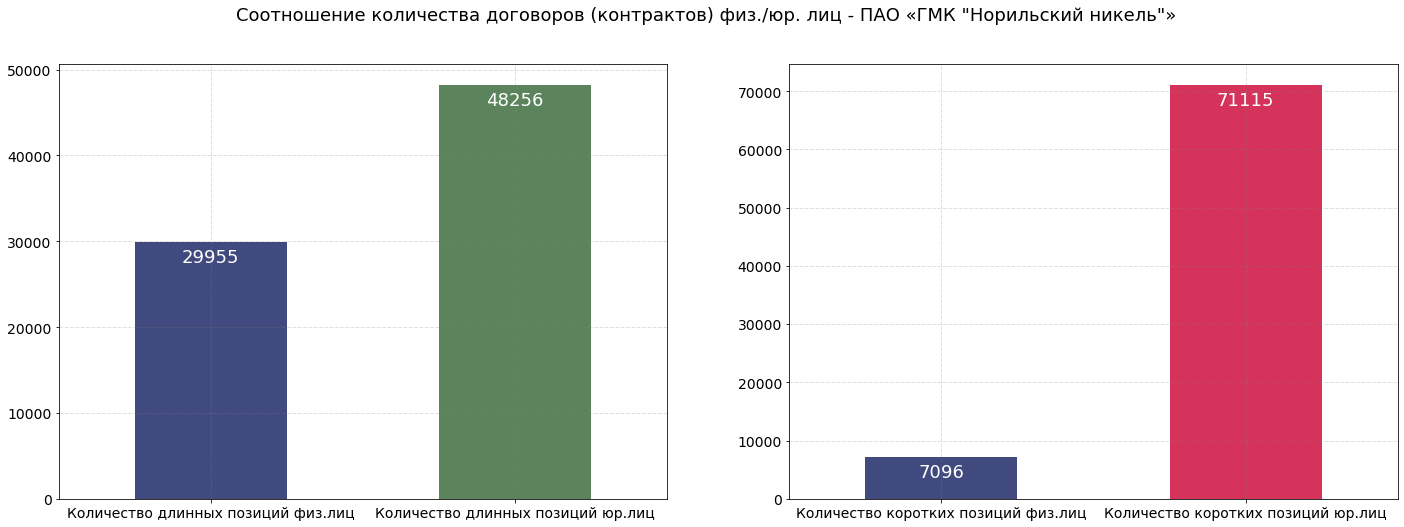

In [210]:
f, ax=plt.subplots(1, 2, figsize=(24, 8)) 
    
long_position_gmkn['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[0], color=['#111d5e', '#336633'], alpha=0.8)
ax[0].set_xlabel('')
ax[0].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[0].patches:
    ax[0].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points')   
    
short_position_gmkn['Количество договоров (контрактов)'].plot.bar(rot=0, ax=ax[1], color=['#111d5e', '#CC0033'], alpha=0.8)
ax[1].set_xlabel('')    
ax[1].grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
for bar in ax[1].patches:
    ax[1].annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, -15), color='white', fontsize=18, textcoords='offset points') 
      
plt.suptitle('Соотношение количества договоров (контрактов) физ./юр. лиц - ПАО «ГМК "Норильский никель"»', fontsize=18)
plt.show()

# <a id='5'>Создание датасета</a>  

In [211]:
# Курс доллара США на валютной бирже - USD000UTSTOM - si_df
# Курс евро-российский рубль на валютной бирже - EUR_RUB__TOM - eu_df      
# Публичное акционерное общество "Сбербанк России", акция обыкновенная (SBER) - sber_df    
# Банк ВТБ (публичное акционерное общество), акция обыкновенная (VTBR) - vtbr_df  
# Публичное акционерное общество "Газпром", акция обыкновенная (GAZP) - gazr_df    
# Публичное акционерное общество "Горно-металлургическая компания "Норильский никель", акция обыкновенная (GMKN) - gmkn_df     
# Публичное акционерное общество "Аэрофлот – российские авиалинии", акция обыкновенная (AFLT) - aflt_df    
# Публичное акционерное общество "Магнит", акция обыкновенная (MGNT) - mgnt_df    
# Публичное акционерное общество "Нефтяная компания "ЛУКОЙЛ", акция обыкновенная (LKOH) - lkoh_df   
# Публичное акционерное общество "Нефтяная компания "Роснефть", акция обыкновенная (ROSN) - rosn_df   
# Фьючерсный контракт на Индекс РТС - rts_df    
# Фьючерсный контракт на Индекс МосБиржи - mix_df     
# Фьючерсный контракт на инвестиционные паи SPDR S&P 500 ETF Trust - spyf_df   
# Фьючерсный контракт на нефть Brent  - brent_df  
# Фьючерсный контракт на золото - gold_df    
# Фьючерсный контракт на серебро - silv_df    
# Фьючерсный контракт на природный газ  - ng_df   

## <a id='502'>Объединение таблиц</a>  
- <a href='#0'>Table of contents</a> 

In [212]:
# Объединение таблиц на основе ключа - 'moment'
train_df = pd.merge(si_df, eu_df, on='moment', how='left')
train_df = pd.merge(train_df, sber_df, on='moment', how='left')
train_df = pd.merge(train_df, vtbr_df, on='moment', how='left')
train_df = pd.merge(train_df, gazr_df, on='moment', how='left')
train_df = pd.merge(train_df, gmkn_df, on='moment', how='left')
# train_df = pd.merge(train_df, aflt_df, on='moment', how='left')
# train_df = pd.merge(train_df, mgnt_df, on='moment', how='left')
train_df = pd.merge(train_df, lkoh_df, on='moment', how='left')
train_df = pd.merge(train_df, rosn_df, on='moment', how='left')

## <a id='503'>Пропуски в данных</a>  
- <a href='#0'>Table of contents</a> 

In [213]:
train_df.isnull().sum()

moment                        0
long_position_si_ind          0
short_position_si_ind         0
clients_in_long_si_ind        0
clients_in_short_si_ind       0
long_position_si_ent          0
short_position_si_ent         0
clients_in_long_si_ent        0
clients_in_short_si_ent       0
si_volrur                     0
si_price                      0
si_h                          0
si_l                          0
si_r                          0
long_position_eu_ind          0
short_position_eu_ind         0
clients_in_long_eu_ind        0
clients_in_short_eu_ind       0
long_position_eu_ent          0
short_position_eu_ent         0
clients_in_long_eu_ent        0
clients_in_short_eu_ent       0
eu_volrur                     0
eu_price                      0
eu_h                          0
eu_l                          0
eu_r                          0
long_position_sbrf_ind        0
short_position_sbrf_ind       0
clients_in_long_sbrf_ind      0
clients_in_short_sbrf_ind     0
long_pos

## <a id='504'>Корреляционная зависимость</a>  
- <a href='#0'>Table of contents</a> 

In [214]:
correlation = train_df.corr()
corr_with_target = correlation['si_price'].sort_values(ascending = False)
corr_with_target

si_price                     1.00000
eu_price                     0.89201
clients_in_short_si_ind      0.48377
long_position_lkoh_ind       0.38426
short_position_si_ind        0.36799
short_position_eu_ind        0.36622
clients_in_short_eu_ent      0.35978
clients_in_short_si_ent      0.35852
si_volrur                    0.34464
clients_in_short_eu_ind      0.32680
sber_volume                  0.29224
clients_in_long_sbrf_ind     0.25196
sber_value                   0.24146
clients_in_long_lkoh_ind     0.22925
long_position_sbrf_ind       0.22163
clients_in_short_lkoh_ent    0.20713
short_position_lkoh_ent      0.19599
lkoh_volume                  0.18374
short_position_rosn_ind      0.17996
si_l                         0.17689
eu_l                         0.16510
si_h                         0.15901
long_position_gmkn_ent       0.15625
long_position_eu_ent         0.12825
eu_h                         0.12317
vtbr_volume                  0.11226
clients_in_short_rosn_ind    0.10511
r

In [215]:
X = train_df.drop(['si_price', 'moment',  'vtbr_volume'], axis=1)
y = train_df['si_price'] 

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# <a id='6'>Выбор модели и обучение</a>  

## <a id='601'>Первичный выбор модели</a>  
- <a href='#0'>Table of contents</a> 

In [217]:
models = []

models.append(('CatBoostRegressor', CatBoostRegressor(silent=True)))
models.append(('LGBMRegressor', LGBMRegressor()))
models.append(('XGBRegressor', XGBRegressor()))

In [218]:
results = []

for name, model in models:
    start_time = time.time()
    
    model.fit(X_train, y_train)
    
    train_predictions  = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    R2 = r2_score(y_test, test_predictions)
    MAE = mean_absolute_error(y_test, test_predictions)
    MSE = mean_squared_error(y_test, test_predictions)
    EV = explained_variance_score(y_test, test_predictions)
    
    lr_time = (time.time() - start_time)
    results.append((name, R2, EV, MAE, MSE, lr_time))
    
best_models = pd.DataFrame(results, columns = ['model','R2', 'EV', 'MAE', 'MSE', 'time'])
best_models.sort_values('R2', ascending=False)

model      R2      EV     MAE     MSE    time
0  CatBoostRegressor 0.98330 0.98332 0.30331 0.17620 6.59052
1      LGBMRegressor 0.96947 0.96949 0.36111 0.32210 0.06500
2       XGBRegressor 0.96547 0.96558 0.41272 0.36431 0.20200

## <a id='602'>Обучение модели</a>  
- <a href='#0'>Table of contents</a> 

In [219]:
results_lgb = []

params = {
    'objective': 'rmse',
    'boosting_type': 'gbdt',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_jobs': -1,
    'verbose': -1
}

folds = KFold(n_splits=5, random_state=23, shuffle=True)

for fold, (train_index, test_index) in enumerate(folds.split(X, y)):
    print(f'Training fold {fold + 1}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    start_time = time.time()
    model_lgb = LGBMRegressor(**params, num_iterations=10000) 
    
    model_lgb.fit(X_train, y_train, 
              eval_set = [(X_train, y_train), (X_test, y_test)], 
              verbose=250, early_stopping_rounds=250) # feval=feval_rmspe

    train_predictions_lgb = model_lgb.predict(X_train)
    test_predictions_lgb = model_lgb.predict(X_test)

    train_score_r2 = r2_score(y_train, train_predictions_lgb)
    test_score_r2 = r2_score(y_test, test_predictions_lgb)
    train_score_mae = mean_absolute_error(y_train, train_predictions_lgb)
    test_score_mae = mean_absolute_error(y_test, test_predictions_lgb)
    train_score_mse = mean_squared_error(y_train, train_predictions_lgb)
    test_score_mse = mean_squared_error(y_test, test_predictions_lgb)
    test_rmspe_score = rmspe(y_test, test_predictions_lgb)

    lr_time = (time.time() - start_time)
    results_lgb.append((fold, train_score_r2, train_score_mae, train_score_mse, test_score_r2, test_score_mae, test_score_mse, test_rmspe_score, lr_time))

Training fold 1
Training until validation scores don't improve for 250 rounds
[250]	training's rmse: 0.083838	valid_1's rmse: 0.385827
[500]	training's rmse: 0.0263512	valid_1's rmse: 0.373726
[750]	training's rmse: 0.0112833	valid_1's rmse: 0.372133
[1000]	training's rmse: 0.00515224	valid_1's rmse: 0.371712
[1250]	training's rmse: 0.00262478	valid_1's rmse: 0.371495
[1500]	training's rmse: 0.00139309	valid_1's rmse: 0.371444
Early stopping, best iteration is:
[1457]	training's rmse: 0.00157973	valid_1's rmse: 0.371413
Training fold 2
Training until validation scores don't improve for 250 rounds
[250]	training's rmse: 0.0807983	valid_1's rmse: 0.455313
[500]	training's rmse: 0.0258445	valid_1's rmse: 0.448872
[750]	training's rmse: 0.00976747	valid_1's rmse: 0.448605
[1000]	training's rmse: 0.00422185	valid_1's rmse: 0.448603
Early stopping, best iteration is:
[768]	training's rmse: 0.00916976	valid_1's rmse: 0.448464
Training fold 3
Training until validation scores don't improve for 

In [220]:
best_models = pd.DataFrame((results_lgb))
best_models.columns = ['Fold', 'train_score_r2', 'train_score_mae', 'train_score_mse', 'test_score_r2', 'test_score_mae', 'test_score_mse', 'test_rmspe_score', 'time']
best_models.sort_values('Fold', ascending=True)

Fold  train_score_r2  train_score_mae  train_score_mse  test_score_r2  \
0     0         1.00000          0.00101          0.00000        0.98758   
1     1         0.99999          0.00711          0.00008        0.98471   
2     2         1.00000          0.00016          0.00000        0.98647   
3     3         1.00000          0.00046          0.00000        0.98913   
4     4         1.00000          0.00313          0.00002        0.99111   

   test_score_mae  test_score_mse  test_rmspe_score    time  
0         0.26080         0.13795           0.00503 0.48600  
1         0.31732         0.20112           0.00611 0.27900  
2         0.28518         0.16580           0.00550 0.63400  
3         0.27515         0.15309           0.00531 0.55900  
4         0.25284         0.14313           0.00536 0.29800

In [221]:
print(f'Train mean score: {round(np.mean(best_models.train_score_mse), 4)}, std: {round(np.std(best_models.train_score_mse), 4)}')
print(f'Test mean score: {round(np.mean(best_models.test_score_mse), 4)}, std: {round(np.std(best_models.test_score_mse), 4)}')

Train mean score: 0.0, std: 0.0
Test mean score: 0.1602, std: 0.0226


# <a id='7'>Прогнозирование временных рядов</a>  

## <a id='701'>Подготовка данных</a>  
- <a href='#0'>Table of contents</a> 

In [222]:
si_tsf = pd.DataFrame()

In [223]:
si_tsf['moment'] = si_df['moment']
si_tsf['si_price'] = si_df['si_price']

In [224]:
si_tsf.head()

moment  si_price
0 2020-01-03  62.02980
1 2020-01-06  62.05490
2 2020-01-08  61.63730
3 2020-01-09  61.23340
4 2020-01-10  61.21820

In [225]:
si_tsf.tail()

moment  si_price
496 2021-12-20  74.24780
497 2021-12-21  73.95010
498 2021-12-22  73.79590
499 2021-12-23  73.42330
500 2021-12-24  73.40250

In [226]:
si_tsf.shape

(501, 2)

In [227]:
si_dataset = si_tsf.iloc[:,1].values

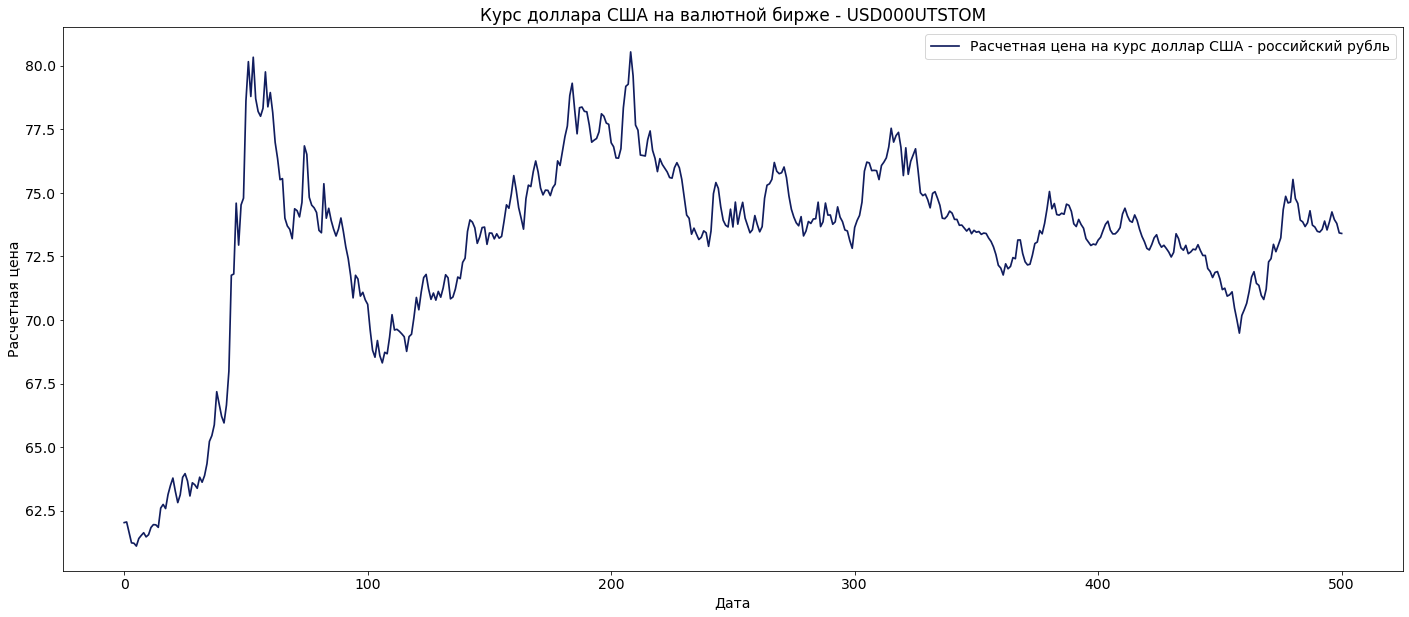

In [228]:
fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(si_dataset, color='#111d5e', label='Расчетная цена на курс доллар США - российский рубль', linewidth=1.7)
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Курс доллара США на валютной бирже - USD000UTSTOM')
plt.legend()
plt.show()

# fig.savefig('./fig.savefig('./graphs/Si_TSF.png')/Si_TSF.png')

In [229]:
# Preprocessing
si_dataset = si_dataset.reshape(-1, 1)
si_dataset = si_dataset.astype('float32')
si_dataset.shape

(501, 1)

In [230]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [231]:
minmax_scaler = MinMaxScaler()
# robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

si_dataset = standard_scaler.fit_transform(si_dataset)
# si_dataset = robust_scaler.fit_transform(si_dataset)
si_dataset = minmax_scaler.fit_transform(si_dataset)

In [232]:
train_size = int(len(si_dataset)*0.51)
test_size = len(si_dataset) - train_size
si_train = si_dataset[0:train_size,:]
si_test = si_dataset[train_size:len(si_dataset),:]
print(len(si_train), len(si_test))

255 246


In [233]:
time_temp = 7
X_temp = []
Y_temp = []
for i in range(len(si_train)-time_temp-1):
    a = si_train[i:(i+time_temp), 0]
    X_temp.append(a)
    Y_temp.append(si_train[i + time_temp, 0])
X_train = np.array(X_temp)
y_train = np.array(Y_temp) 

In [234]:
ast = len(si_train)
act = ast-time_temp-1
aaa = si_train[i, 0]
print(ast, act, aaa)

255 247 0.659383


In [235]:
X_temp = []
Y_temp = []
for i in range(len(si_test)-time_temp-1):
    a = si_test[i:(i+time_temp), 0]
    X_temp.append(a)
    Y_temp.append(si_test[i + time_temp, 0])
X_test = np.array(X_temp)
y_test = np.array(Y_temp) 

In [236]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [237]:
model = Sequential([
    LSTM(300, input_shape=(1, time_temp)),
    Dense(1)
])

In [238]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [239]:
%%time
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
247/247 [==============================] - 2s 2ms/step - loss: 0.0178
Epoch 2/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 3/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 4/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 5/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 6/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 7/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 8/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 9/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 10/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 11/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 12/50
247/247 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 13/50
247/247 [====

In [240]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = minmax_scaler.inverse_transform(trainPredict)
y_train = minmax_scaler.inverse_transform([y_train])
testPredict = minmax_scaler.inverse_transform(testPredict)
y_test = minmax_scaler.inverse_transform([y_test])

trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.26 RMSE
Test Score: 0.17 RMSE


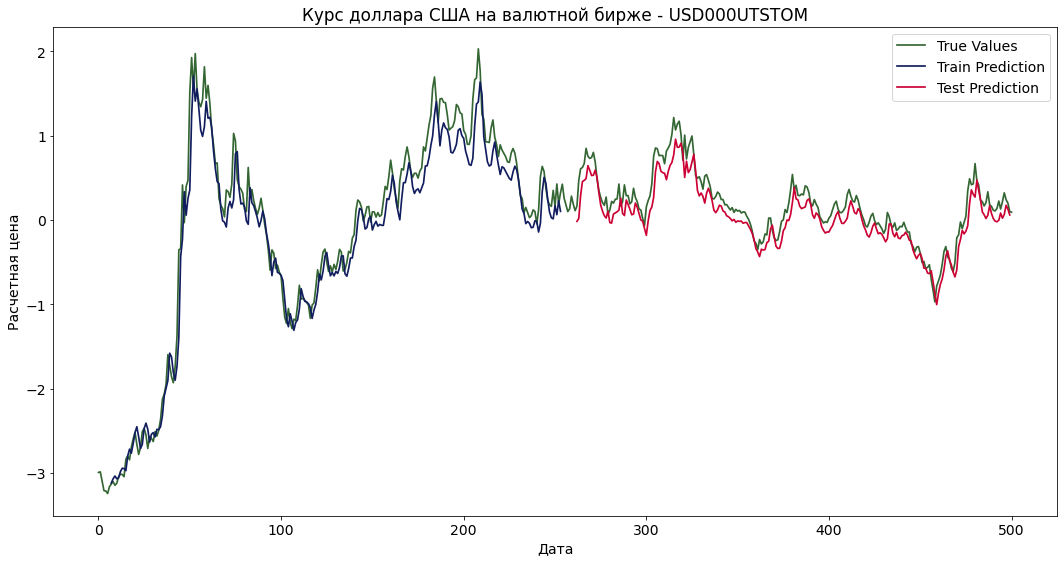

In [241]:
trainPredictPlot = np.empty_like(si_dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_temp:len(trainPredict)+time_temp, :] = trainPredict

testPredictPlot = np.empty_like(si_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_temp*2)+1:len(si_dataset)-1, :] = testPredict

fig, ax = plt.subplots(figsize=(18, 9))
plt.plot(minmax_scaler.inverse_transform(si_dataset), label = 'True Values', color='#336633', linewidth=1.7)
plt.plot(trainPredictPlot, label='Train Prediction', color='#111d5e', linewidth=1.7)
plt.plot(testPredictPlot, label = 'Test Prediction', color='#CC0033', linewidth=1.7)
plt.xlabel('Дата')
plt.ylabel('Расчетная цена')
plt.title('Курс доллара США на валютной бирже - USD000UTSTOM')
plt.legend()
plt.show()